# Price Correlation to real-world events

## Our group was primarily interested to look at recent price data over the past decade while looking at the data, we sought to answer the following questions.
## Questions
Which world events are heavily visible in a variety of commodity prices?

Do prices decrease to normal after world events? If so, how long does it take?

Are there any items that appear to have been affected uniquely by one major event?

How does each items price increase compare to yearly inflation?

# Data Collection

Data was collected using the US Bureau of Labor Statistics (BLS), by both pulling from the API and by direct download CSVs.
Years between 2013 and 

Data was cleaned by removing NAN values and limitting the years betweem 2013 and 2023. 
Data was normalized for plotting by dividing by all values during January 2013. 



## BLS API
The code below was used to import data Via the BLS API. 


In [5]:
import requests
import json
import pandas as pd
import datetime
from datetime import datetime


APIDataPath = '../Resources/API_Data/'
AnalyzedDataPath = '../Resources/Data_Analysis/'
FiguresPath = '../Resources/Figures/'

In [2]:
#For scraping BLS. First get the series you are interested in. Searchable at:  https://beta.bls.gov/dataQuery/find?st=0&r=20&s=popularity%3AD&fq=survey:[cu]&more=0
# you can view the series online at, for e.g.: https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SAF1

saving = 'n'

from api_keys import BLS_key
BLSUrl = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

Series1 = 'CUUR0000SAF1' #'Food in U.S. city average, all urban consumers, not seasonally adjusted'
Series2 = 'PCU484122484122P' #'PPI industry data for General freight trucking, long-distance LTL-Primary services, not seasonally adjusted'
Series3 =  'WPU3014' #'PPI Commodity data for Transportation services-Air transportation of freight, not seasonally adjusted'
Series4 =  'WPU3013' #'PPI Commodity data for Transportation services-Water transportation of freight, not seasonally adjusted'
Series5 = 'CUSR0000SETA' #'New and used motor vehicles in U.S. city average, all urban consumers, seasonally adjusted'
Series6 = 'WPU11660638' #'PPI Commodity data for Machinery and equipment-Semiconductor manufacturing machinery and parts, not seasonally adjusted'

SeriesList = [Series1, Series2, Series3, Series4, Series5, Series6]
TitleList = ['CPI_Food',
             'PPI_Trucking', 
             'PPI_Air_Freight',
             'PPI_Water_Freight',
             'CPI_Motor_Vehicles',
             'PPI_Semiconductor_Manuf_Machinery'
             ]
SeriesDict = {SeriesList[i] : TitleList[i] for i in range(len(SeriesList))}

StartYear = '2013'
EndYear = '2023'


In [3]:
#Set up API request
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": SeriesList,"startyear":StartYear,'calculations':True,
                   "endyear":EndYear,"registrationkey":BLS_key})
p = requests.post(BLSUrl, data=data, headers=headers)
json_data = json.loads(p.text)

In [4]:
BLS_Dataframe = pd.DataFrame({'SeriesID':[],
                              'Year':[],
                              'Period':[],
                              'Month':[],
                              'Date':[],
                              '3-Month % Change':[],
                              'PPI/CPI':[],
    })

for result in json_data['Results']['series']:
    SeriesID = result['seriesID']
    for item in result['data'] :
        year = item['year']
        period = item['period']
        month = item['periodName']
        date = datetime.strptime(f'{month} 1 {year}', '%B %d %Y').strftime("%m-%d-%Y")
        value = float(item['value'])
        try:
            MoChange = item['calculations']['pct_changes']['3']
        except:
            print('Time skip detected!')
            print(f'{SeriesID} no percent change {date}, inputting previous % change {MoChange}')
        BLS_Dataframe.loc[len(BLS_Dataframe.index)] = [SeriesID, year,period,month,date,MoChange,value] 

Time skip detected!
WPU11660638 no percent change 03-01-2018, inputting previous % change 0.9
Time skip detected!
WPU11660638 no percent change 02-01-2018, inputting previous % change 0.9
Time skip detected!
WPU11660638 no percent change 01-01-2018, inputting previous % change 0.9
Time skip detected!
WPU11660638 no percent change 05-01-2014, inputting previous % change -0.3
Time skip detected!
WPU11660638 no percent change 04-01-2014, inputting previous % change -0.3
Time skip detected!
WPU11660638 no percent change 03-01-2014, inputting previous % change -0.3


In [5]:
for Series in SeriesDict:
    DF = BLS_Dataframe.loc[BLS_Dataframe['SeriesID'] == Series]
    SeriesSaveName = f'{APIDataPath}BLS_{SeriesDict[Series]}_data_01.csv'
    DF = DF.replace({'SeriesID' : SeriesDict})
    NormValue = DF['PPI/CPI'].max()
    DF['NormValue'] = DF['PPI/CPI']/(NormValue)*100
    if saving == 'y':
        DF.to_csv(SeriesSaveName)


BLS_Dataframe = BLS_Dataframe.replace({'SeriesID' : SeriesDict})
SaveName = f'{APIDataPath}BLS_data_01.csv'

if saving == 'y':
    BLS_Dataframe.to_csv(SaveName)
else:
    print('Saving not selected.')

Saving not selected.


## All files were saved to a common data directory. 
## Final datasets include:
Air freight prices

Water freight prices

Land freight prices

Electricity prices

Gasoline prices

New and used automobile prices

General food prices

Banana prices

Egg prices

Shelter prices

Toilet paper prices

Television prices

Semiconductor manufacturing machinery prices

In [57]:
Datalist = {'Air Freight Prices':{'filepath' : f'{APIDataPath}BLS_PPI_Air_Freight_data_01.csv','data': pd.DataFrame() },
           'Water Freight Prices':{'filepath' : f'{APIDataPath}BLS_PPI_Water_Freight_data_01.csv','data': pd.DataFrame() },
           'Land Freight Prices':{'filepath' : f'{APIDataPath}BLS_PPI_Trucking_data_01.csv','data': pd.DataFrame() },
           'Electricity Prices':{'filepath' : f'{APIDataPath}Cleaned_Electric_2013.csv','data': pd.DataFrame() },
           'Gasoline Prices':{'filepath' : f'{APIDataPath}Cleaned_Gasoline_2013.csv','data': pd.DataFrame() },
           'Automobile Prices':{'filepath' : f'{APIDataPath}BLS_CPI_Motor_Vehicles_data_01.csv','data': pd.DataFrame() },
           'Food Prices':{'filepath' : f'{APIDataPath}BLS_CPI_Food_data_01.csv','data': pd.DataFrame() },
           'Banana Prices':{'filepath' : f'{APIDataPath}Cleaned_Bananas_2013.csv','data': pd.DataFrame() },
           'Egg Prices':{'filepath' : f'{APIDataPath}Cleaned_Eggs_2013.csv','data': pd.DataFrame() },
           'Shelter Prices':{'filepath' : f'{APIDataPath}Cleaned_Shelter_2013.csv','data': pd.DataFrame() },
           'Toilet Paper Prices':{'filepath' : f'{APIDataPath}Cleaned_TP_2013.csv','data': pd.DataFrame() },
           'Television Prices':{'filepath' : f'{APIDataPath}Cleaned_TV_2013.csv','data': pd.DataFrame() },
           'Semiconductor Manufacturing Prices':{'filepath' : f'{APIDataPath}BLS_PPI_Semiconductor_Manuf_Machinery_data_01.csv','data': pd.DataFrame() }
           }

## Plotting Code

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
for dataset in Datalist:
    print(Datalist[dataset]['filepath'])
    df = pd.read_csv(Datalist[dataset]['filepath'])
    Datalist[dataset]['data'] = df

Datalist['Electricity Prices']['data'].head(5)

../Resources/API_Data/BLS_PPI_Air_Freight_data_01.csv
../Resources/API_Data/BLS_PPI_Water_Freight_data_01.csv
../Resources/API_Data/BLS_PPI_Trucking_data_01.csv
../Resources/API_Data/Cleaned_Electric_2013.csv
../Resources/API_Data/Cleaned_Gasoline_2013.csv
../Resources/API_Data/BLS_CPI_Motor_Vehicles_data_01.csv
../Resources/API_Data/BLS_CPI_Food_data_01.csv
../Resources/API_Data/Cleaned_Bananas_2013.csv
../Resources/API_Data/Cleaned_Eggs_2013.csv
../Resources/API_Data/Cleaned_Shelter_2013.csv
../Resources/API_Data/Cleaned_TP_2013.csv
../Resources/API_Data/Cleaned_TV_2013.csv
../Resources/API_Data/BLS_PPI_Semiconductor_Manuf_Machinery_data_01.csv


Year Month      Date  Value  3-Month % Change  NormValue
0  2013   M01  1/1/2013  0.129               0.8        2.5
1  2013   M02  2/1/2013  0.129               1.6        2.5
2  2013   M03  3/1/2013  0.128               0.8        0.0
3  2013   M04  4/1/2013  0.128              -0.8        0.0
4  2013   M05  5/1/2013  0.131               1.6        7.5

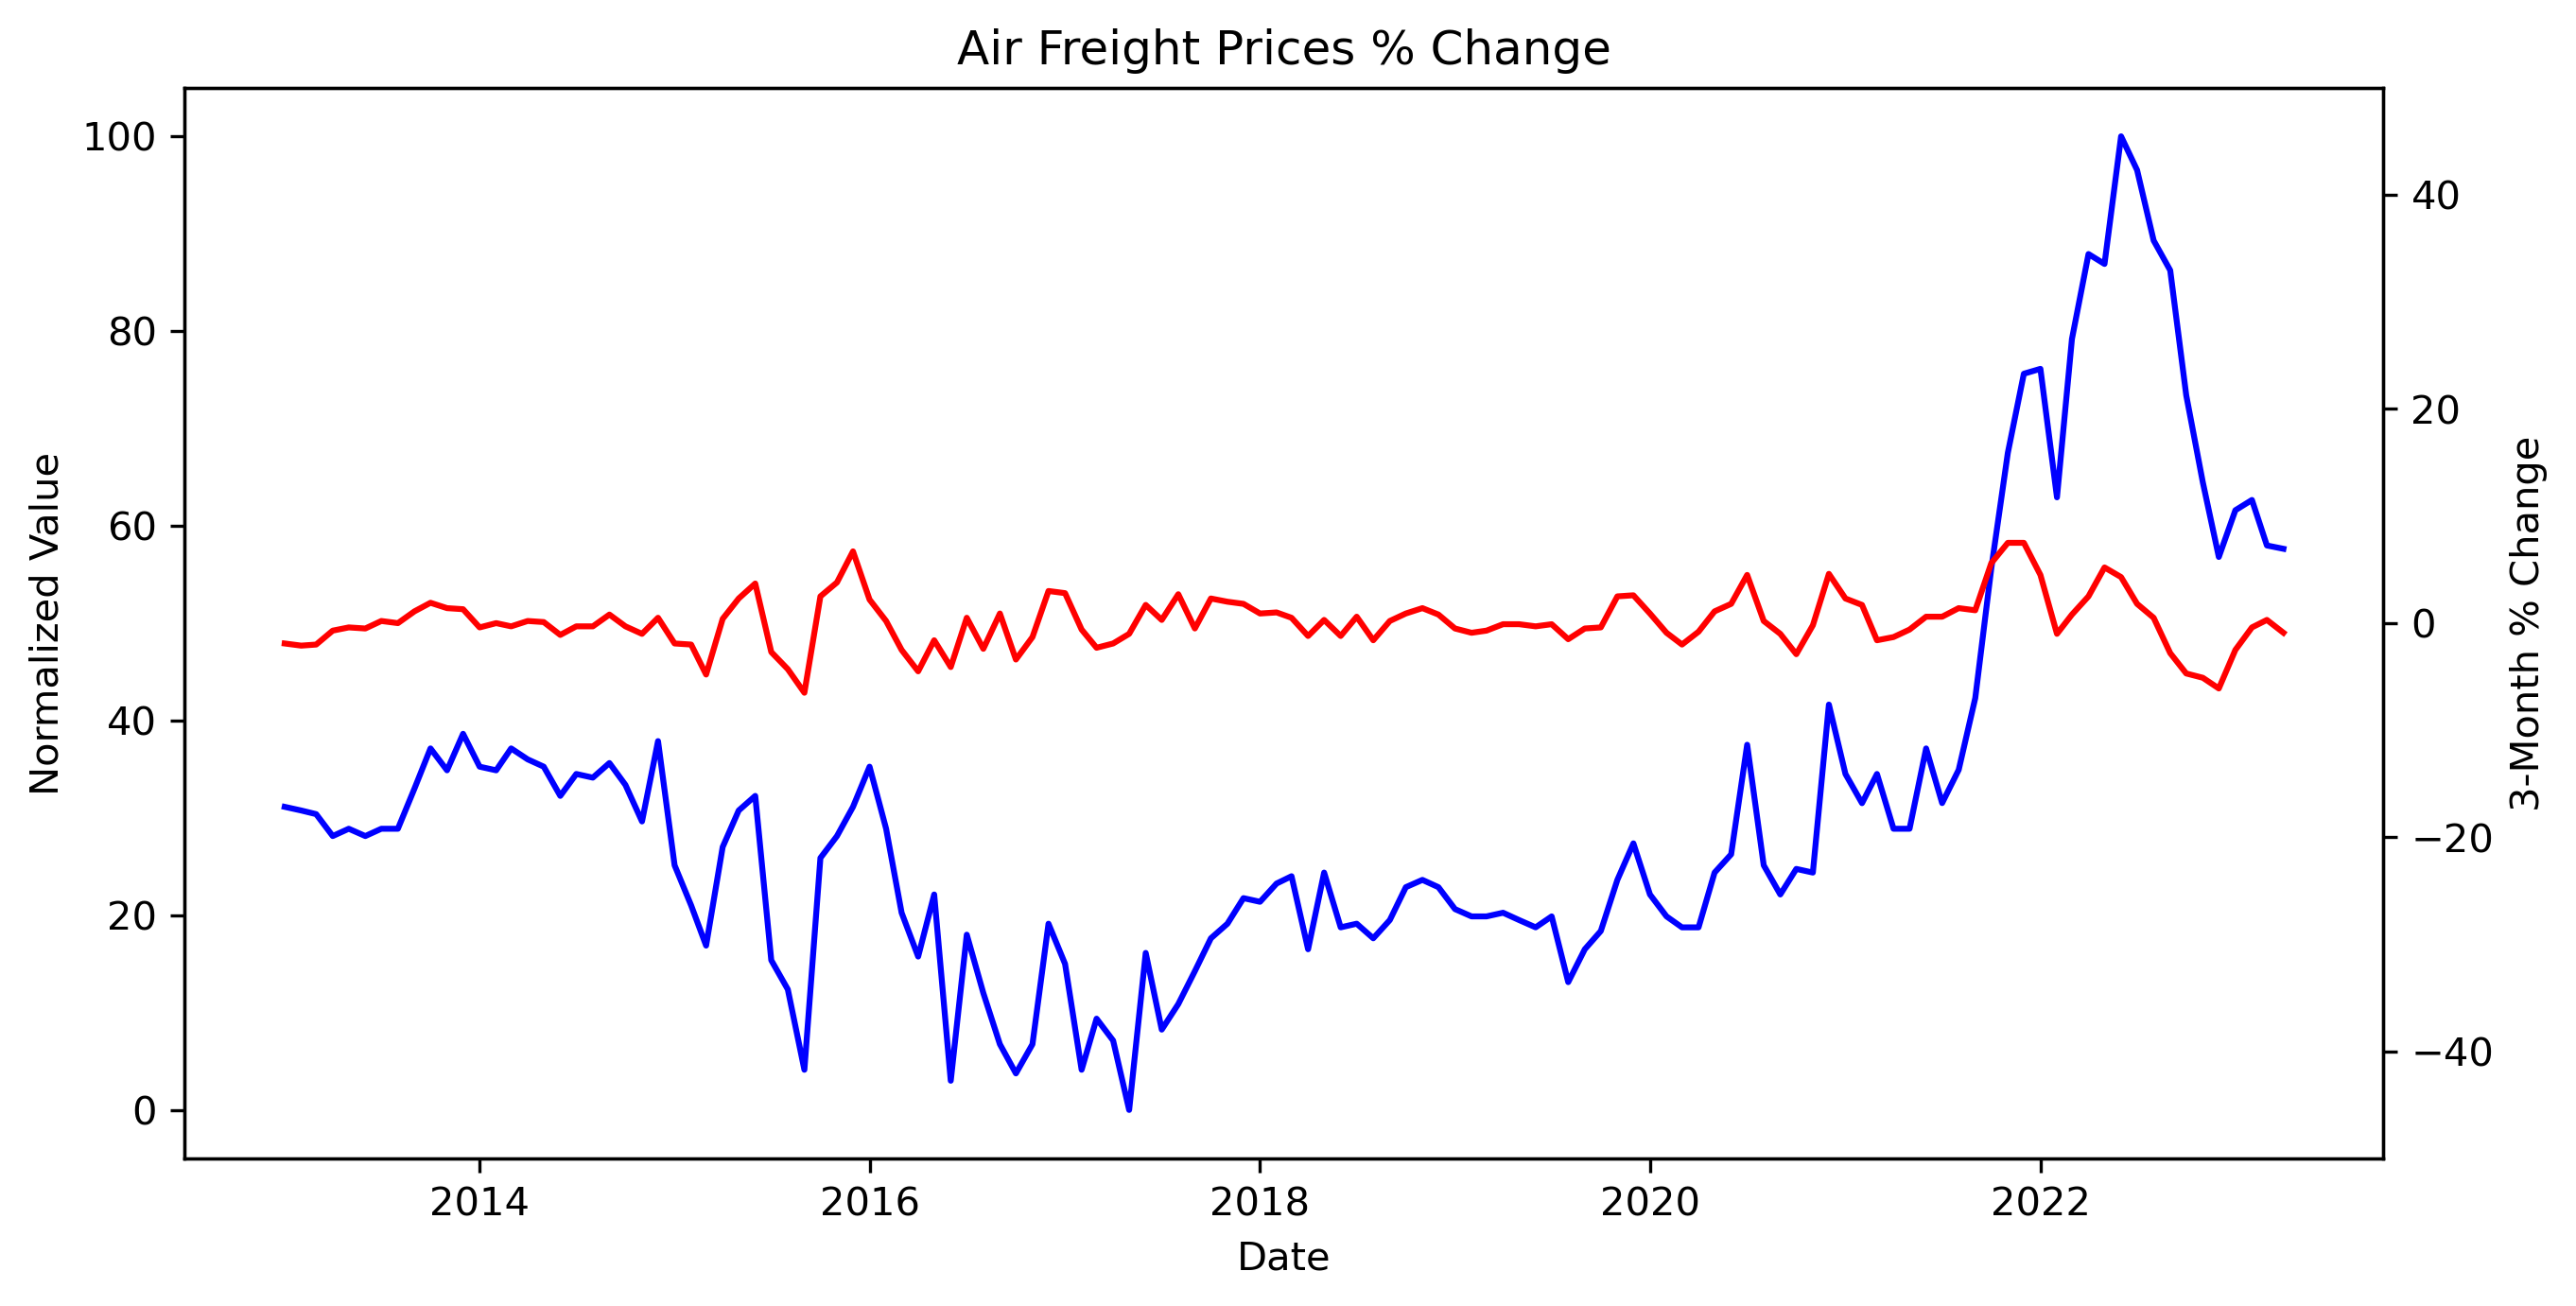

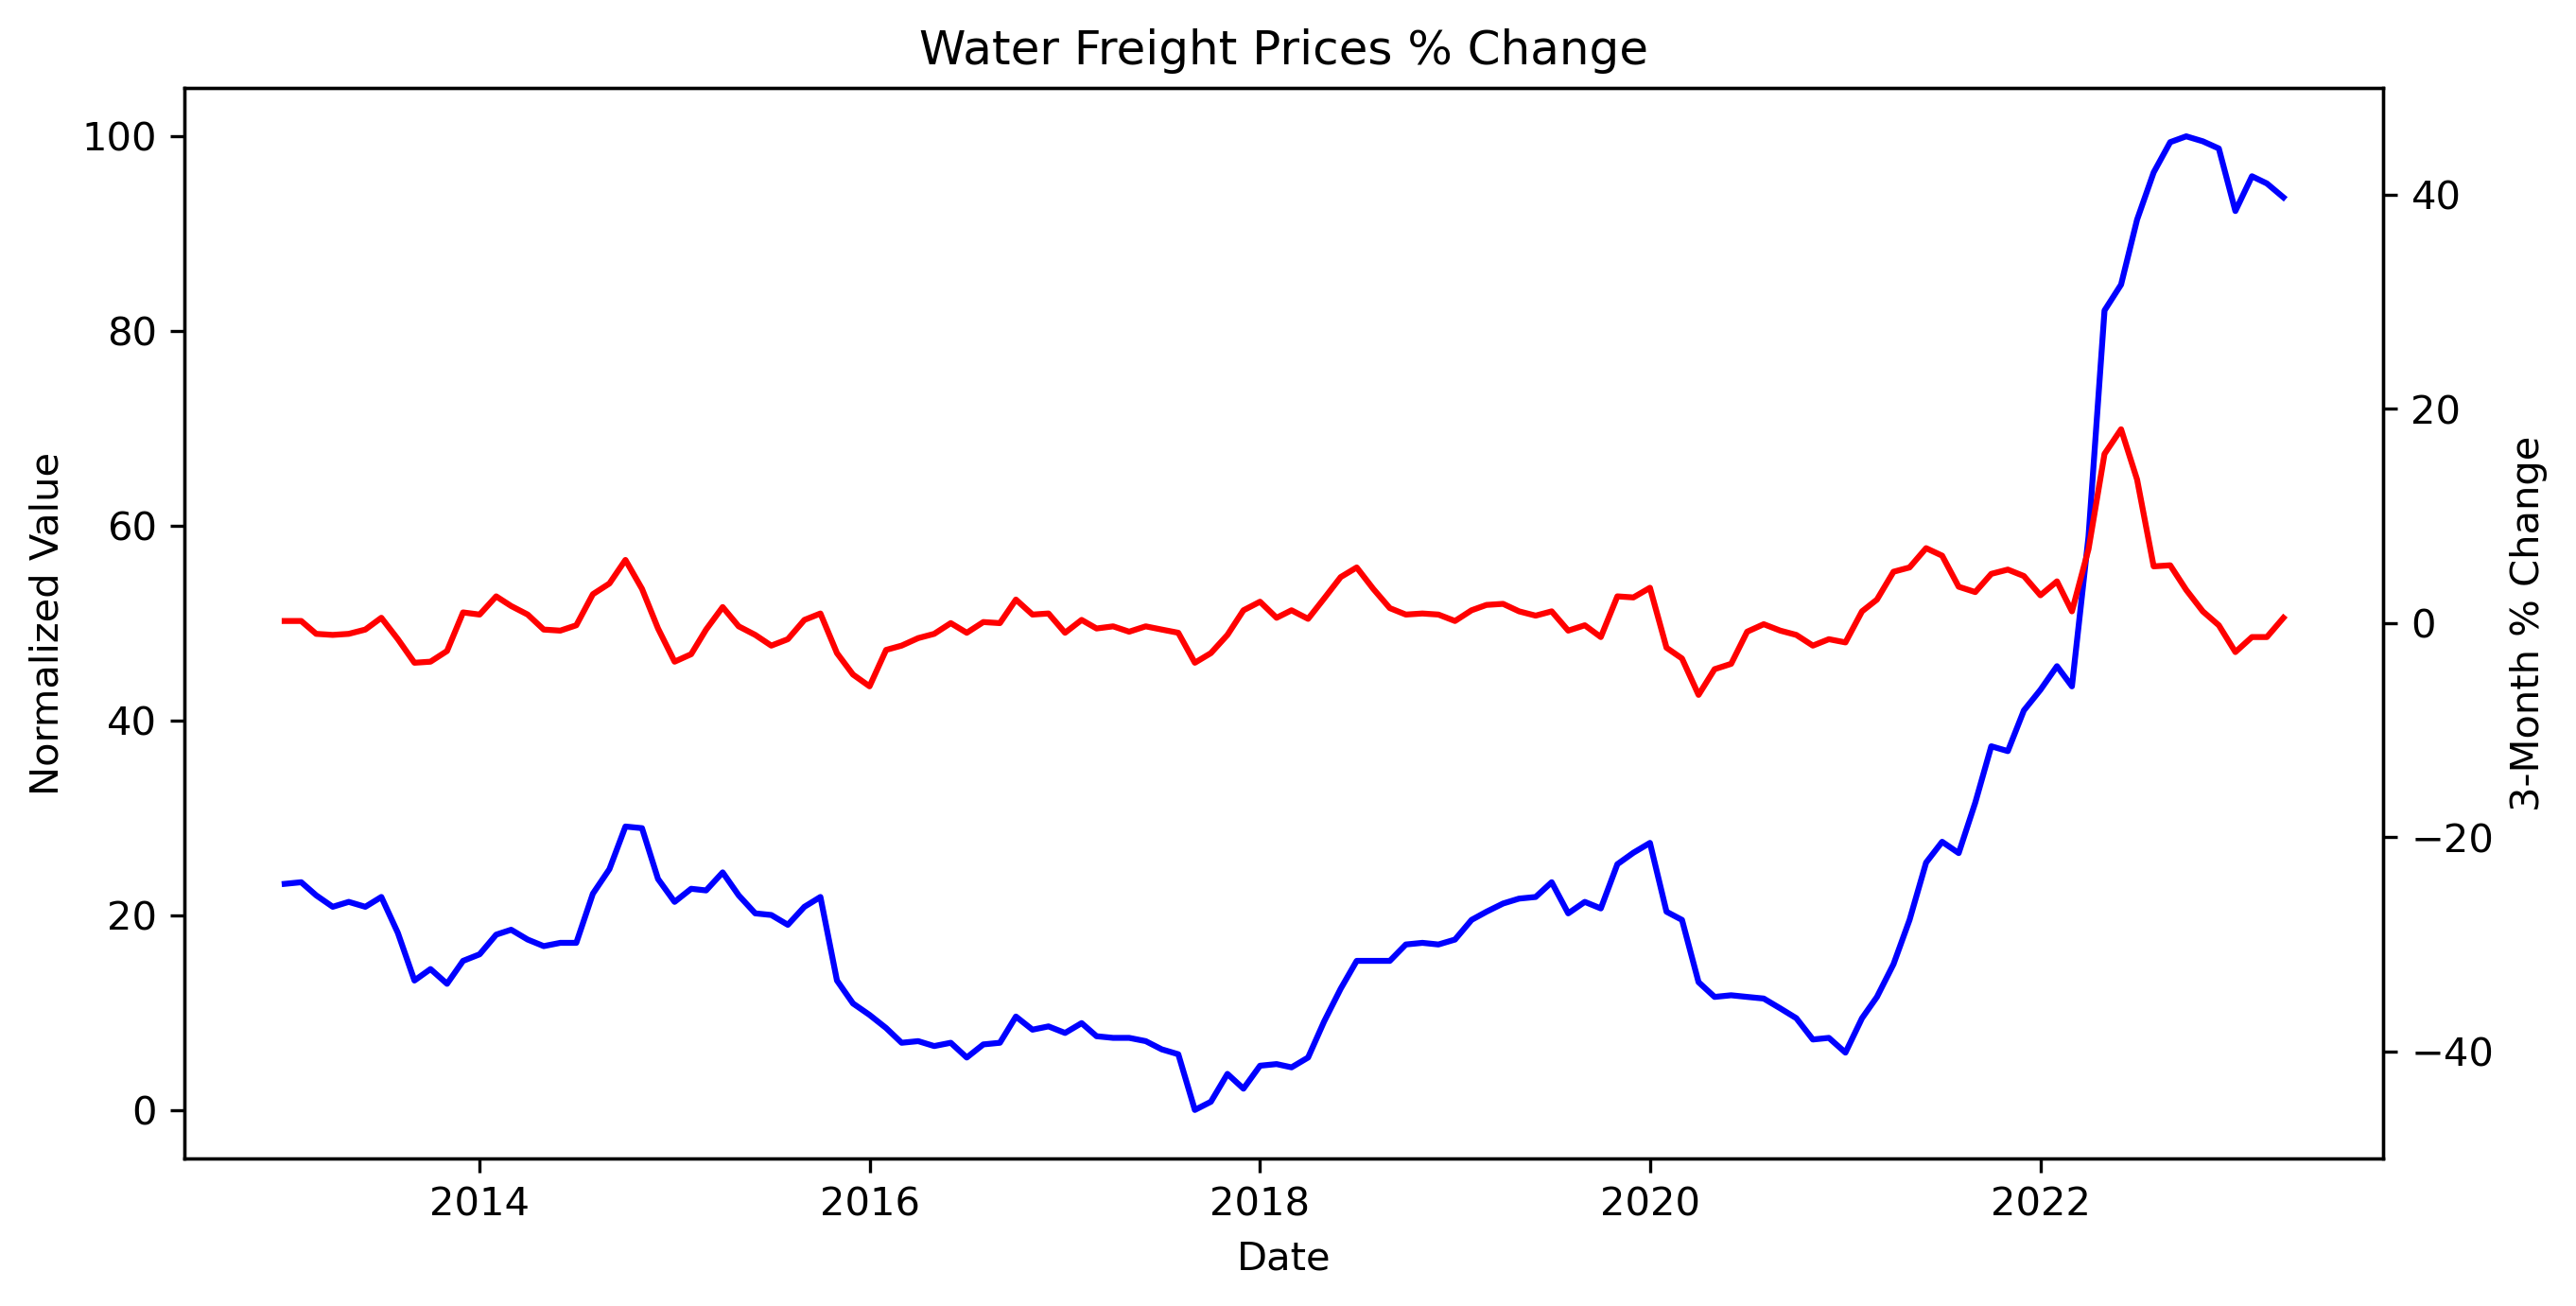

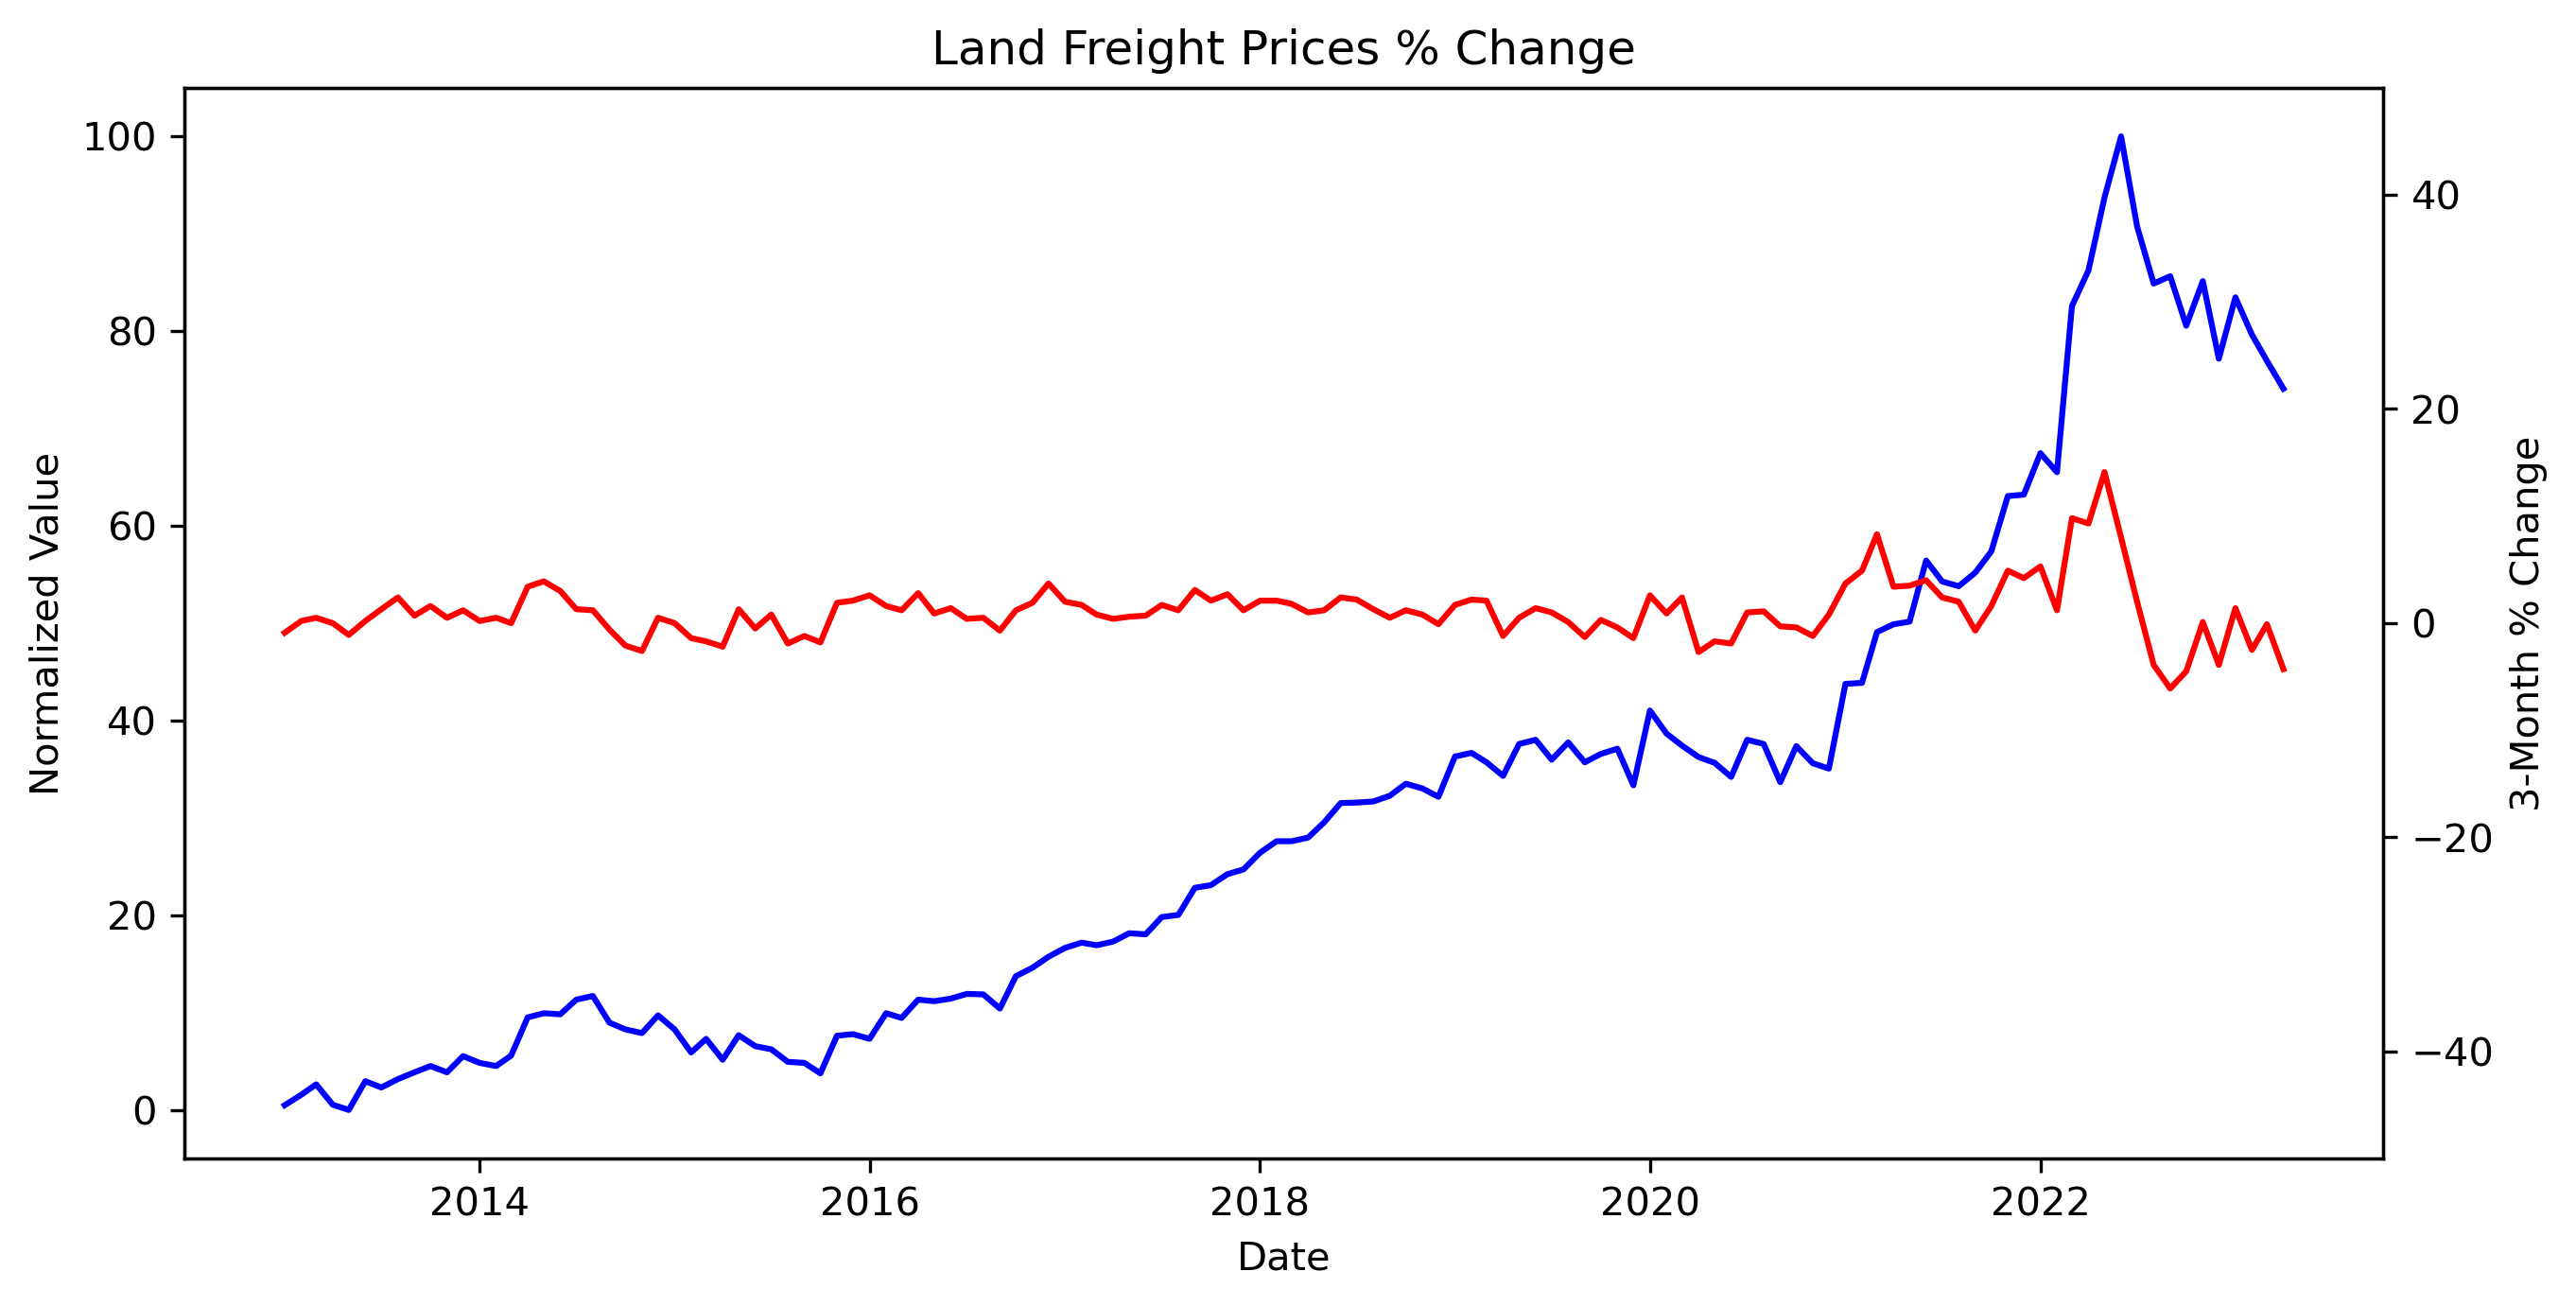

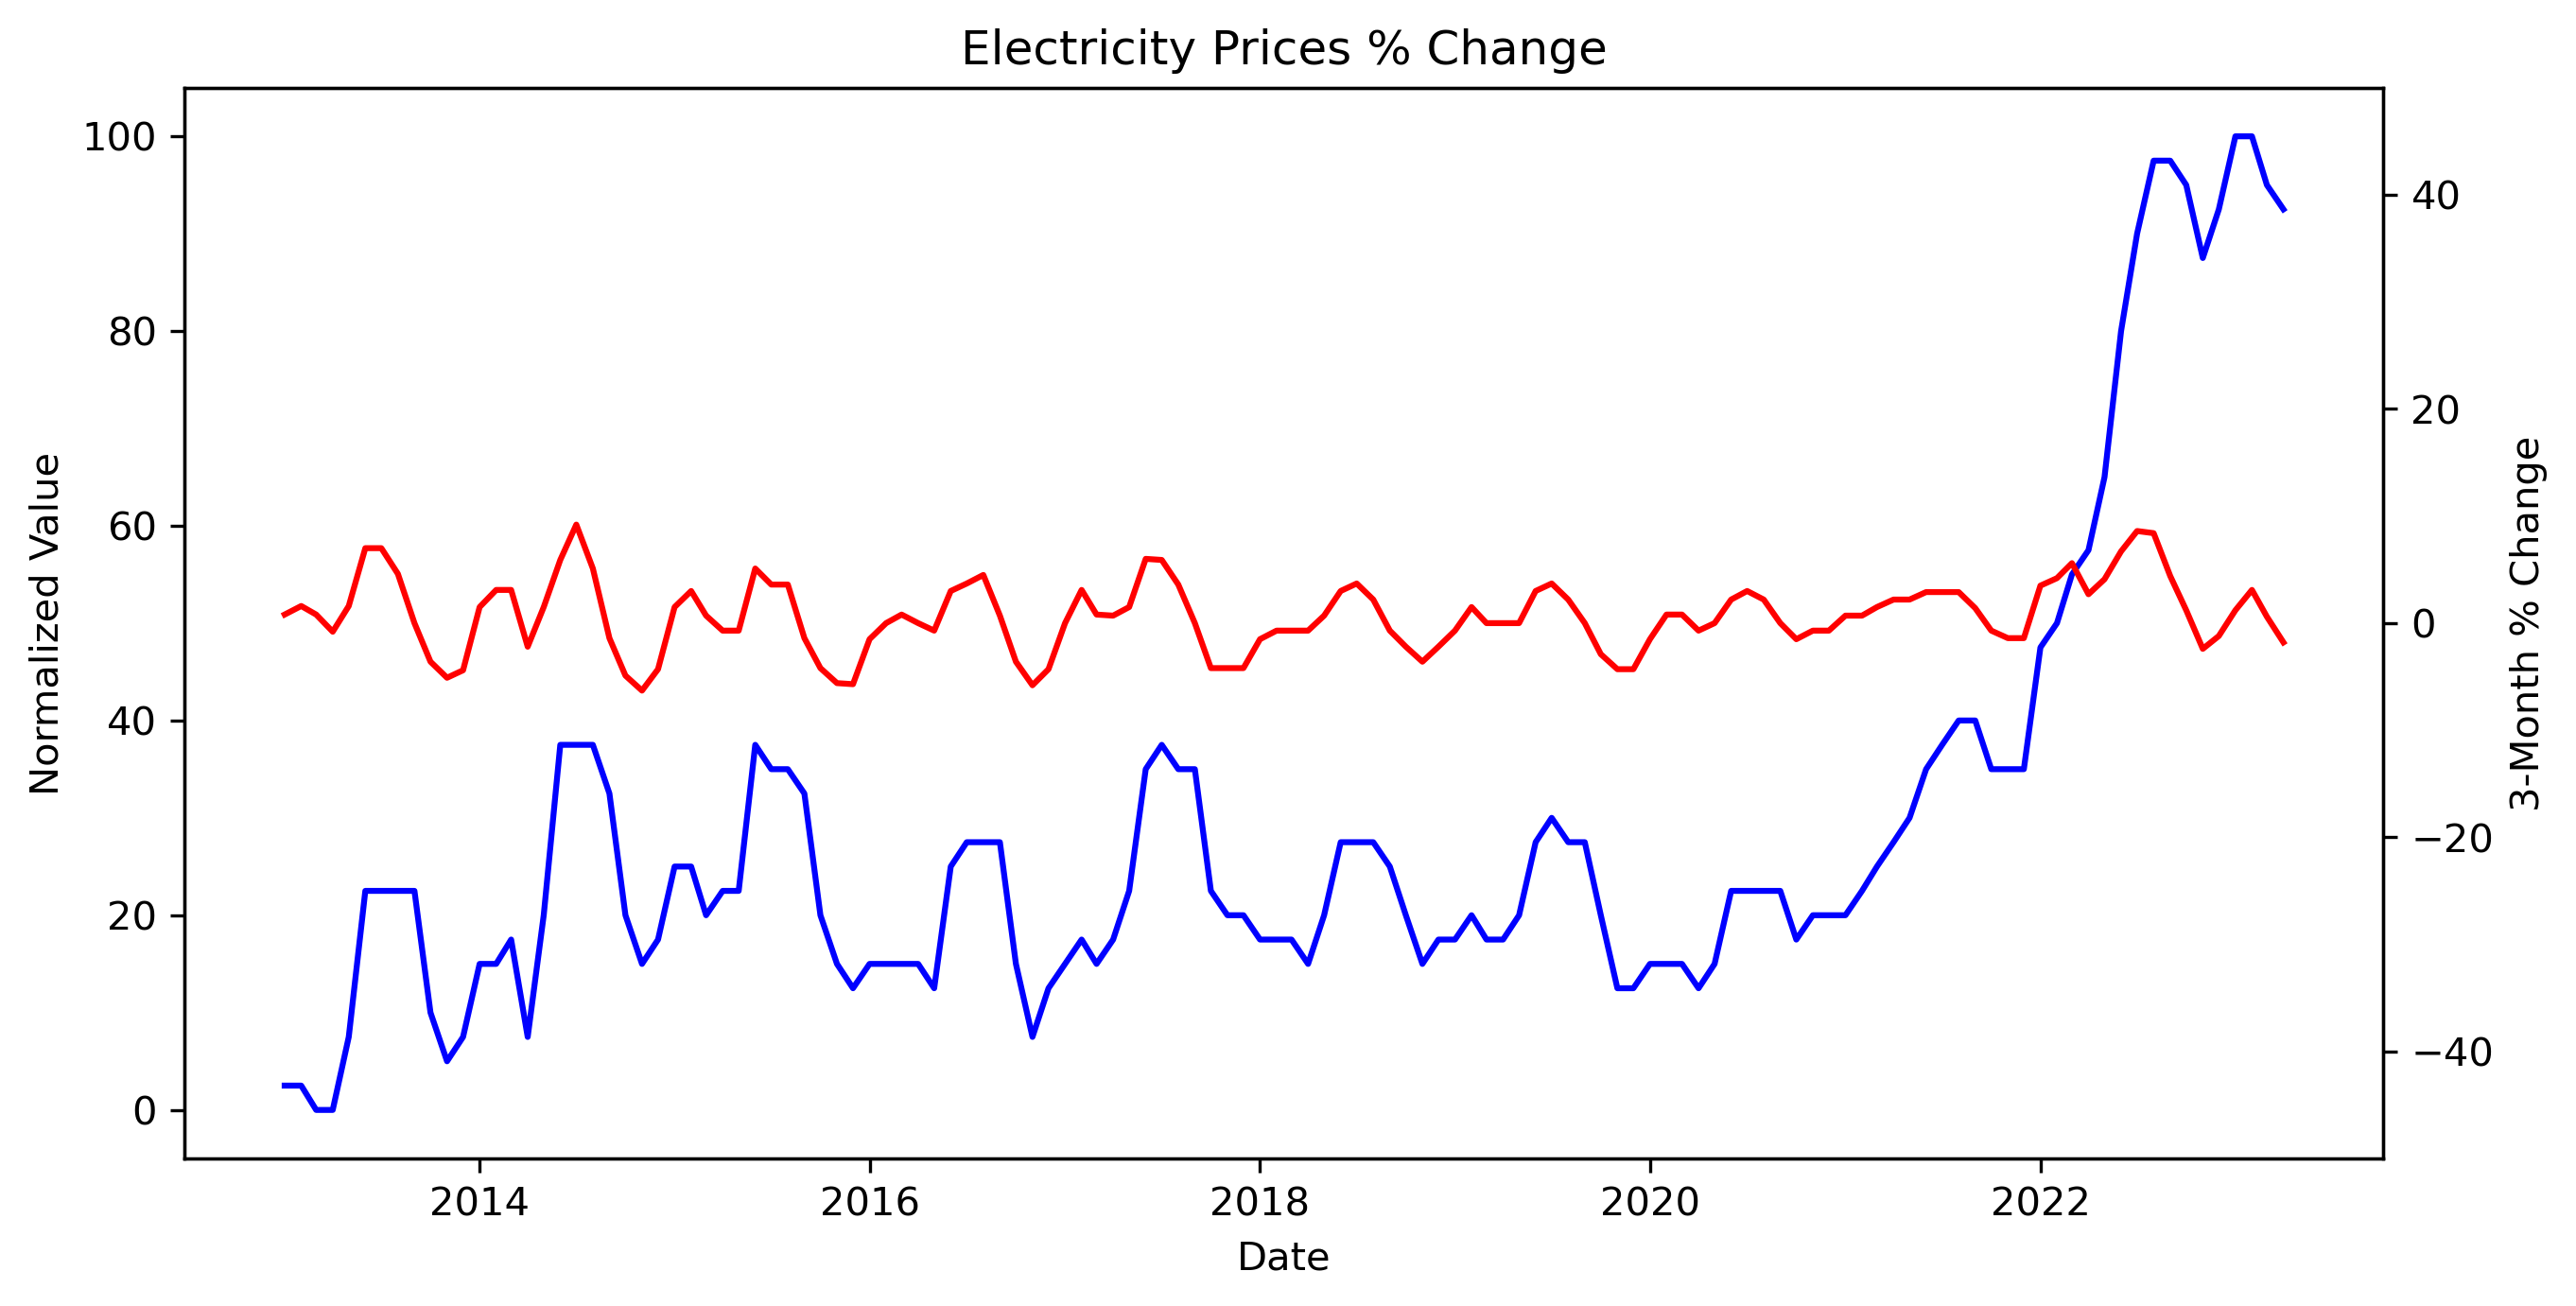

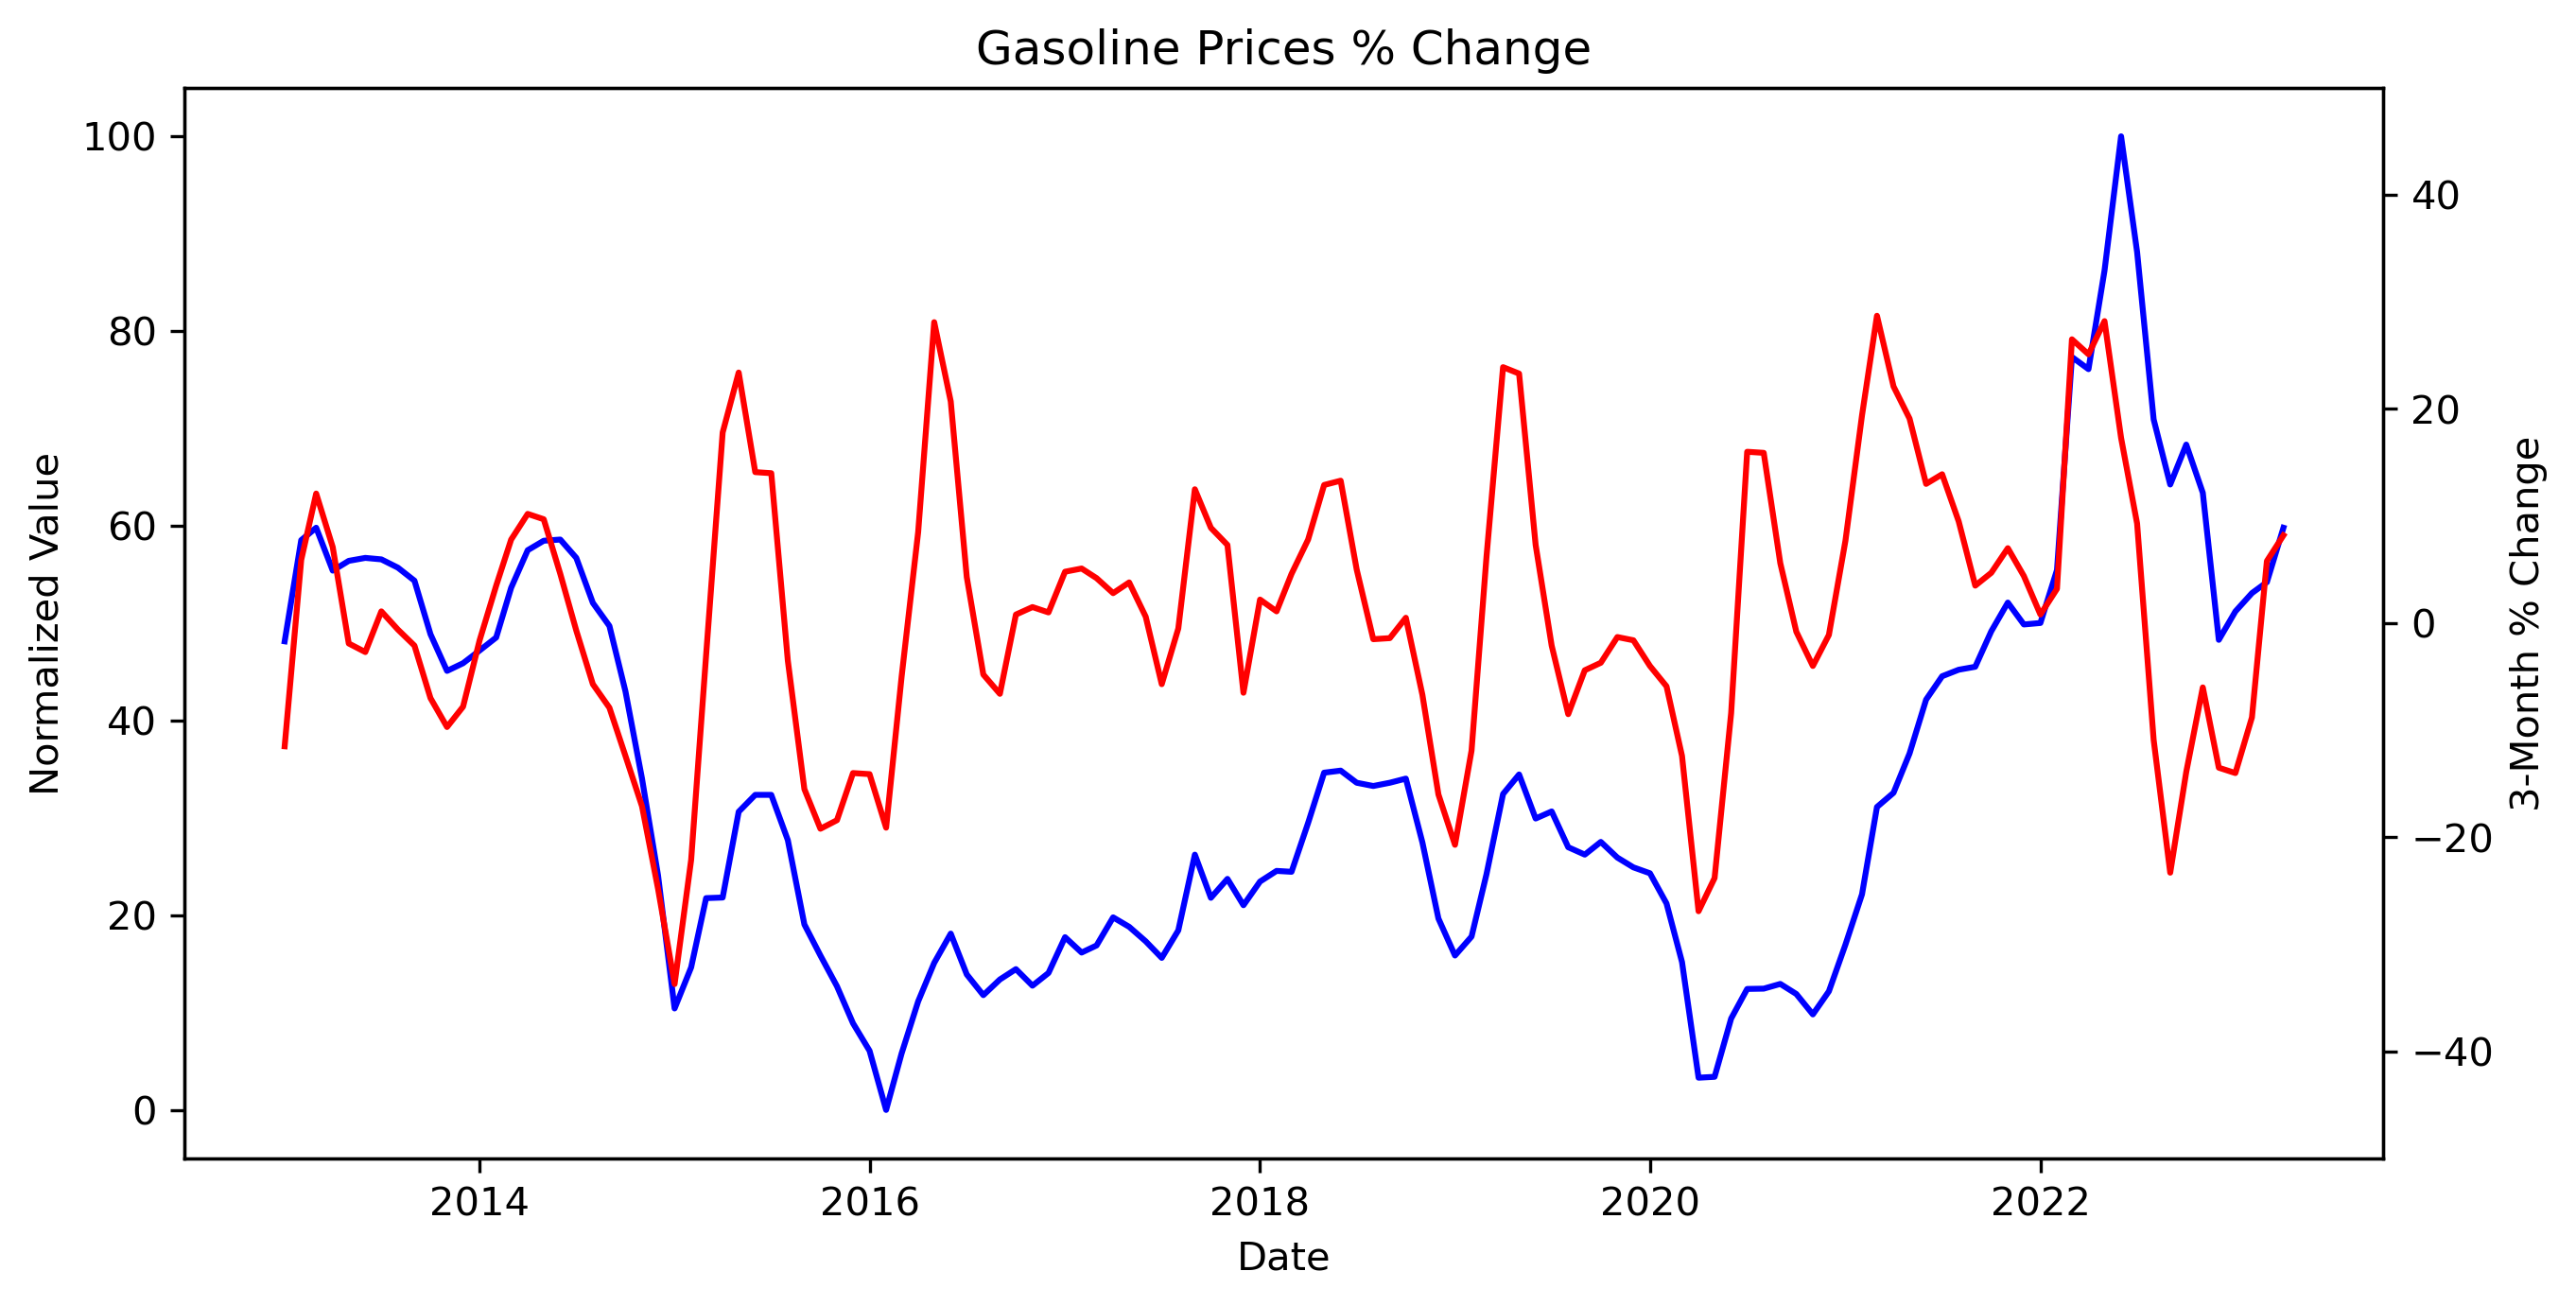

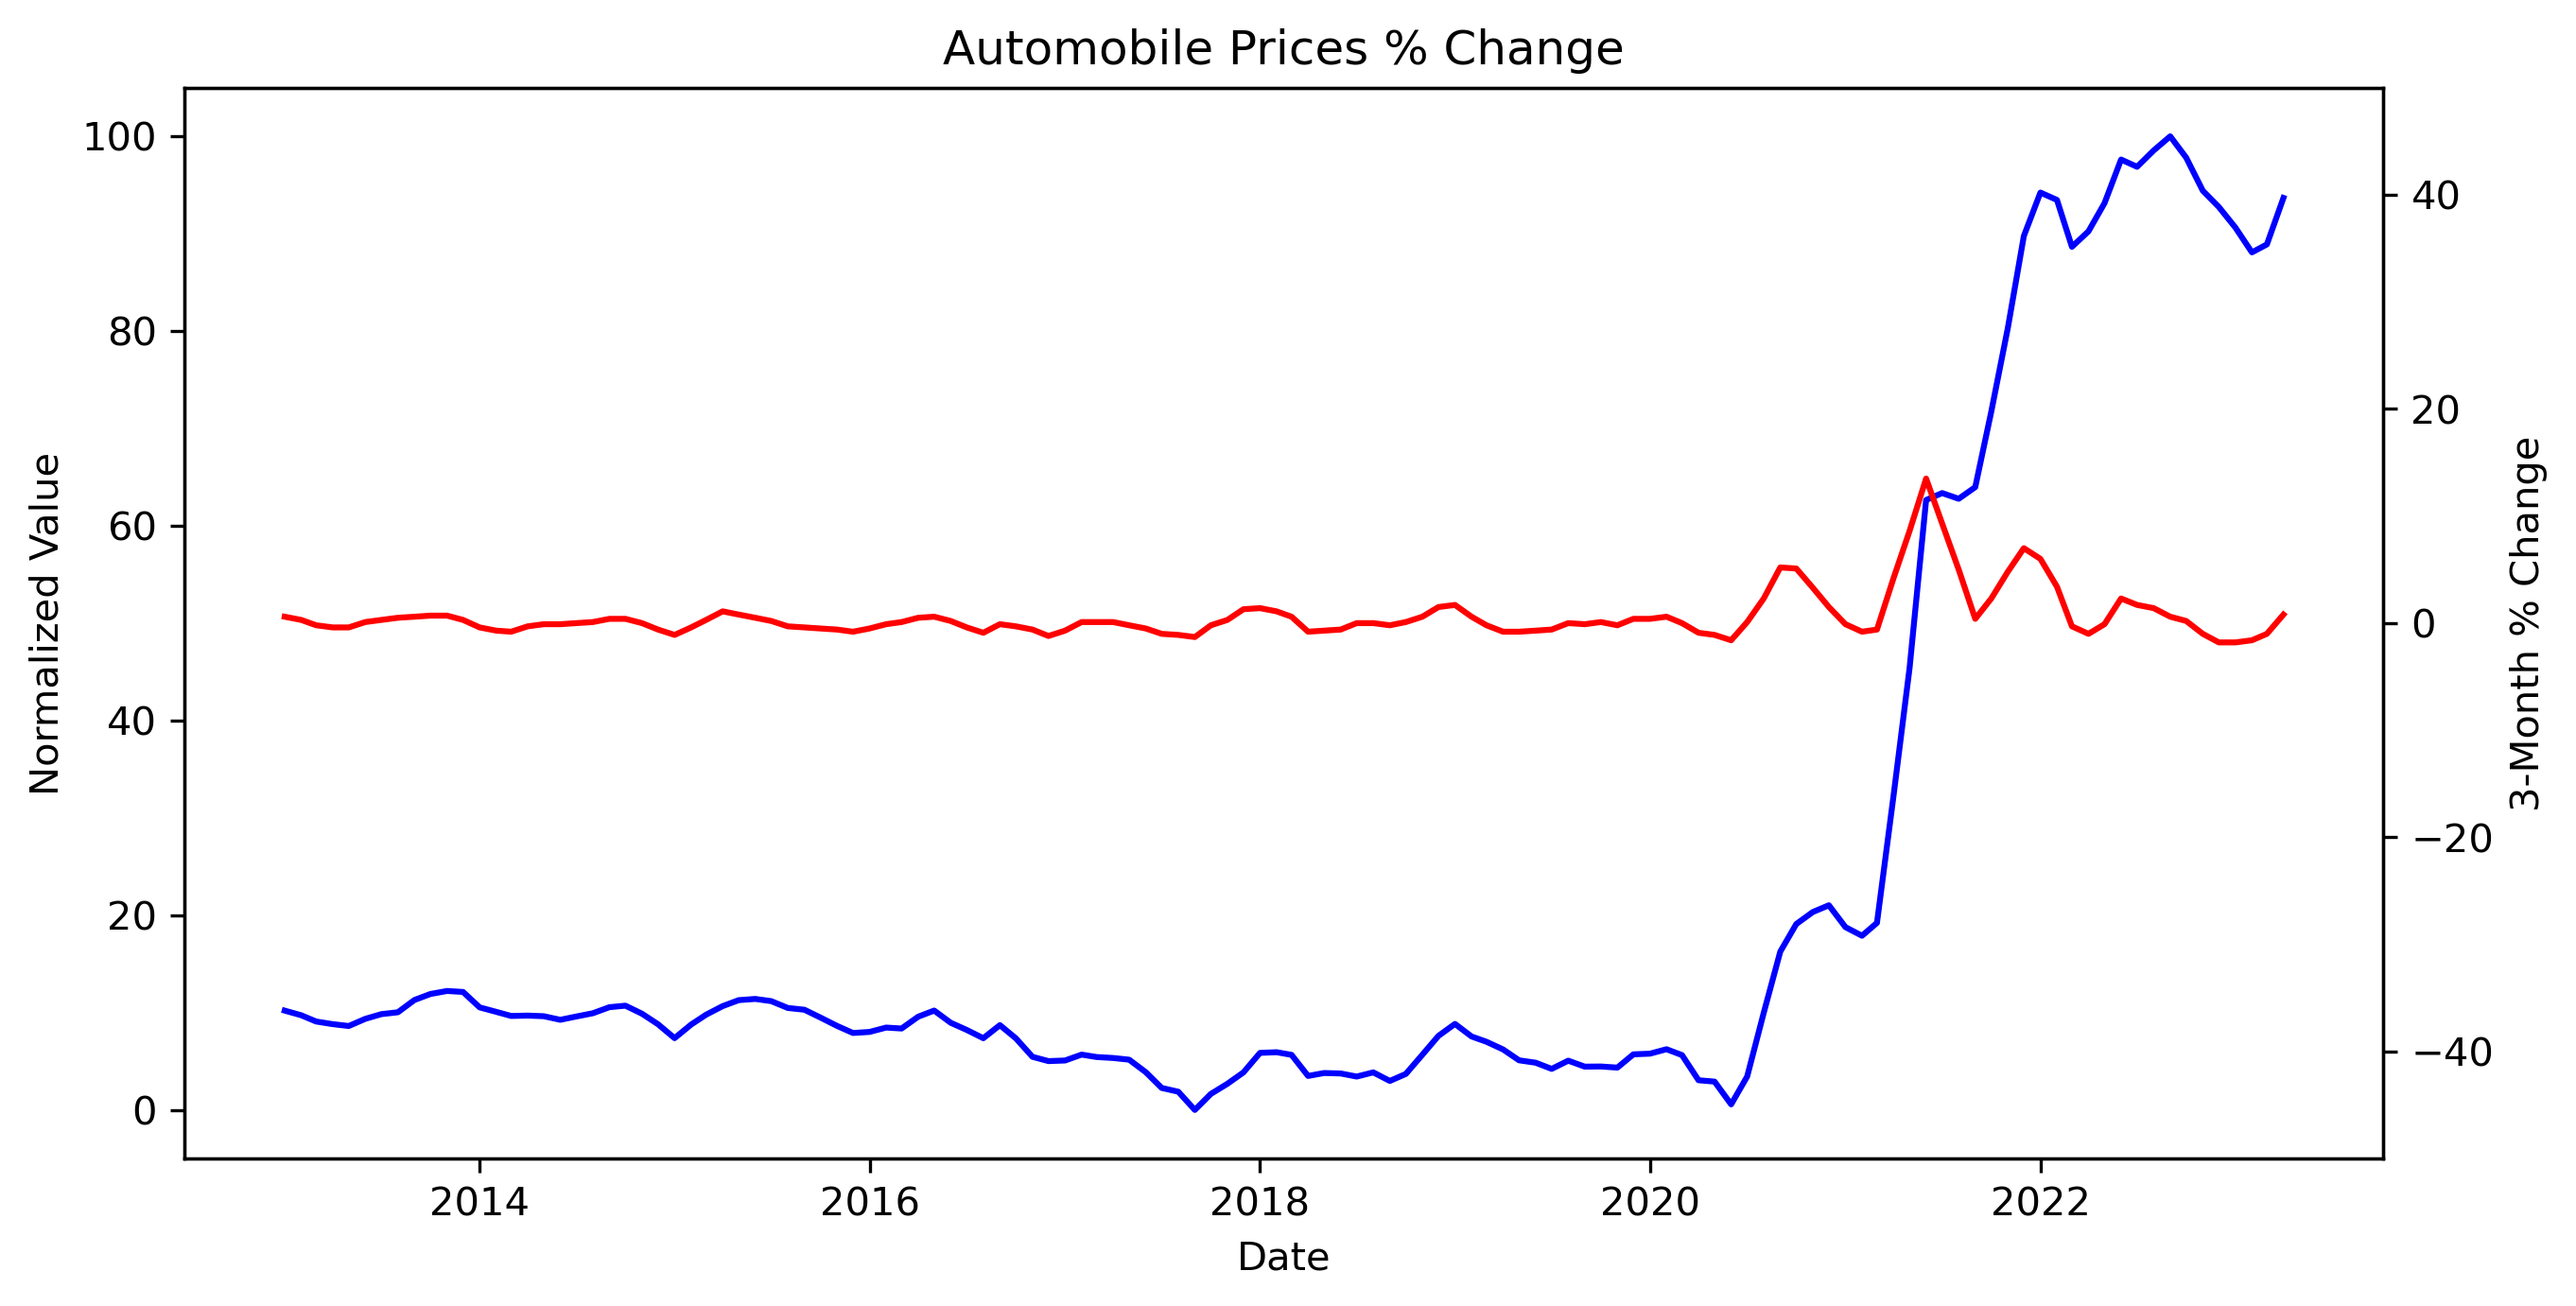

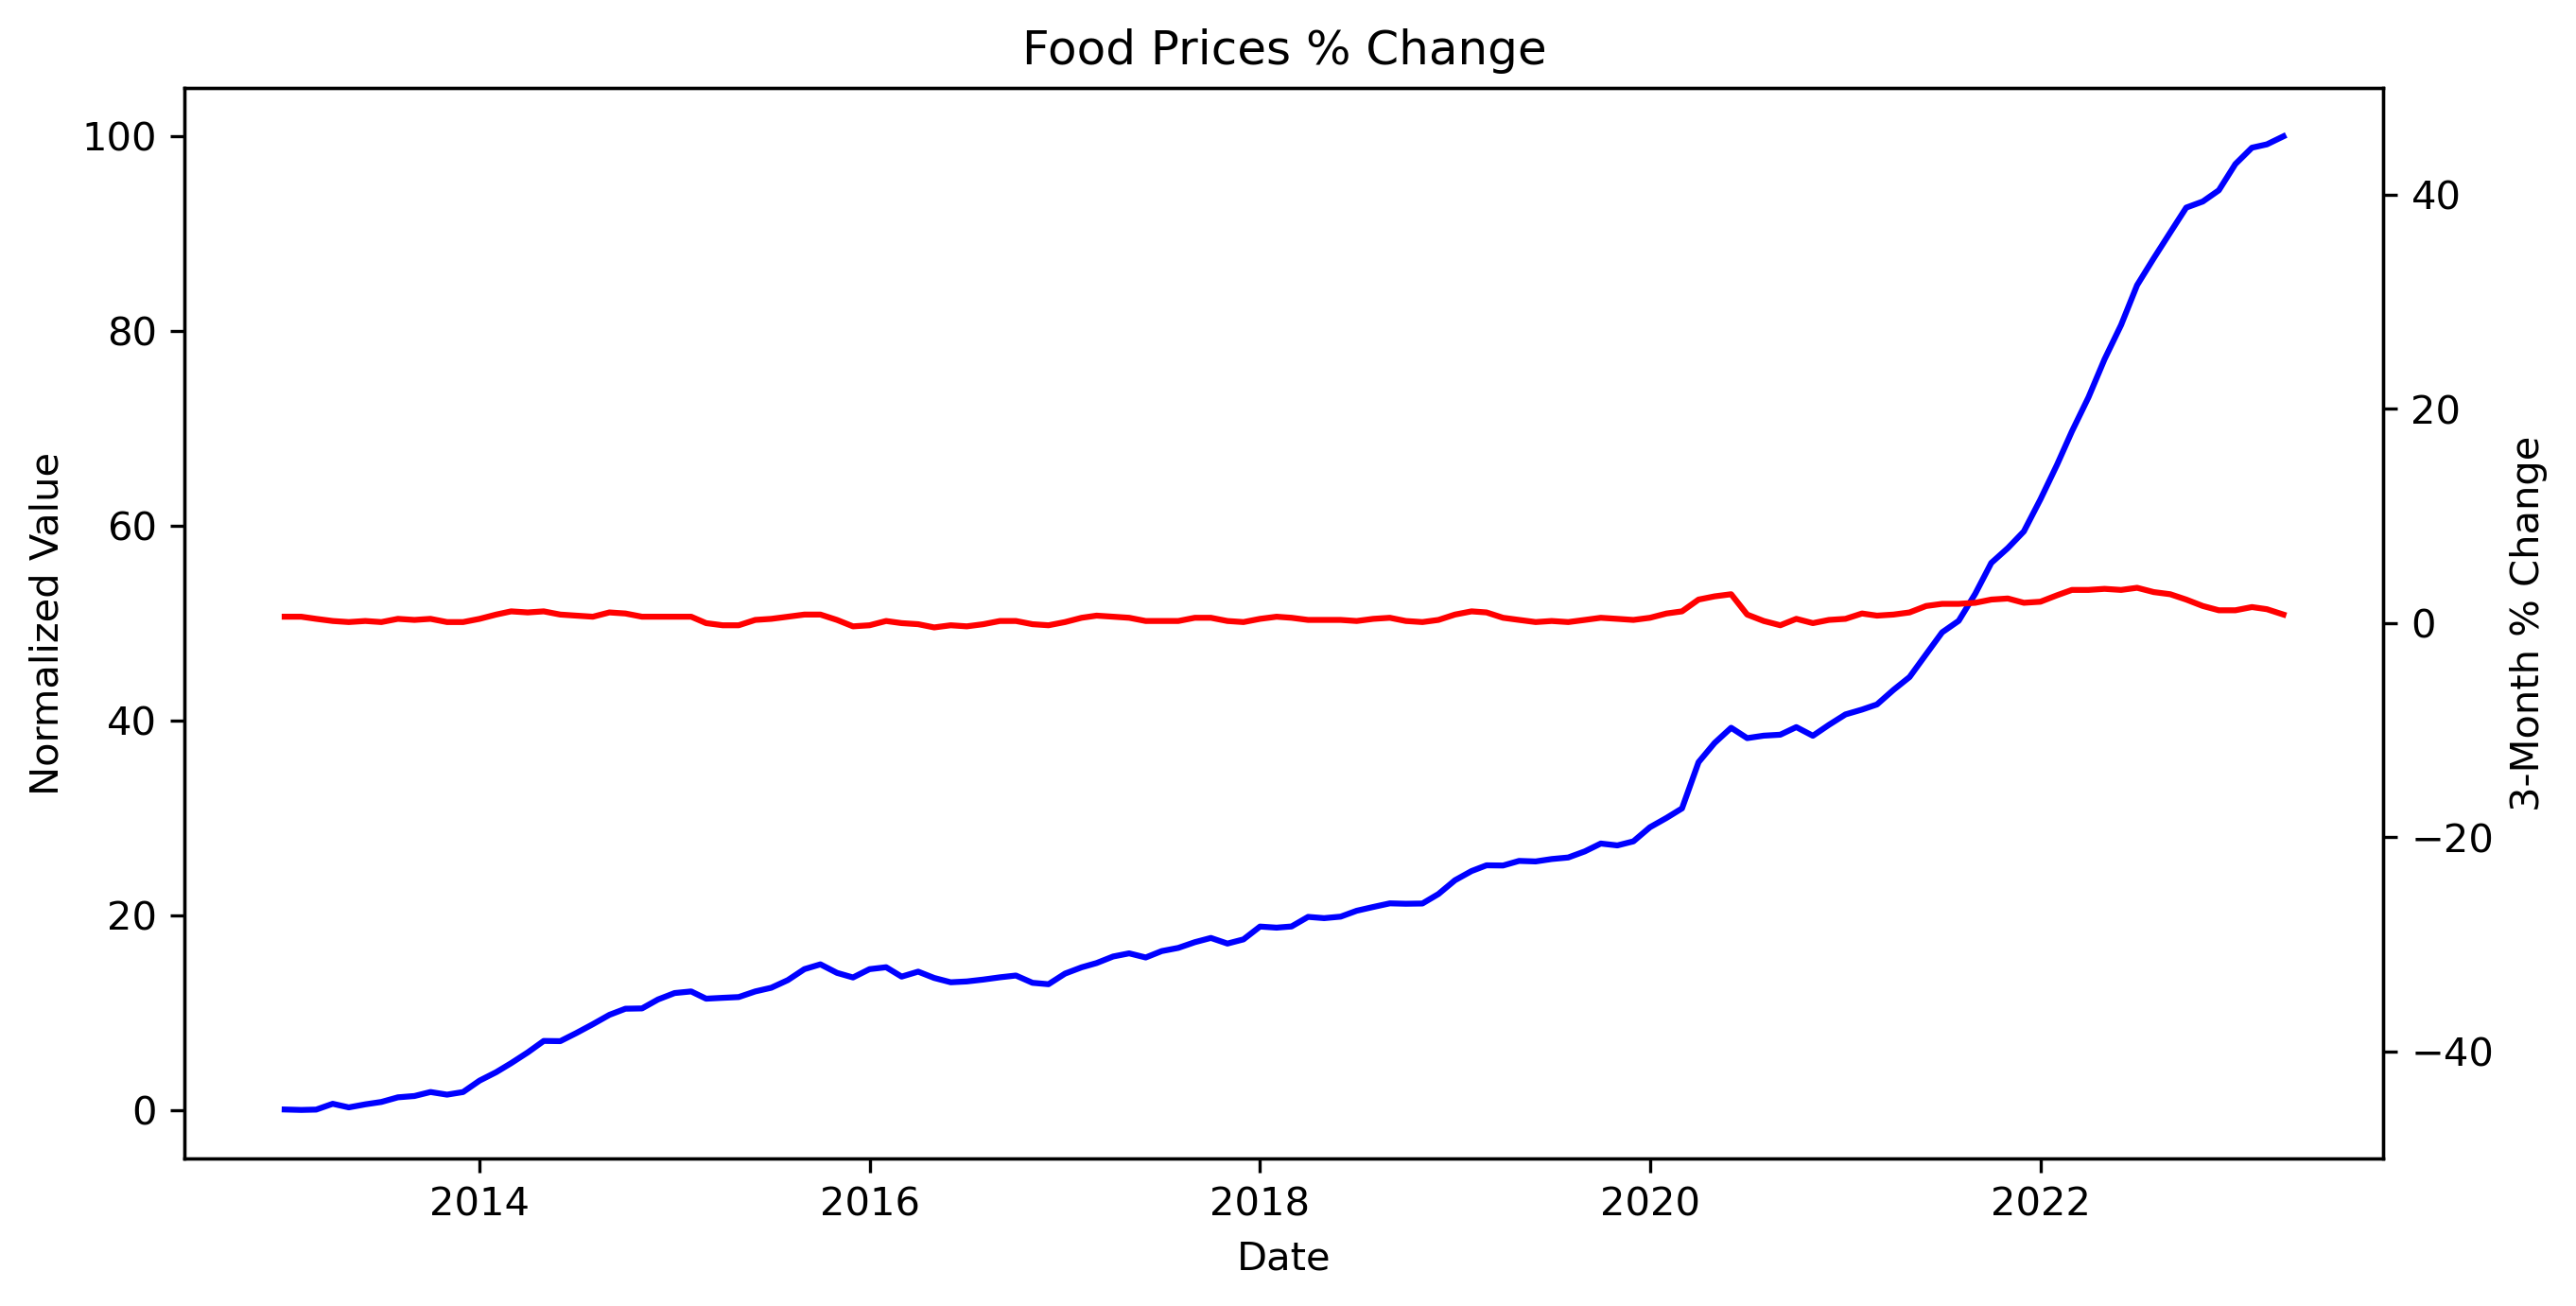

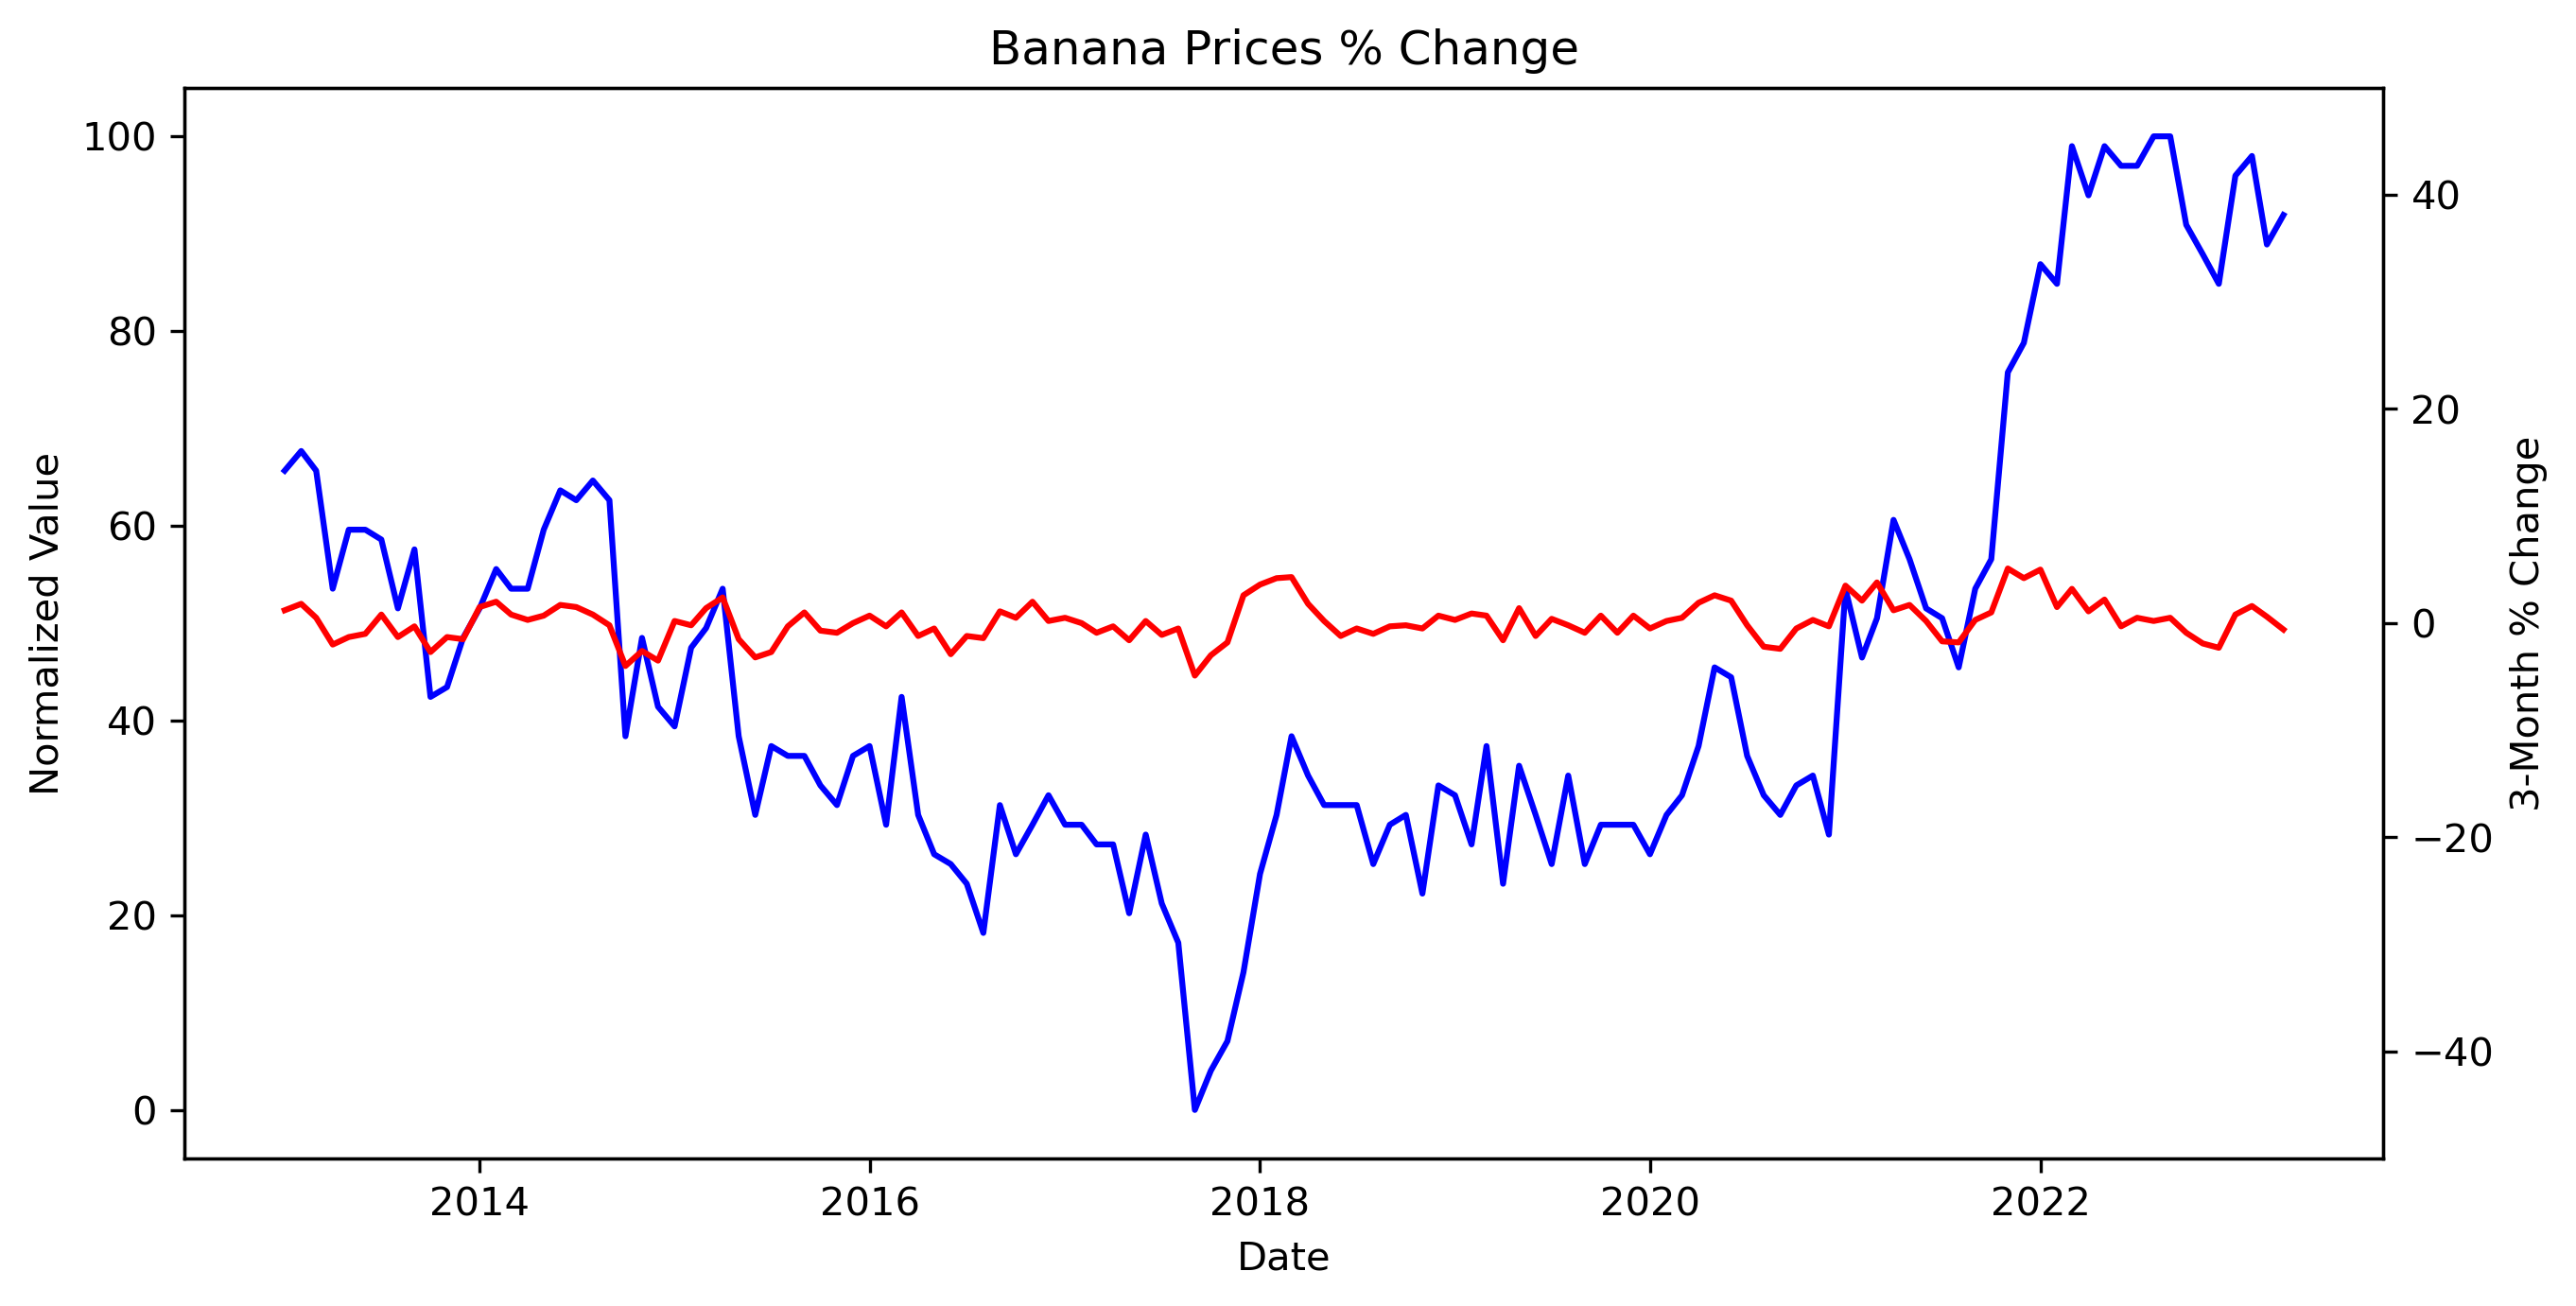

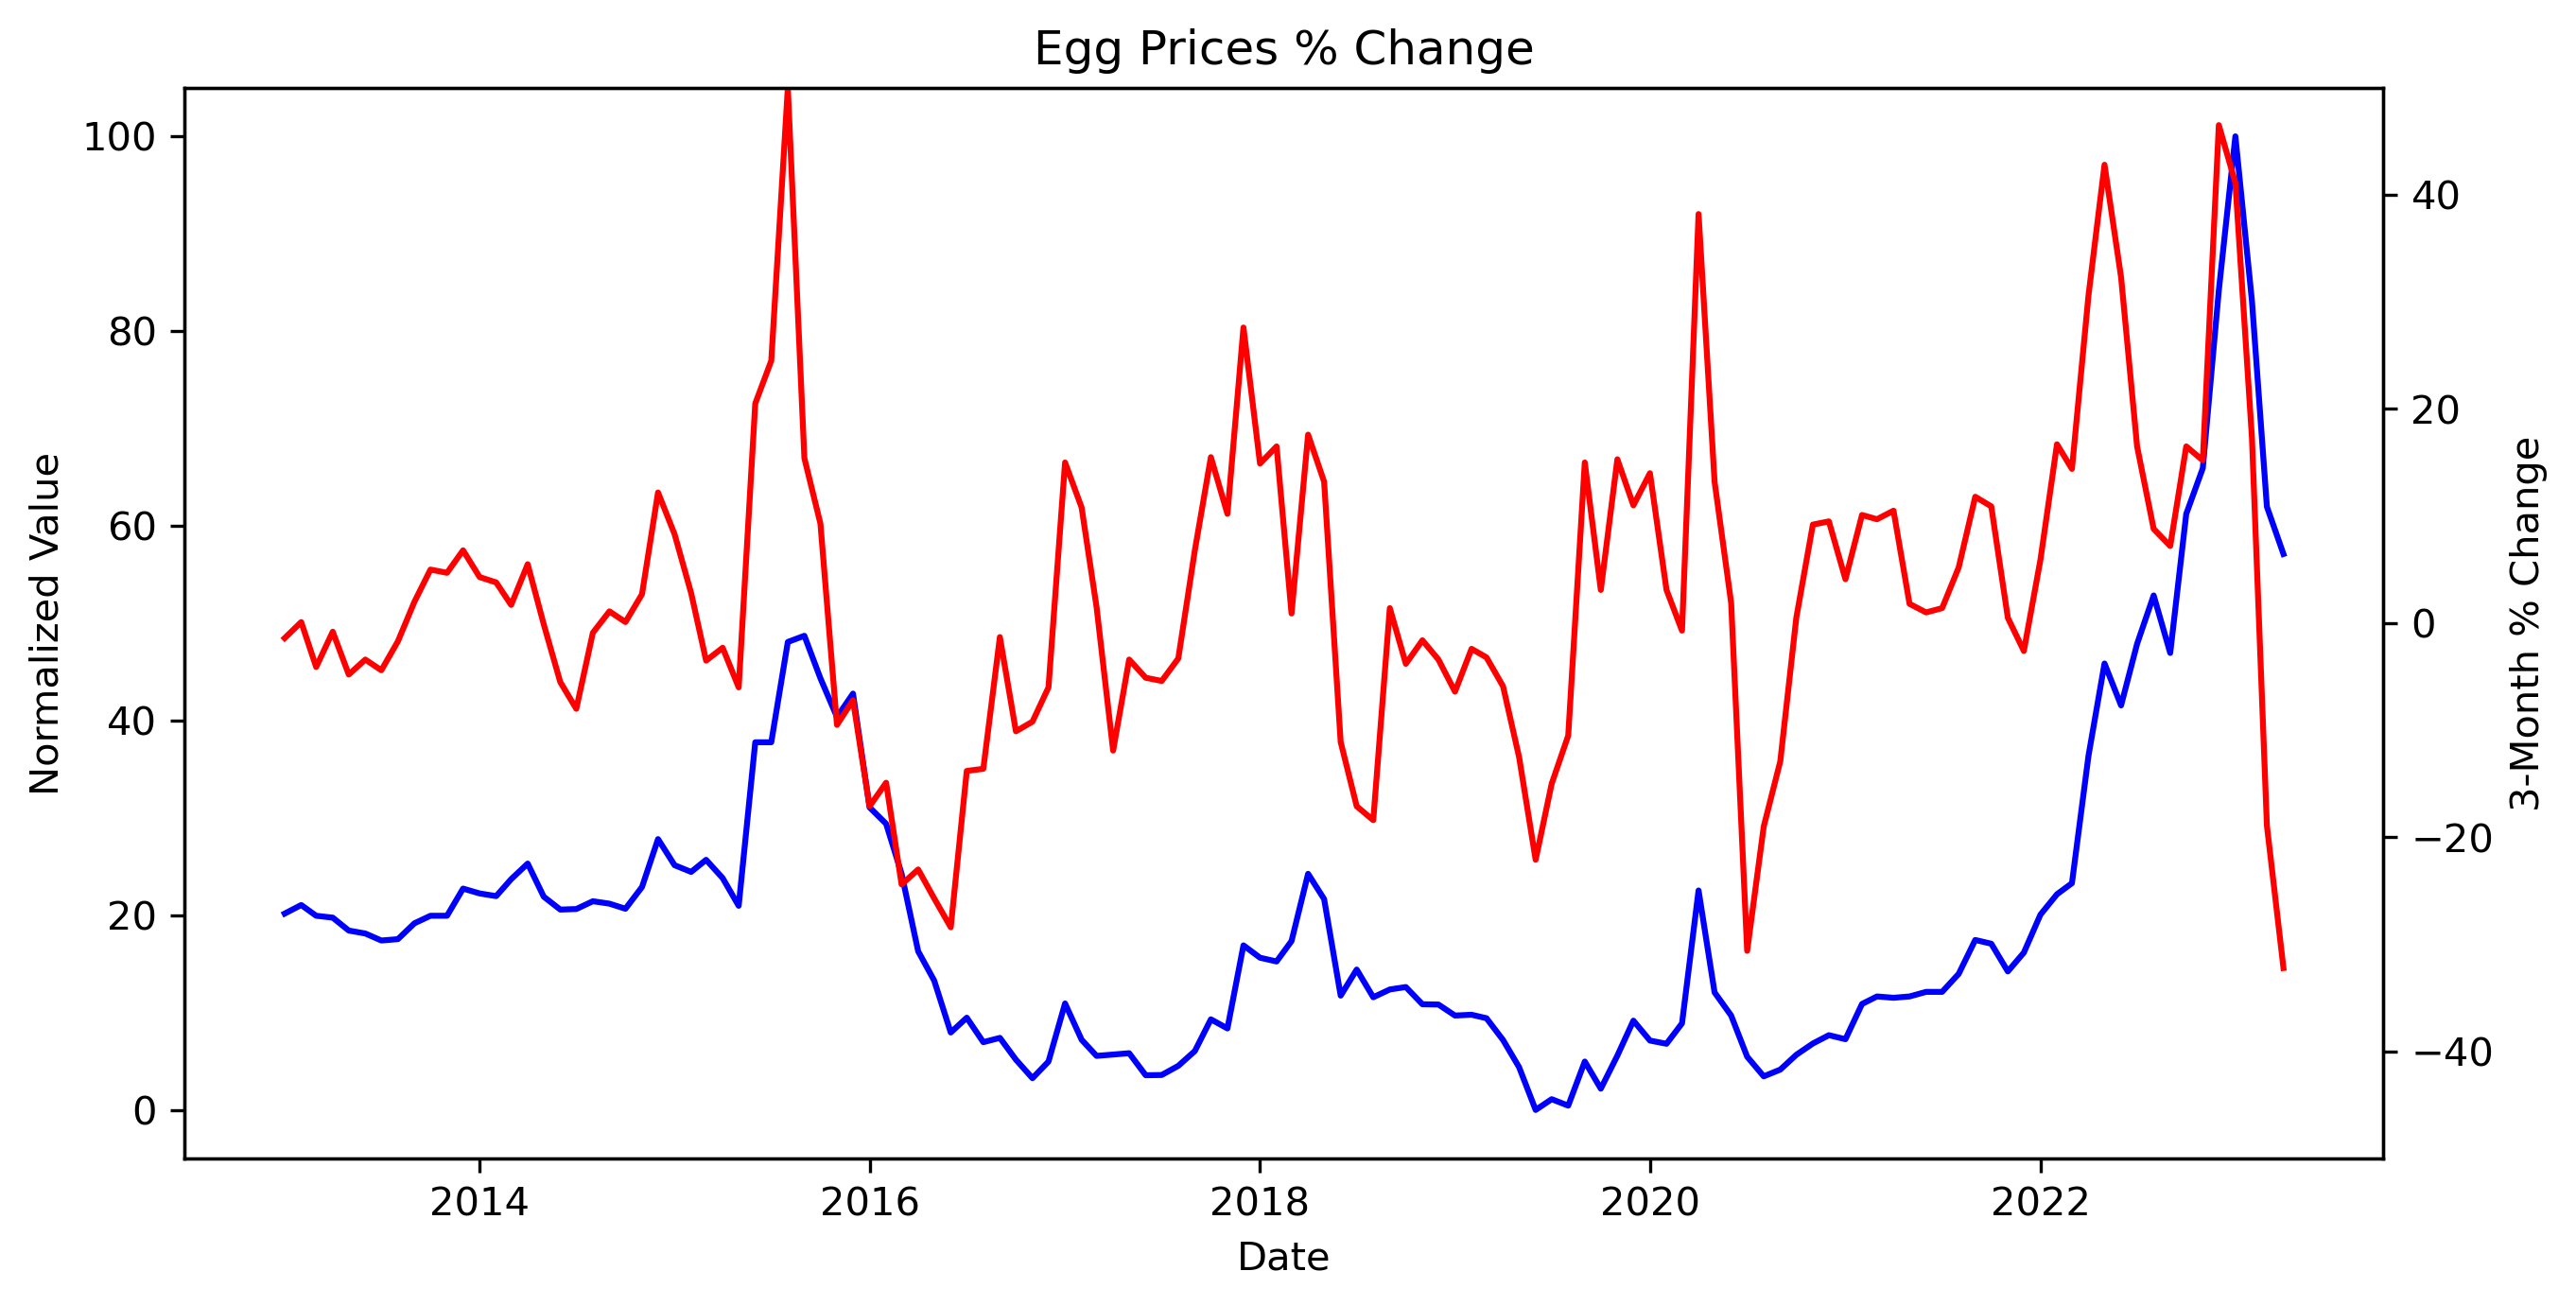

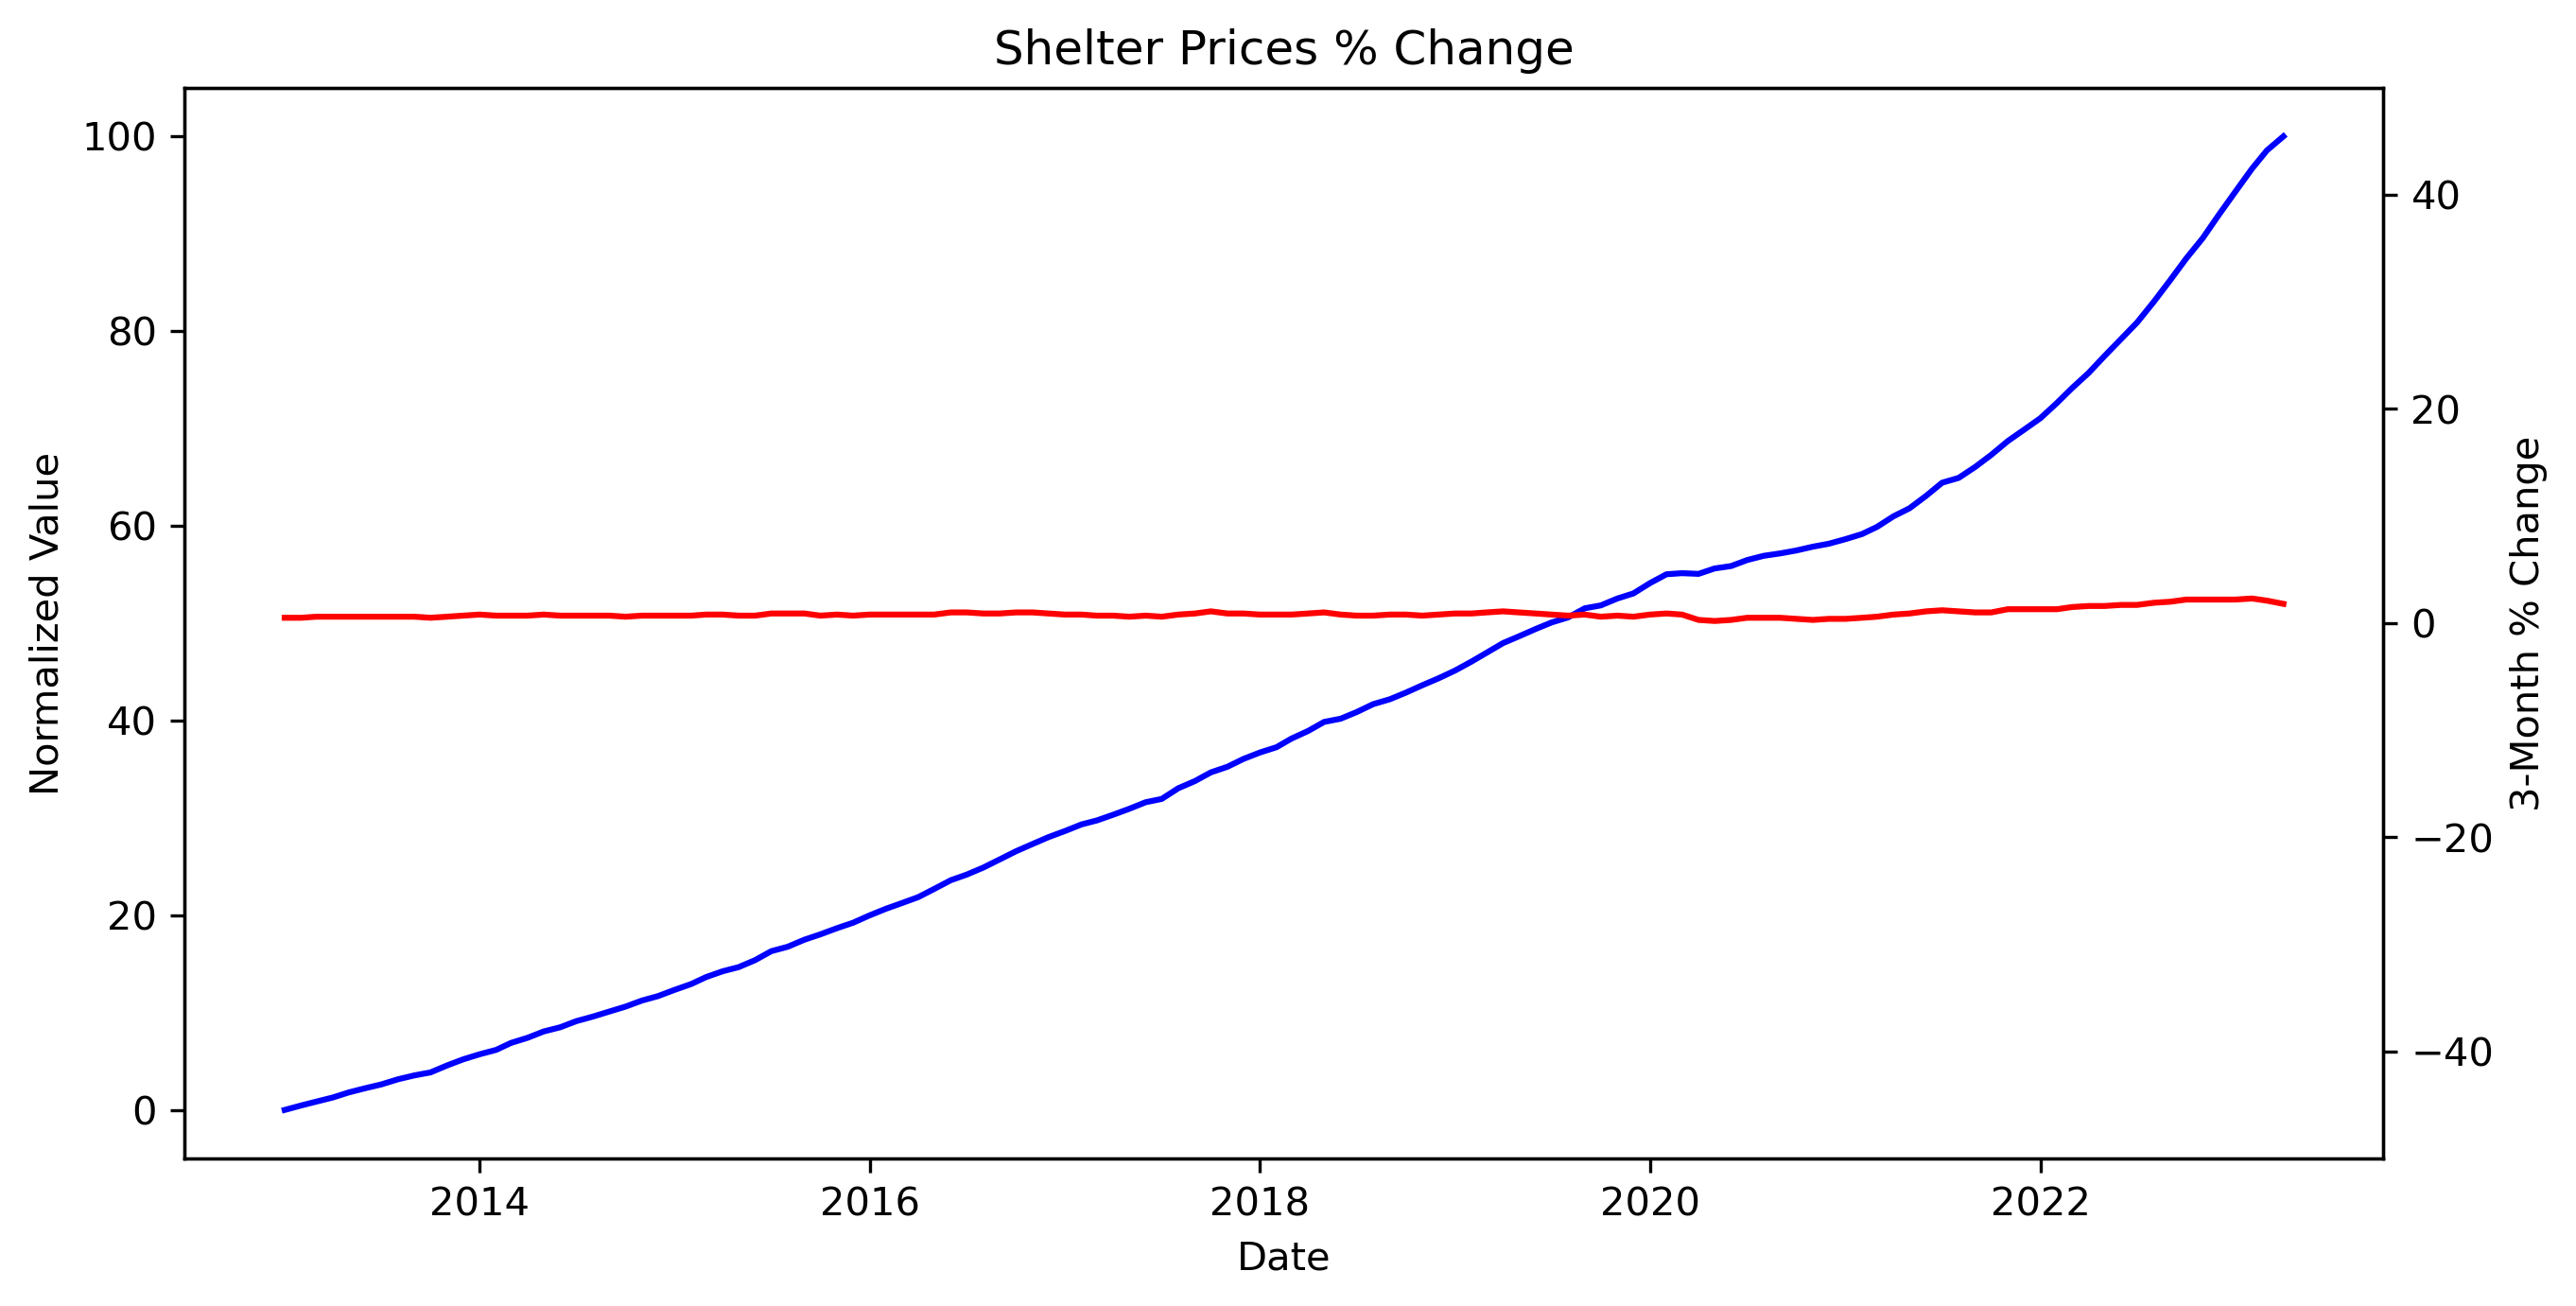

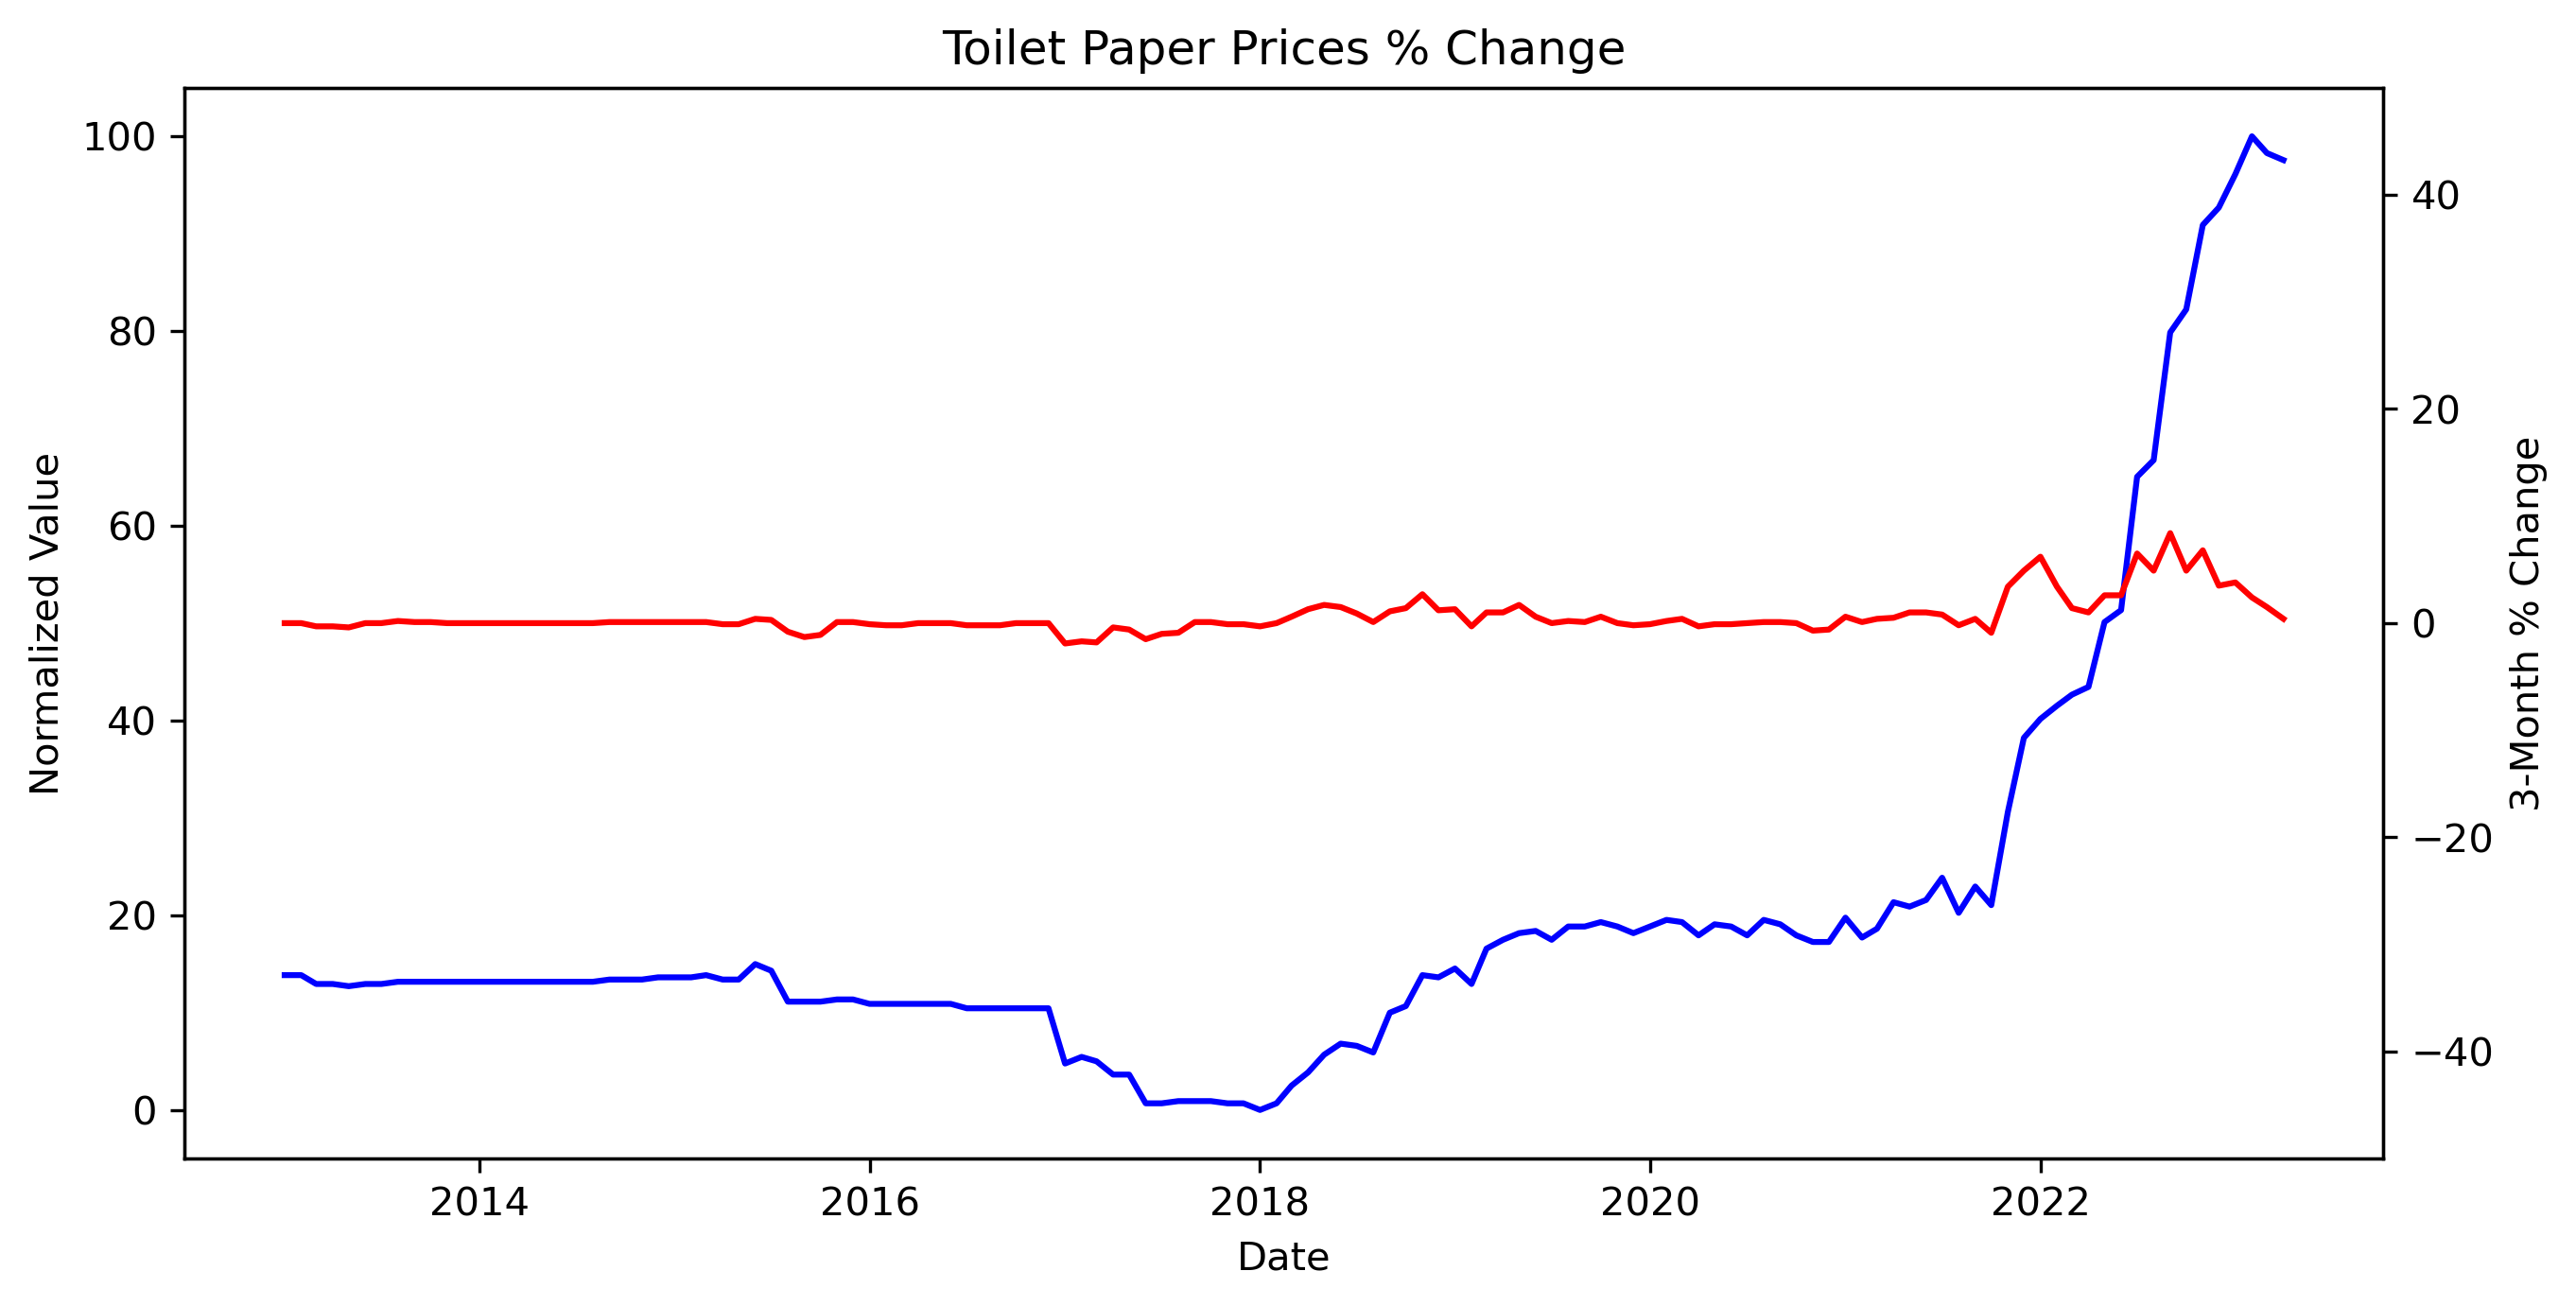

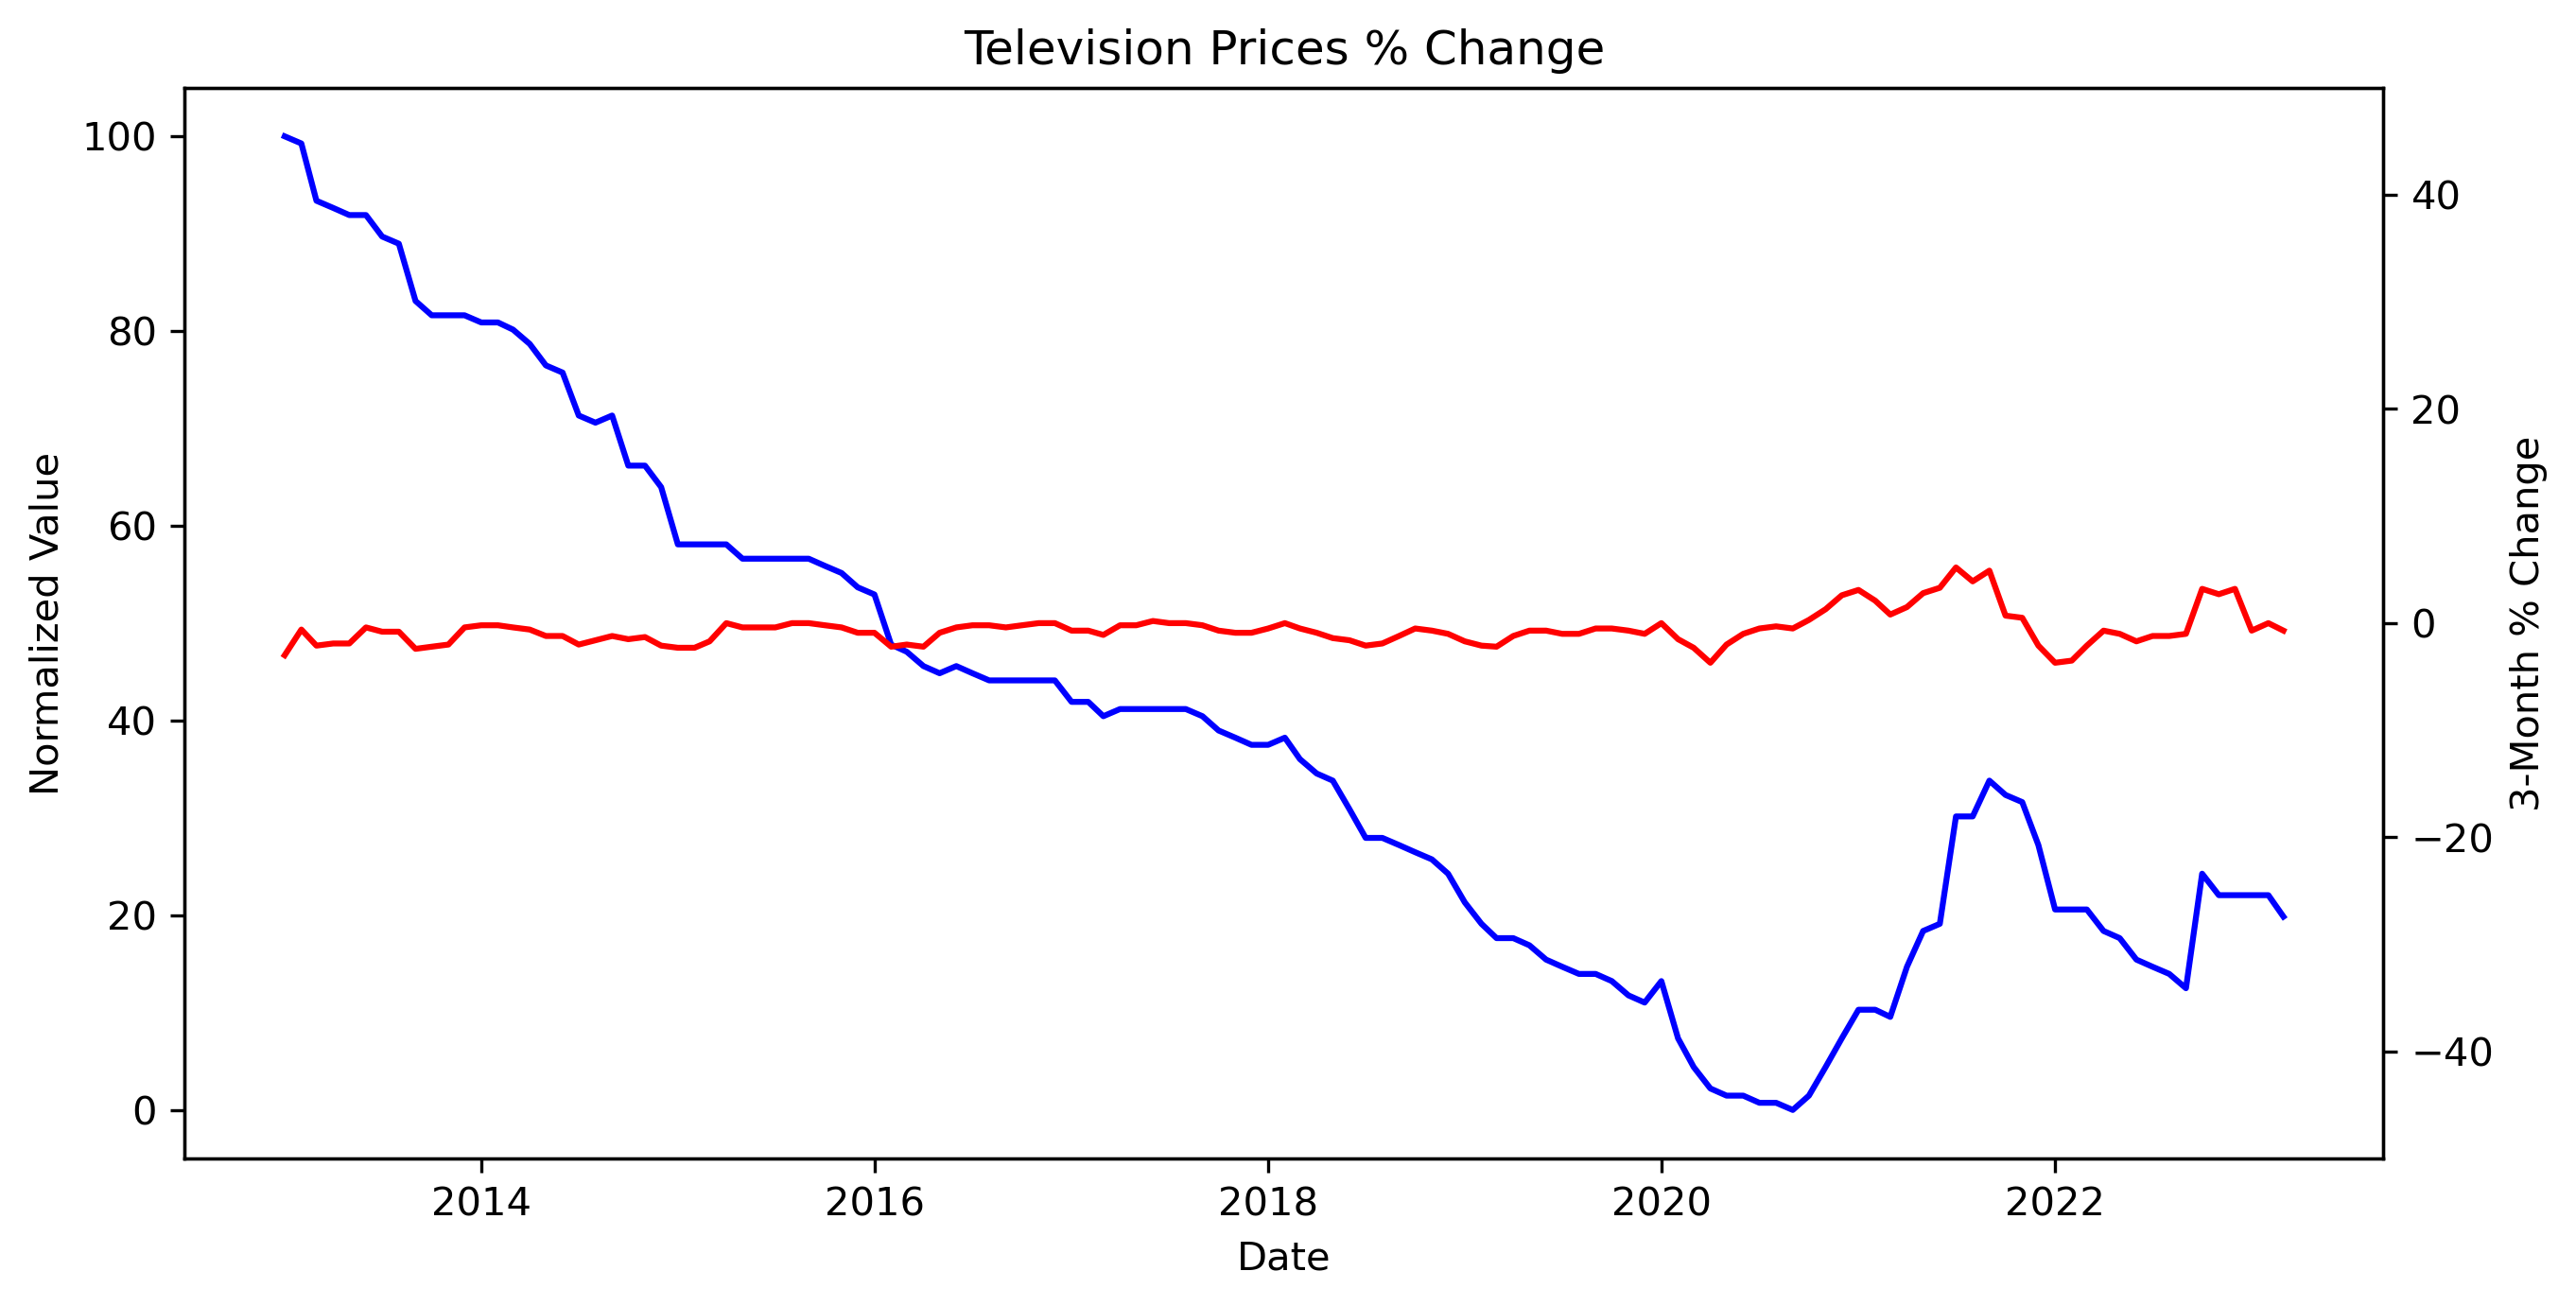

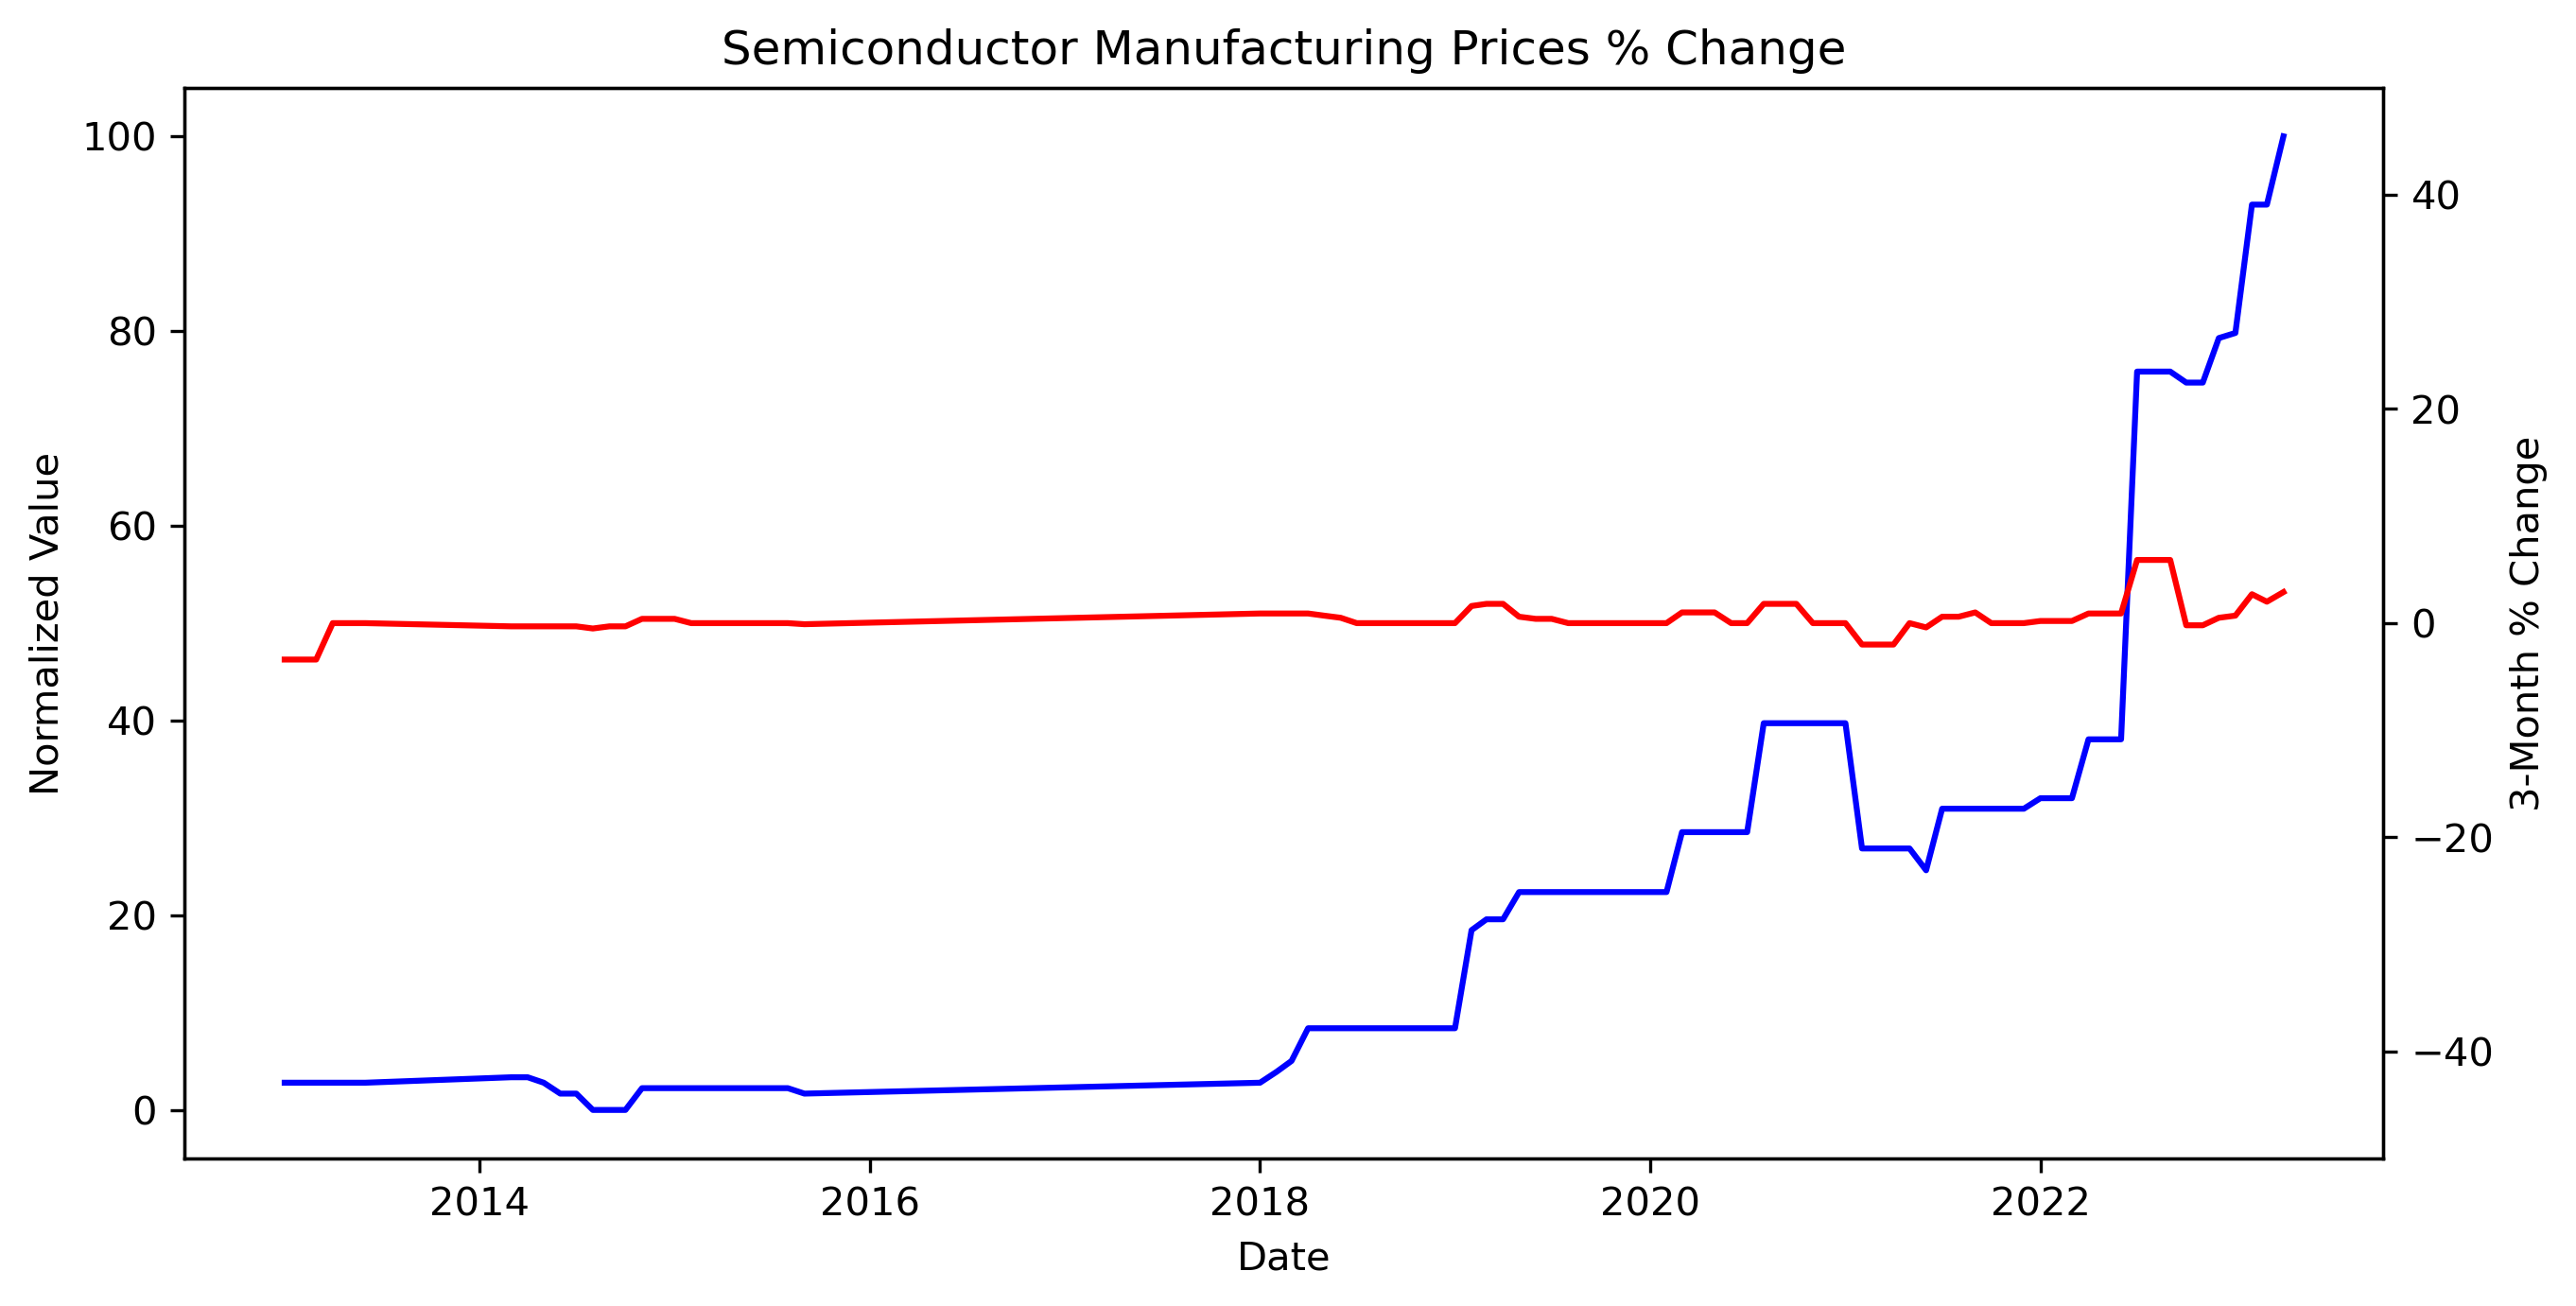

In [60]:
#Plotting all datasets
printing = 'y'
if printing == 'y':
    for dataset in Datalist:
        df = Datalist[dataset]['data']
        title = dataset
        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])

        # Create a figure and axis objects
        fig, ax = plt.subplots(figsize=(10, 5))

        # Plot the '3-Month % Change' column as a line plot
        ax.plot(df['Date'],df['NormValue'], linewidth=1.5, color='blue')

        ax.set
        # Add labels and a title
        ax.set_xlabel('Date')
        ax.set_ylabel('Normalized Value')
        ax.set_title(f'{title} Over Time')

        # Display the graph
        #plt.show()
        #fig.savefig(f'{FiguresPath}Individual/{title}_NormValues')


        #3 Month % Change plots 


        # Create a figure and axis objects
        ax2 = ax.twinx()

        # Plot the '3-Month % Change' column as a line plot
        ax2.plot(df['Date'],df['3-Month % Change'], linewidth=1.5, color='red')
        plt.ylim((-50,50))
        ax.set
        # Add labels and a title
        ax2.set_ylabel('3-Month % Change')
        ax.set_title(f'{title} % Change')

        # Display the graph
        plt.show()
        fig.savefig(f'{FiguresPath}Individual/{title}_ValueOverTime',transparent=True)


## For presentation and analysis, plots are grouped and figures are made.

In [78]:

CovidGroup = ['Automobile Prices','Food Prices','Electricity Prices','Gasoline Prices','Toilet Paper Prices']

RussiaUkrainGroup = ['Semiconductor Manufacturing Prices','Water Freight Prices','Food Prices']

EverGivenGroup = ['Banana Prices','Air Freight Prices','Water Freight Prices',
                 'Land Freight Prices','Gasoline Prices']

OtherGroup = ['Egg Prices','Shelter Prices','Television Prices']

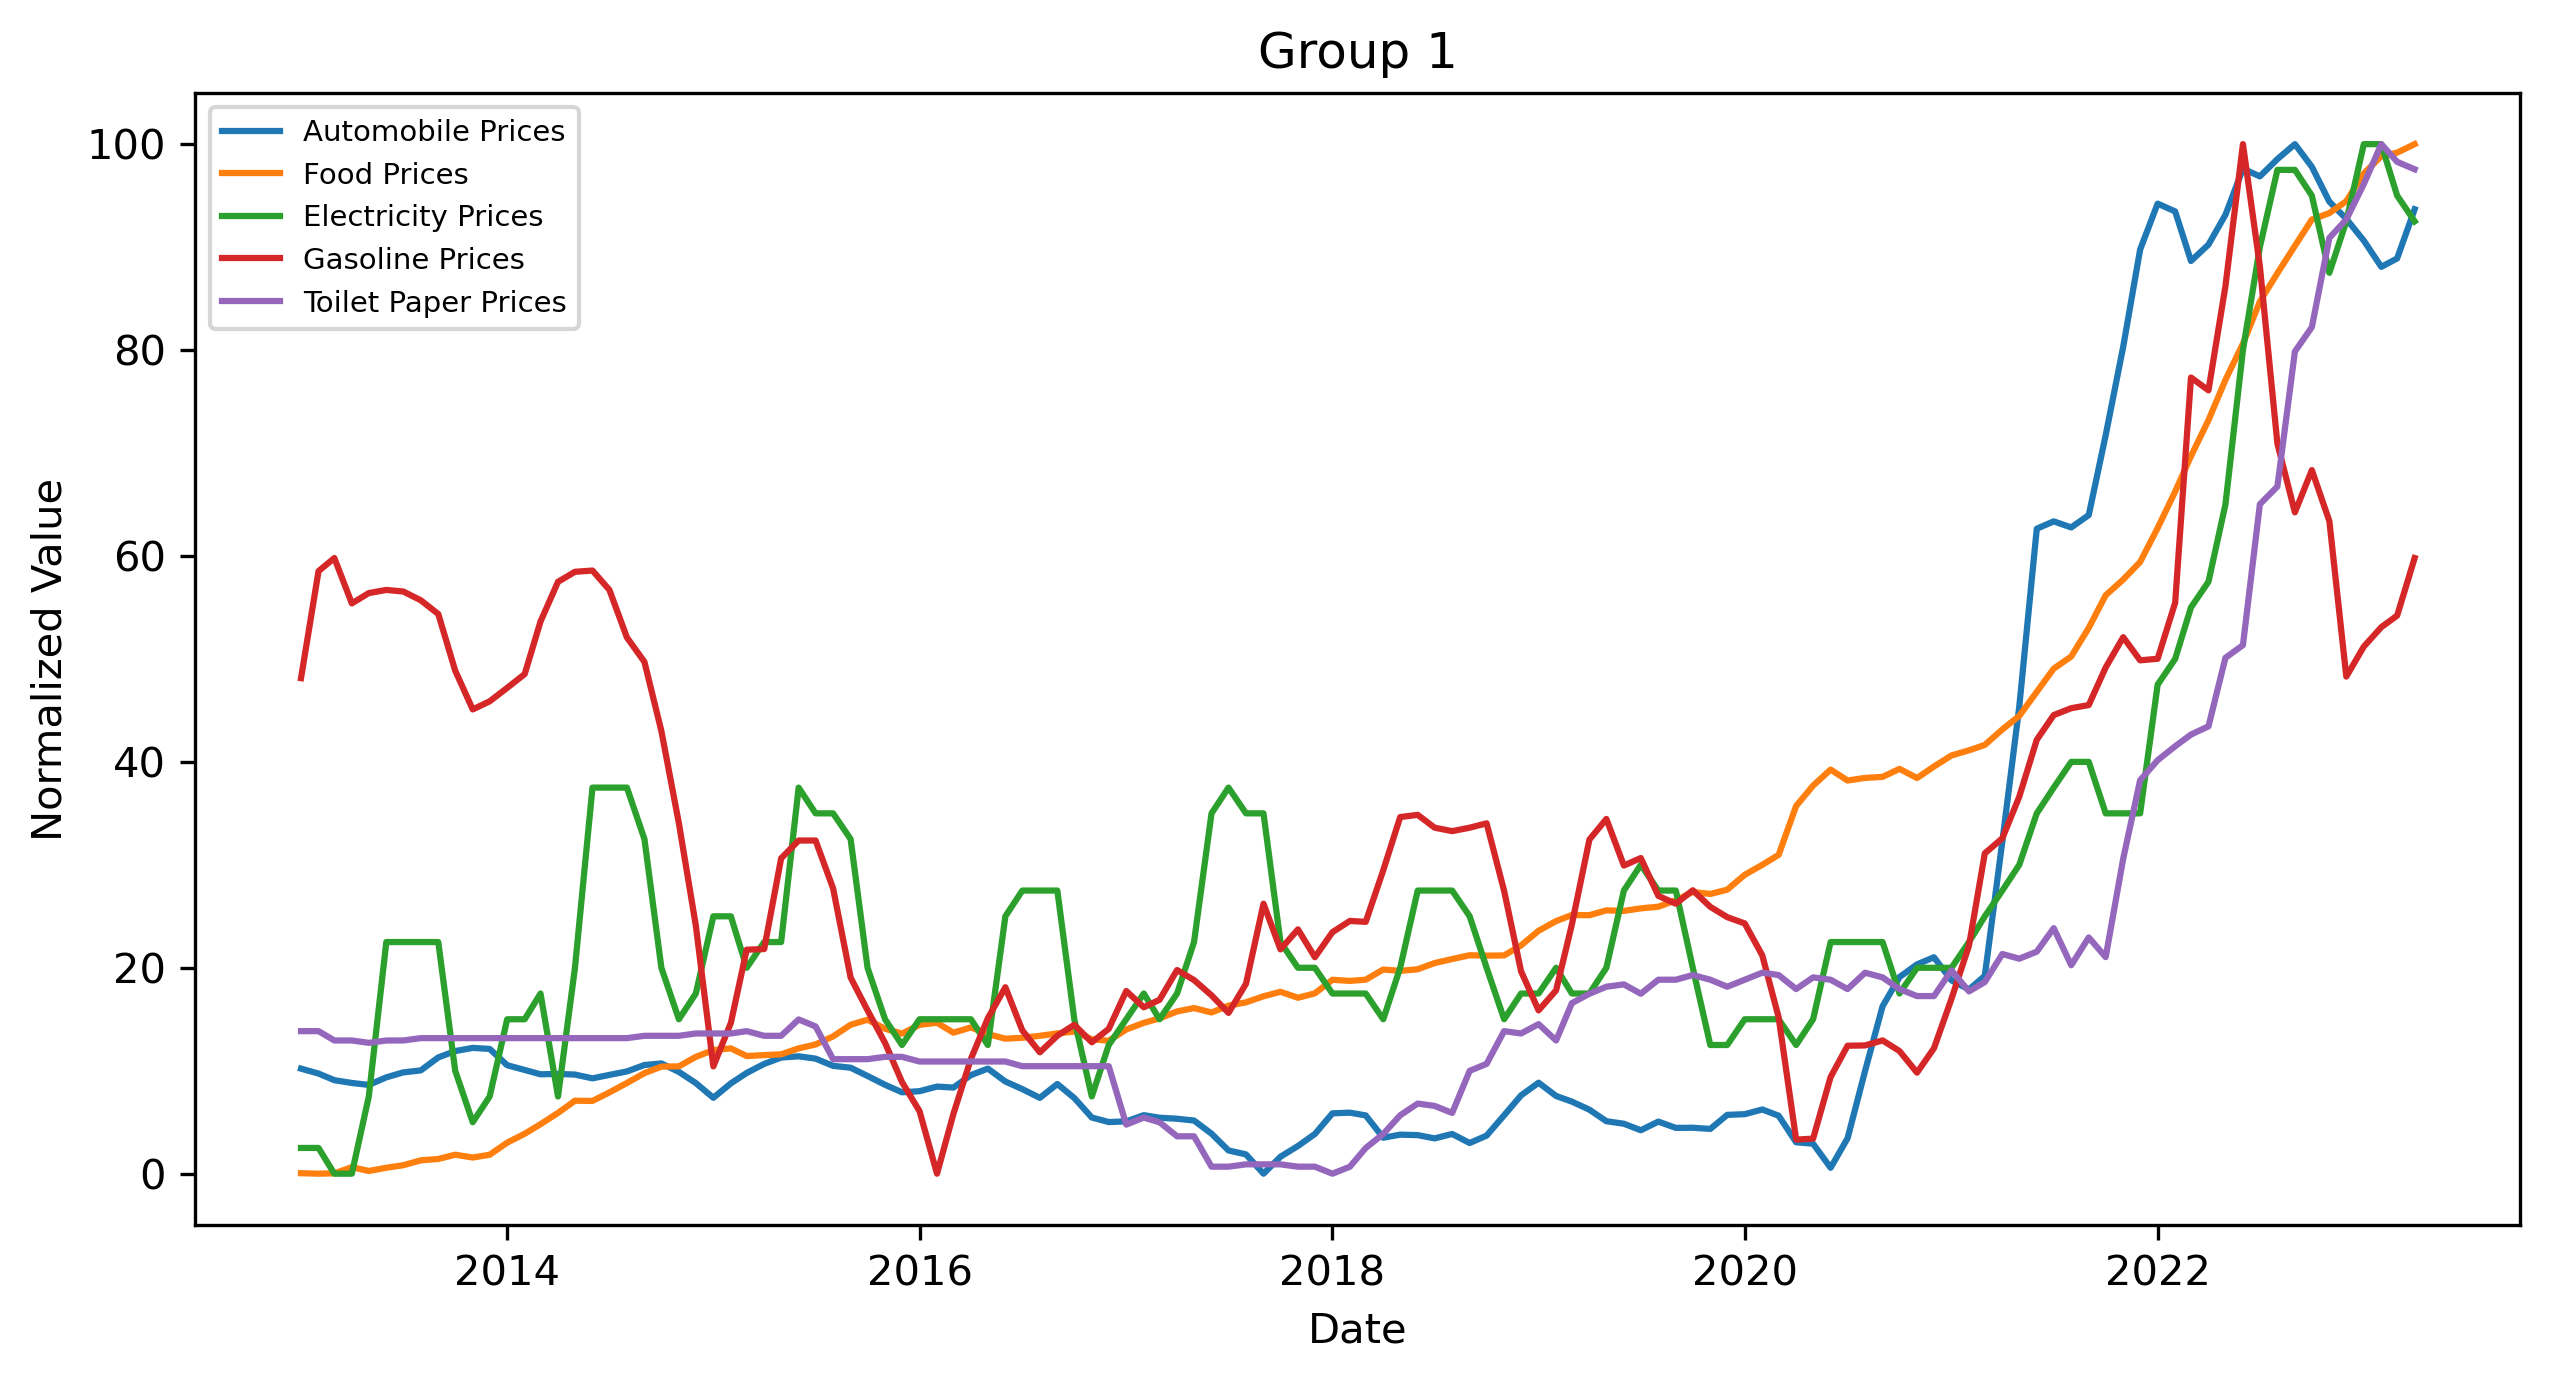

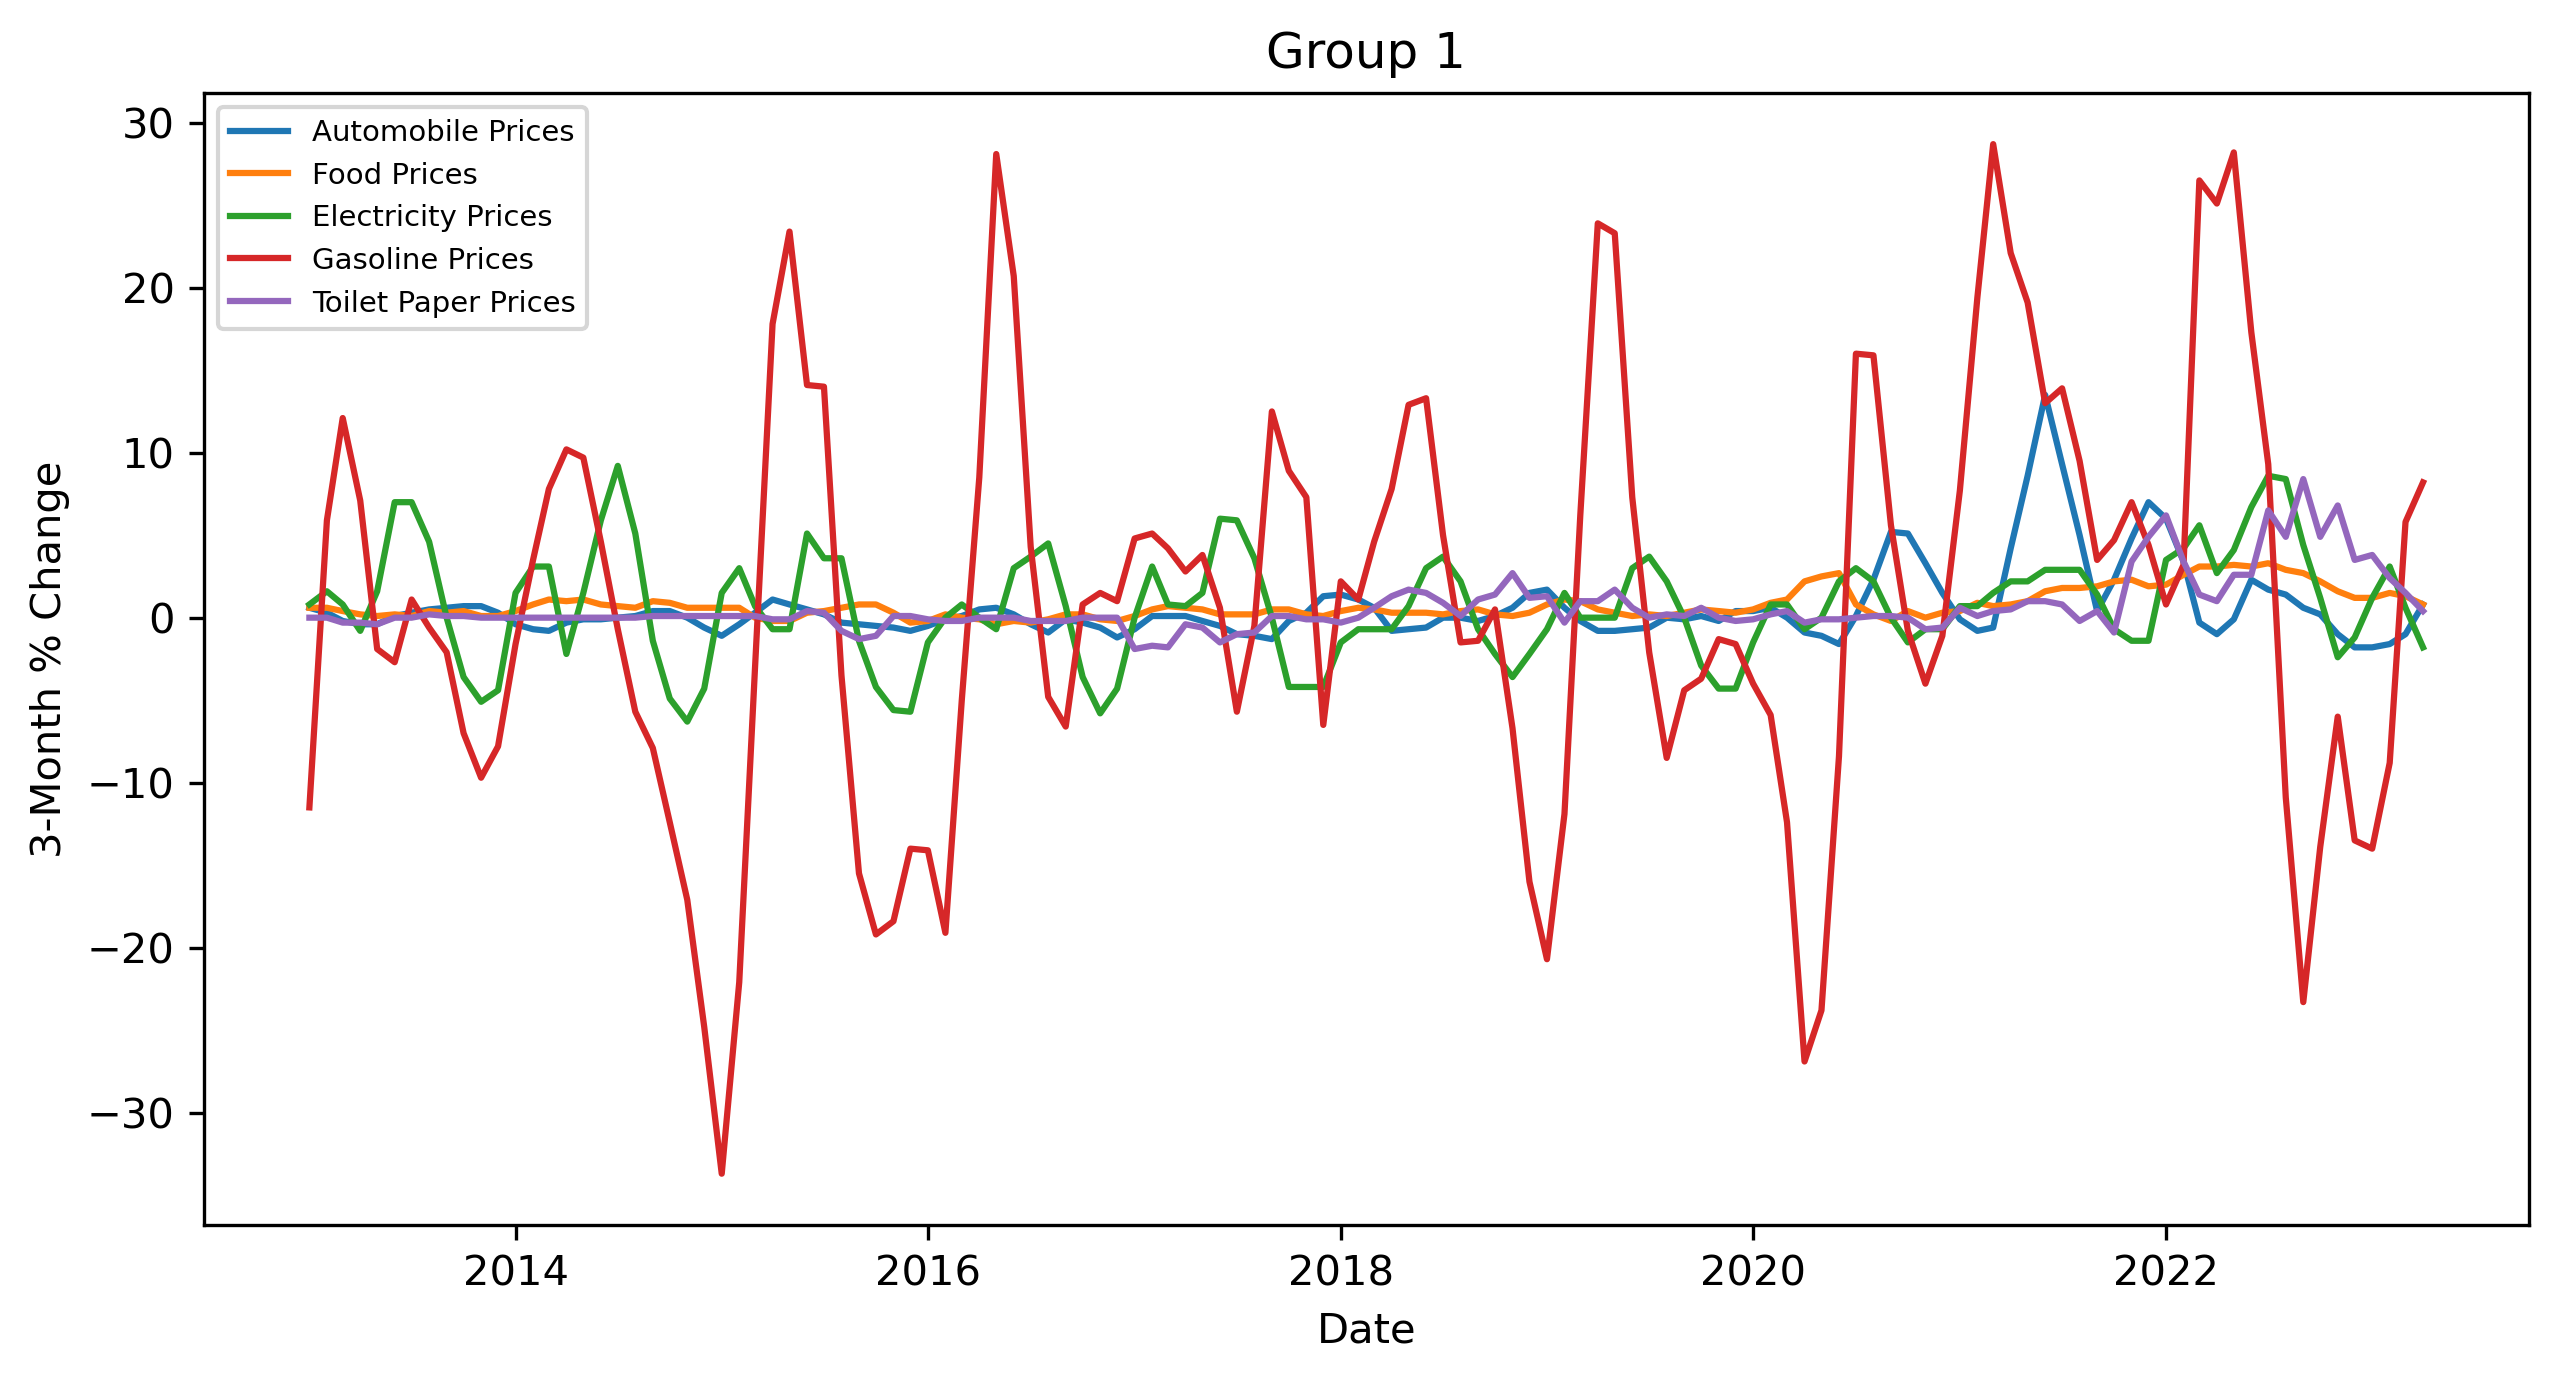

In [80]:
saving = 'y'
transparency = True
#Plotting the Covid Group Values on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in CovidGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['NormValue'], linewidth=1.5, label=title)

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title(f'Group 1')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_1_NormValues_{transparency}',transparent=transparency)


#Plotting the Covid Group 3 month % change on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in CovidGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['3-Month % Change'], linewidth=1.5, label=title)



# Add labels and a title
plt.xlabel('Date')
plt.ylabel('3-Month % Change')
plt.title(f'Group 1')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_1_3MoPctChange_{transparency}',transparent=transparency)

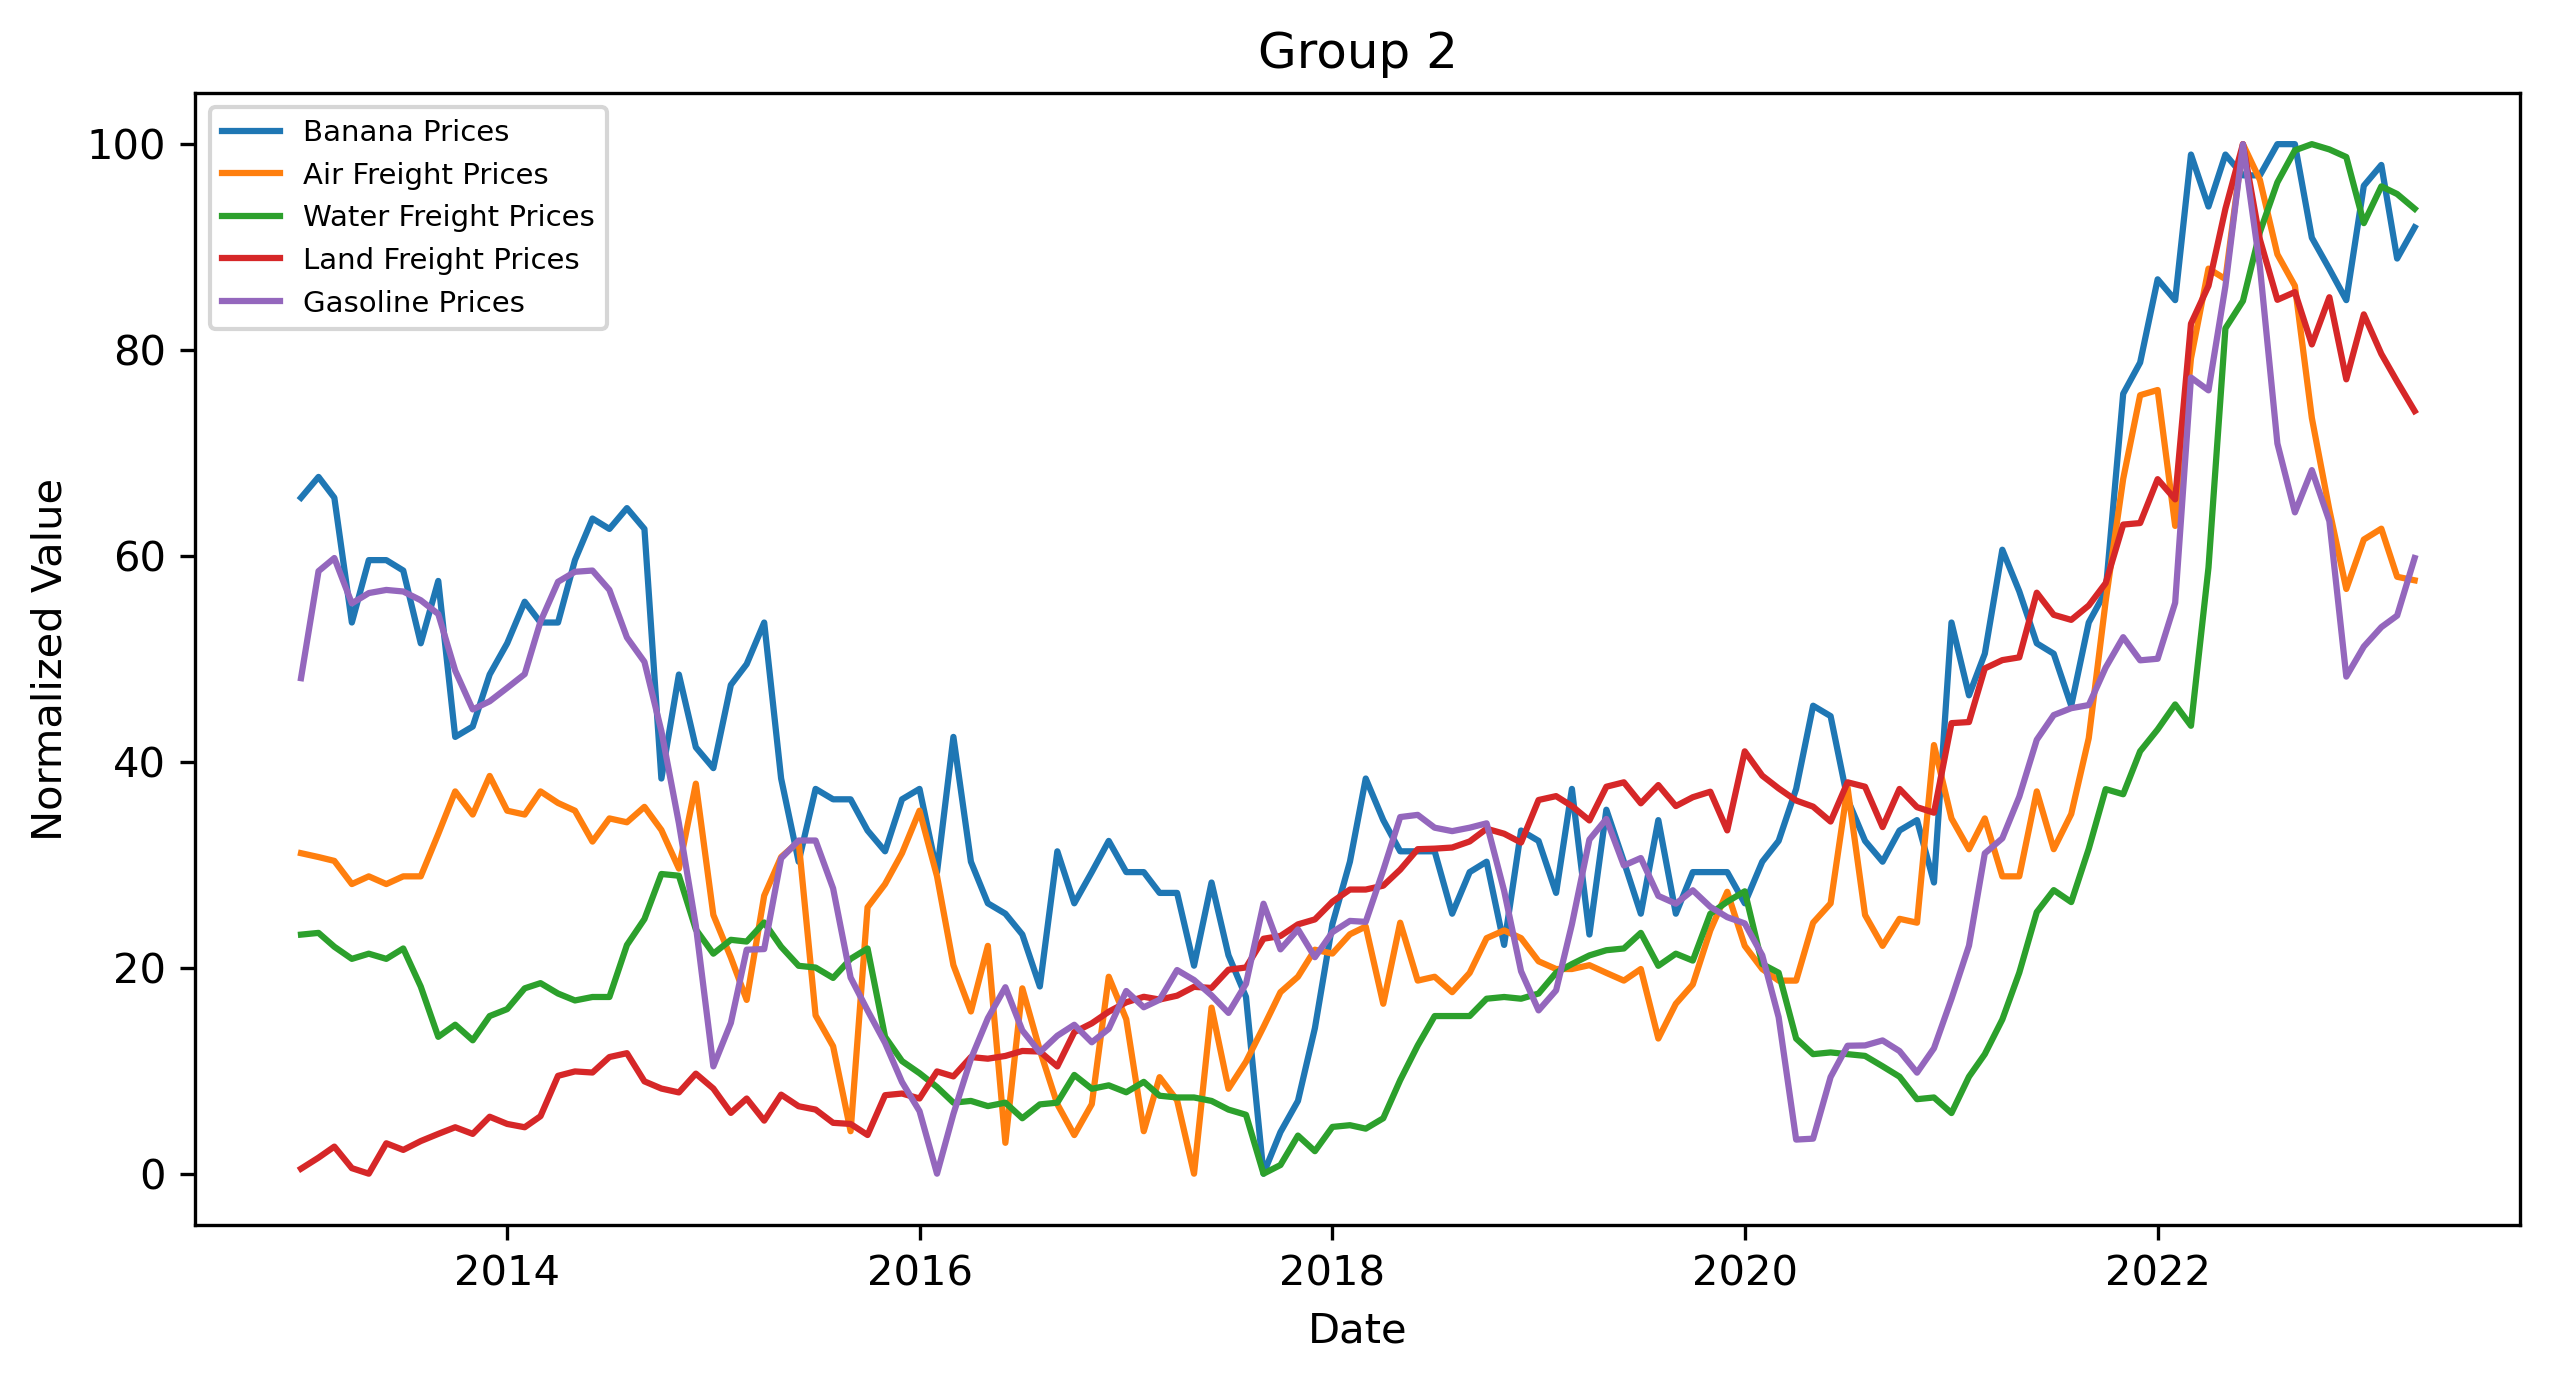

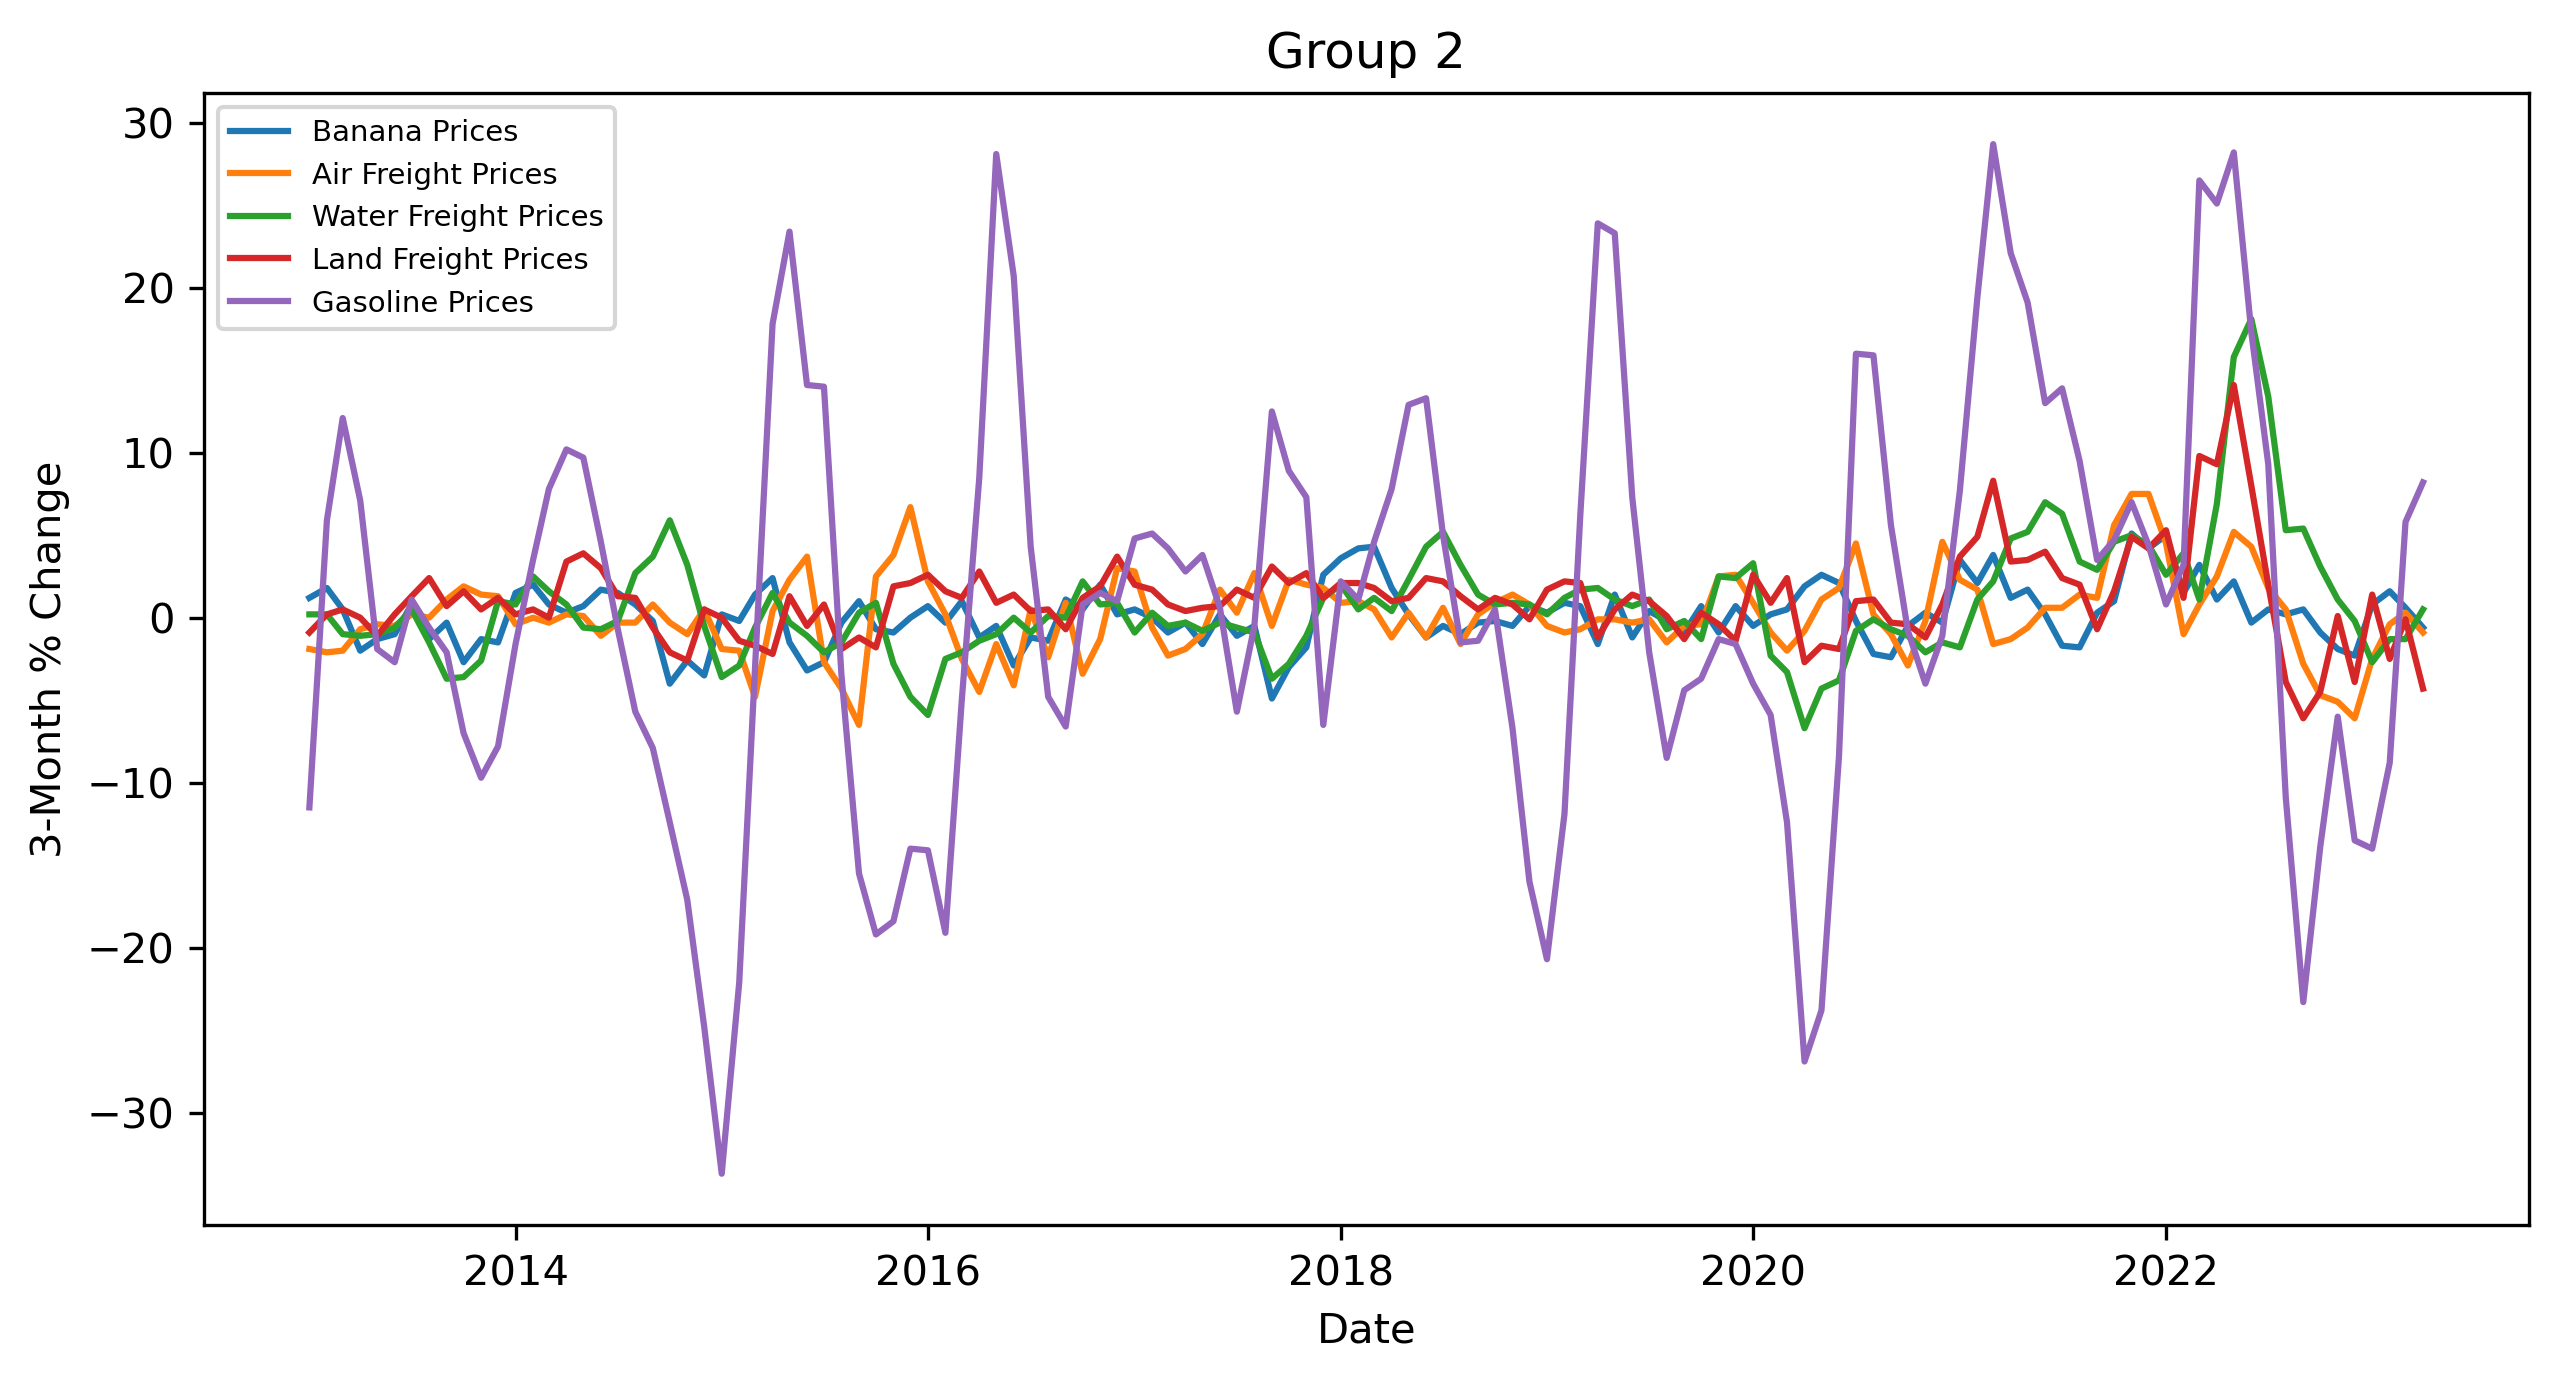

In [81]:
#Plotting the Covid Group Values on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in EverGivenGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['NormValue'], linewidth=1.5, label=title)

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title(f'Group 2')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_2_NormValues_{transparency}',transparent=transparency)


#Plotting the Covid Group 3 month % change on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in EverGivenGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['3-Month % Change'], linewidth=1.5, label=title)



# Add labels and a title
plt.xlabel('Date')
plt.ylabel('3-Month % Change')
plt.title(f'Group 2')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_2_3MoPctChange_{transparency}',transparent=transparency)

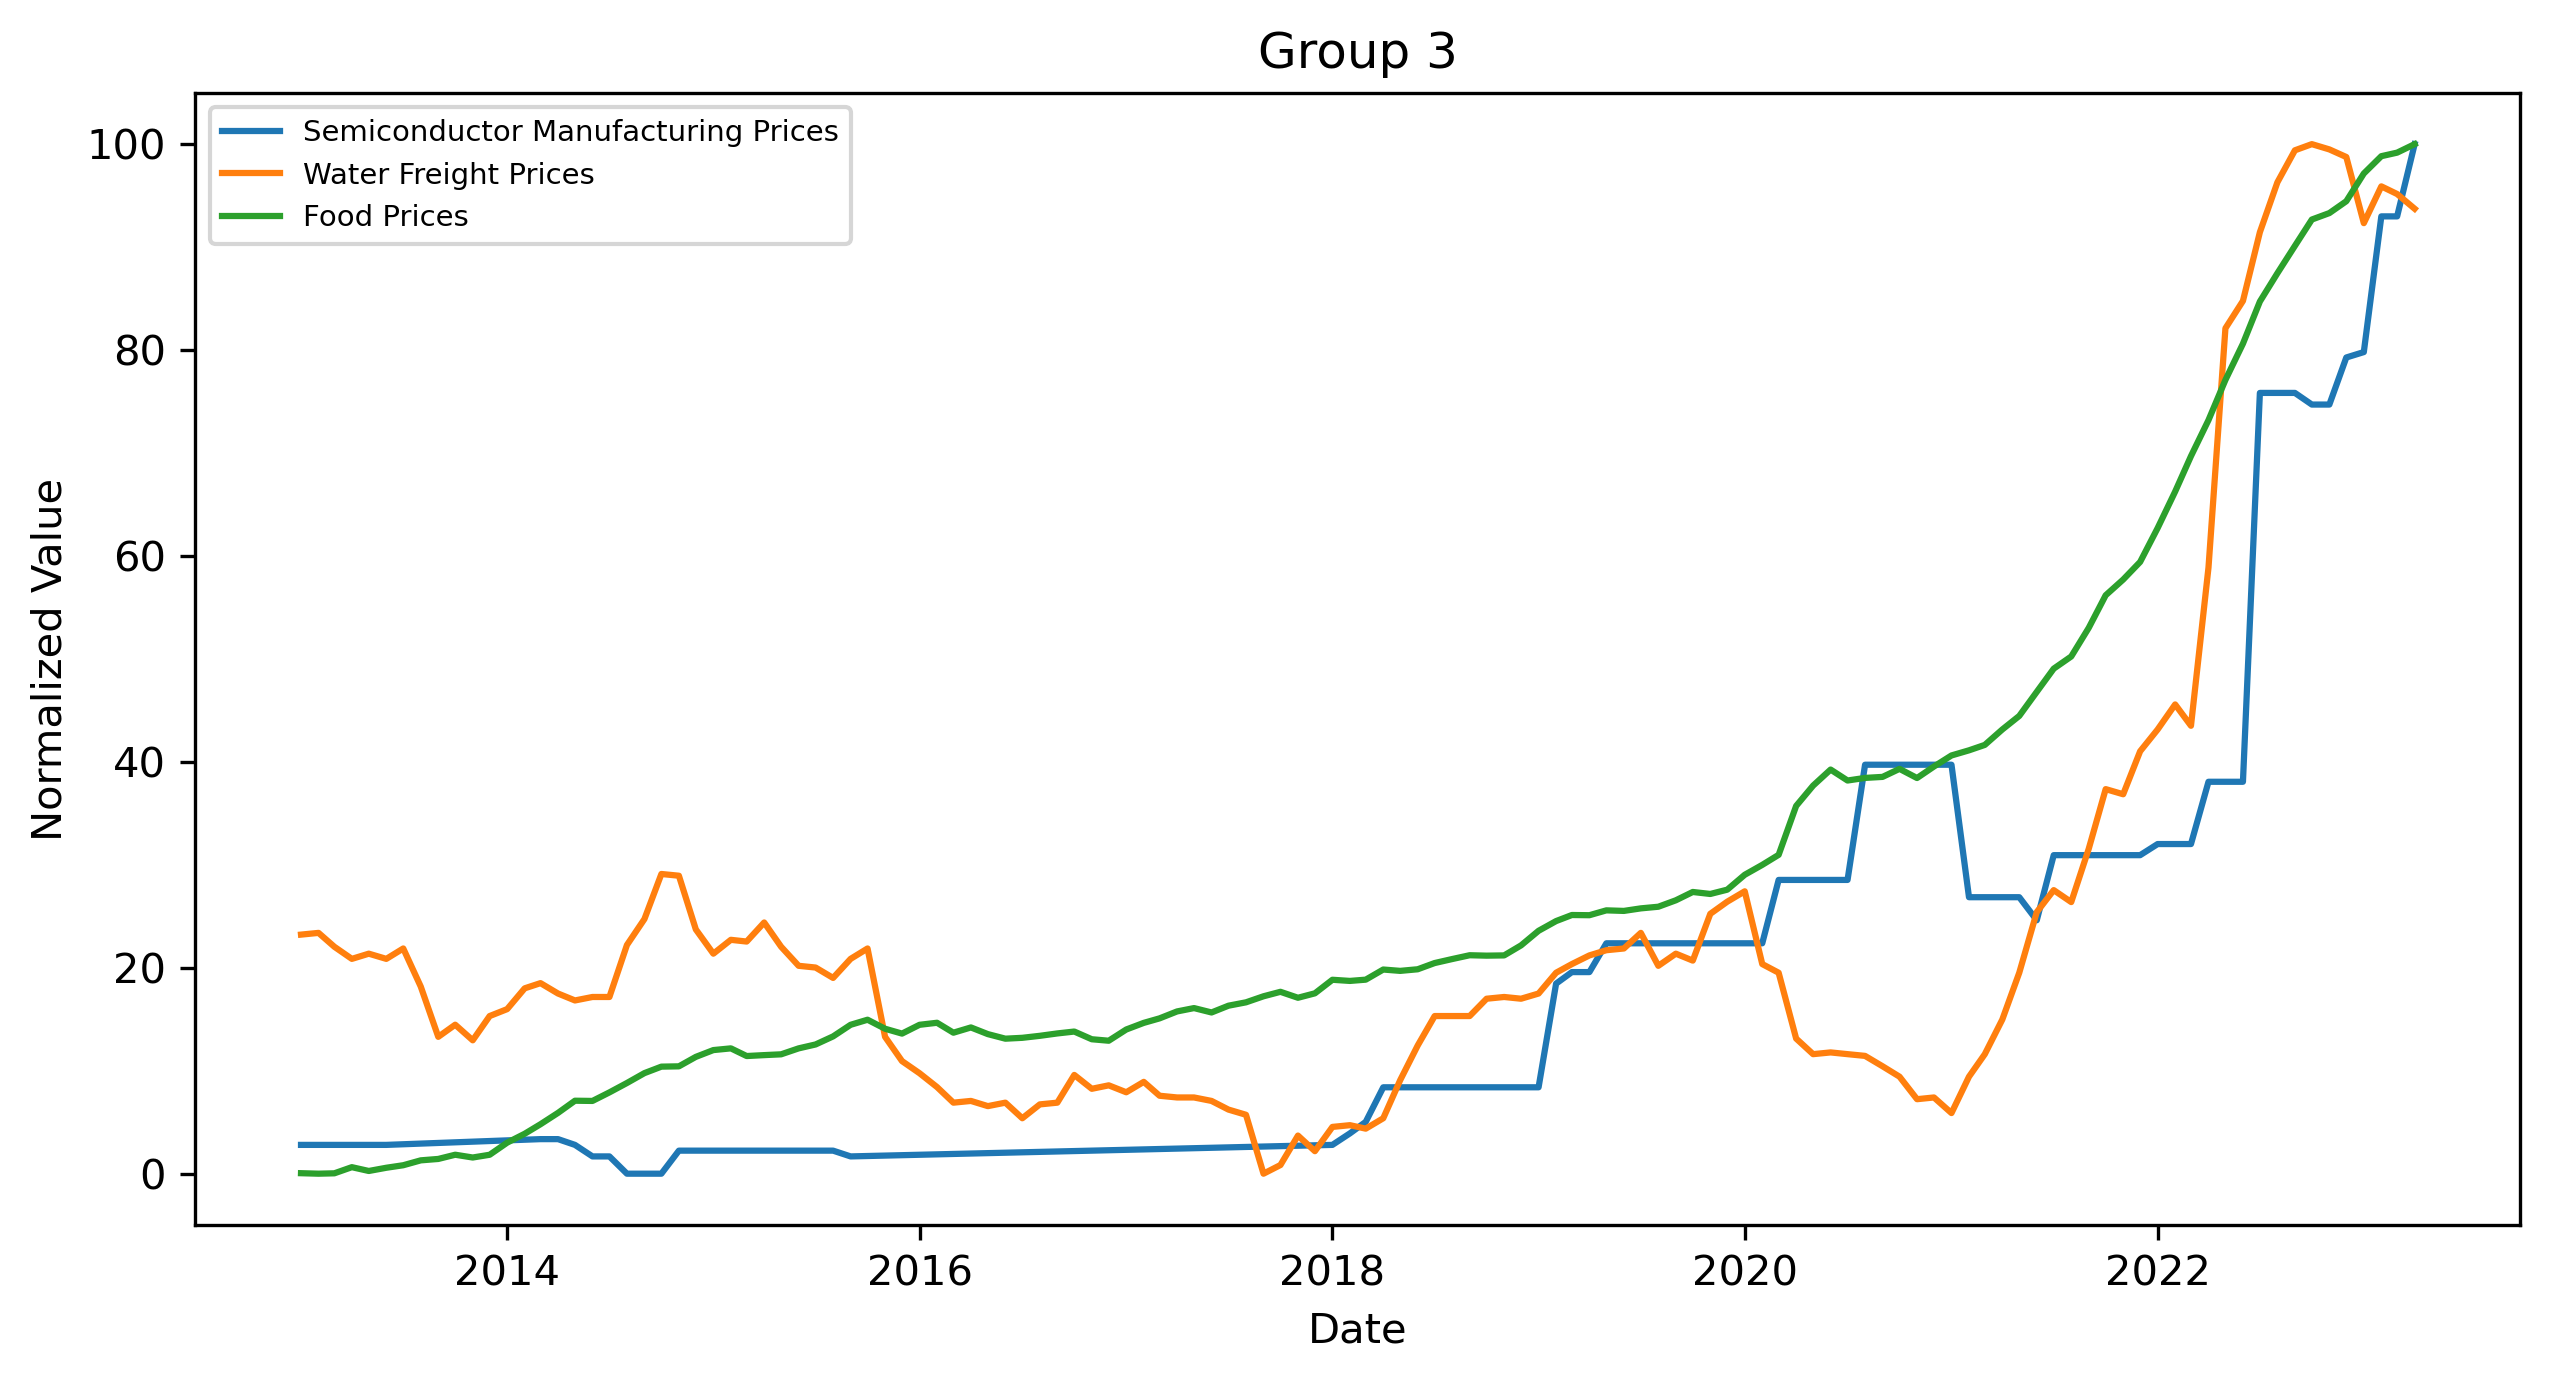

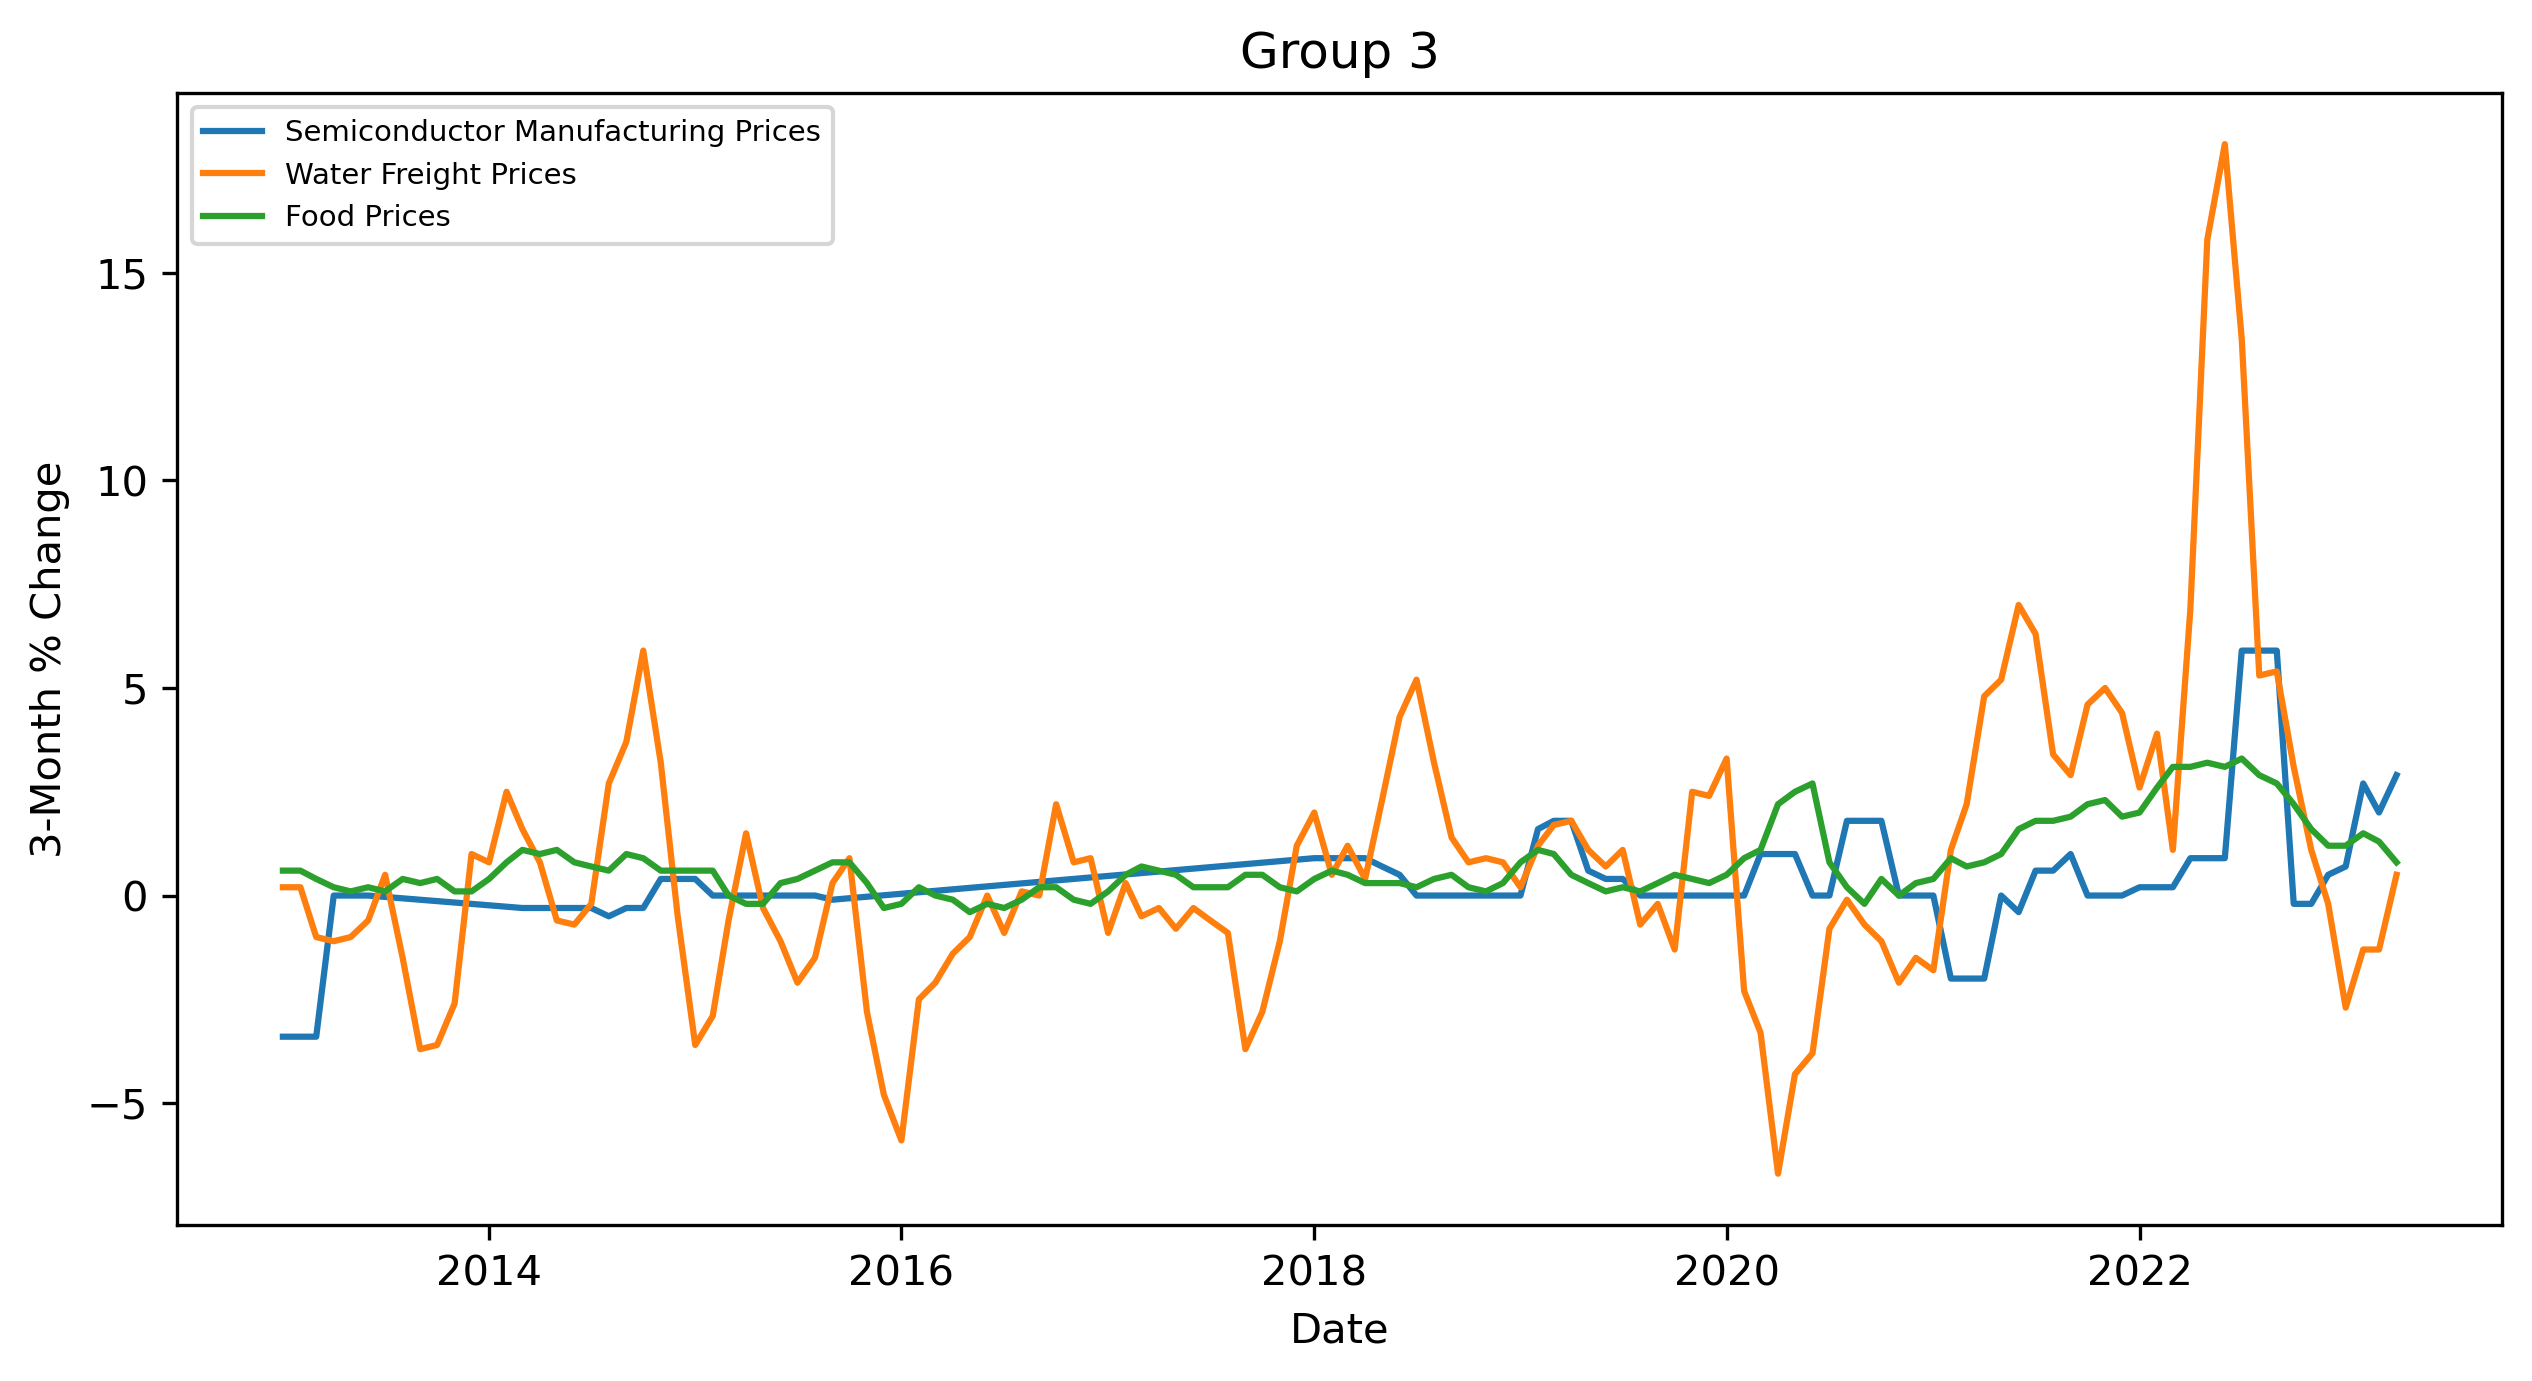

In [82]:
#Plotting the Covid Group Values on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in RussiaUkrainGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['NormValue'], linewidth=1.5, label=title)

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title(f'Group 3')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_3_NormValues_{transparency}',transparent=transparency)


#Plotting the Covid Group 3 month % change on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in RussiaUkrainGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['3-Month % Change'], linewidth=1.5, label=title)



# Add labels and a title
plt.xlabel('Date')
plt.ylabel('3-Month % Change')
plt.title(f'Group 3')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_3_3MoPctChange_{transparency}',transparent=transparency)

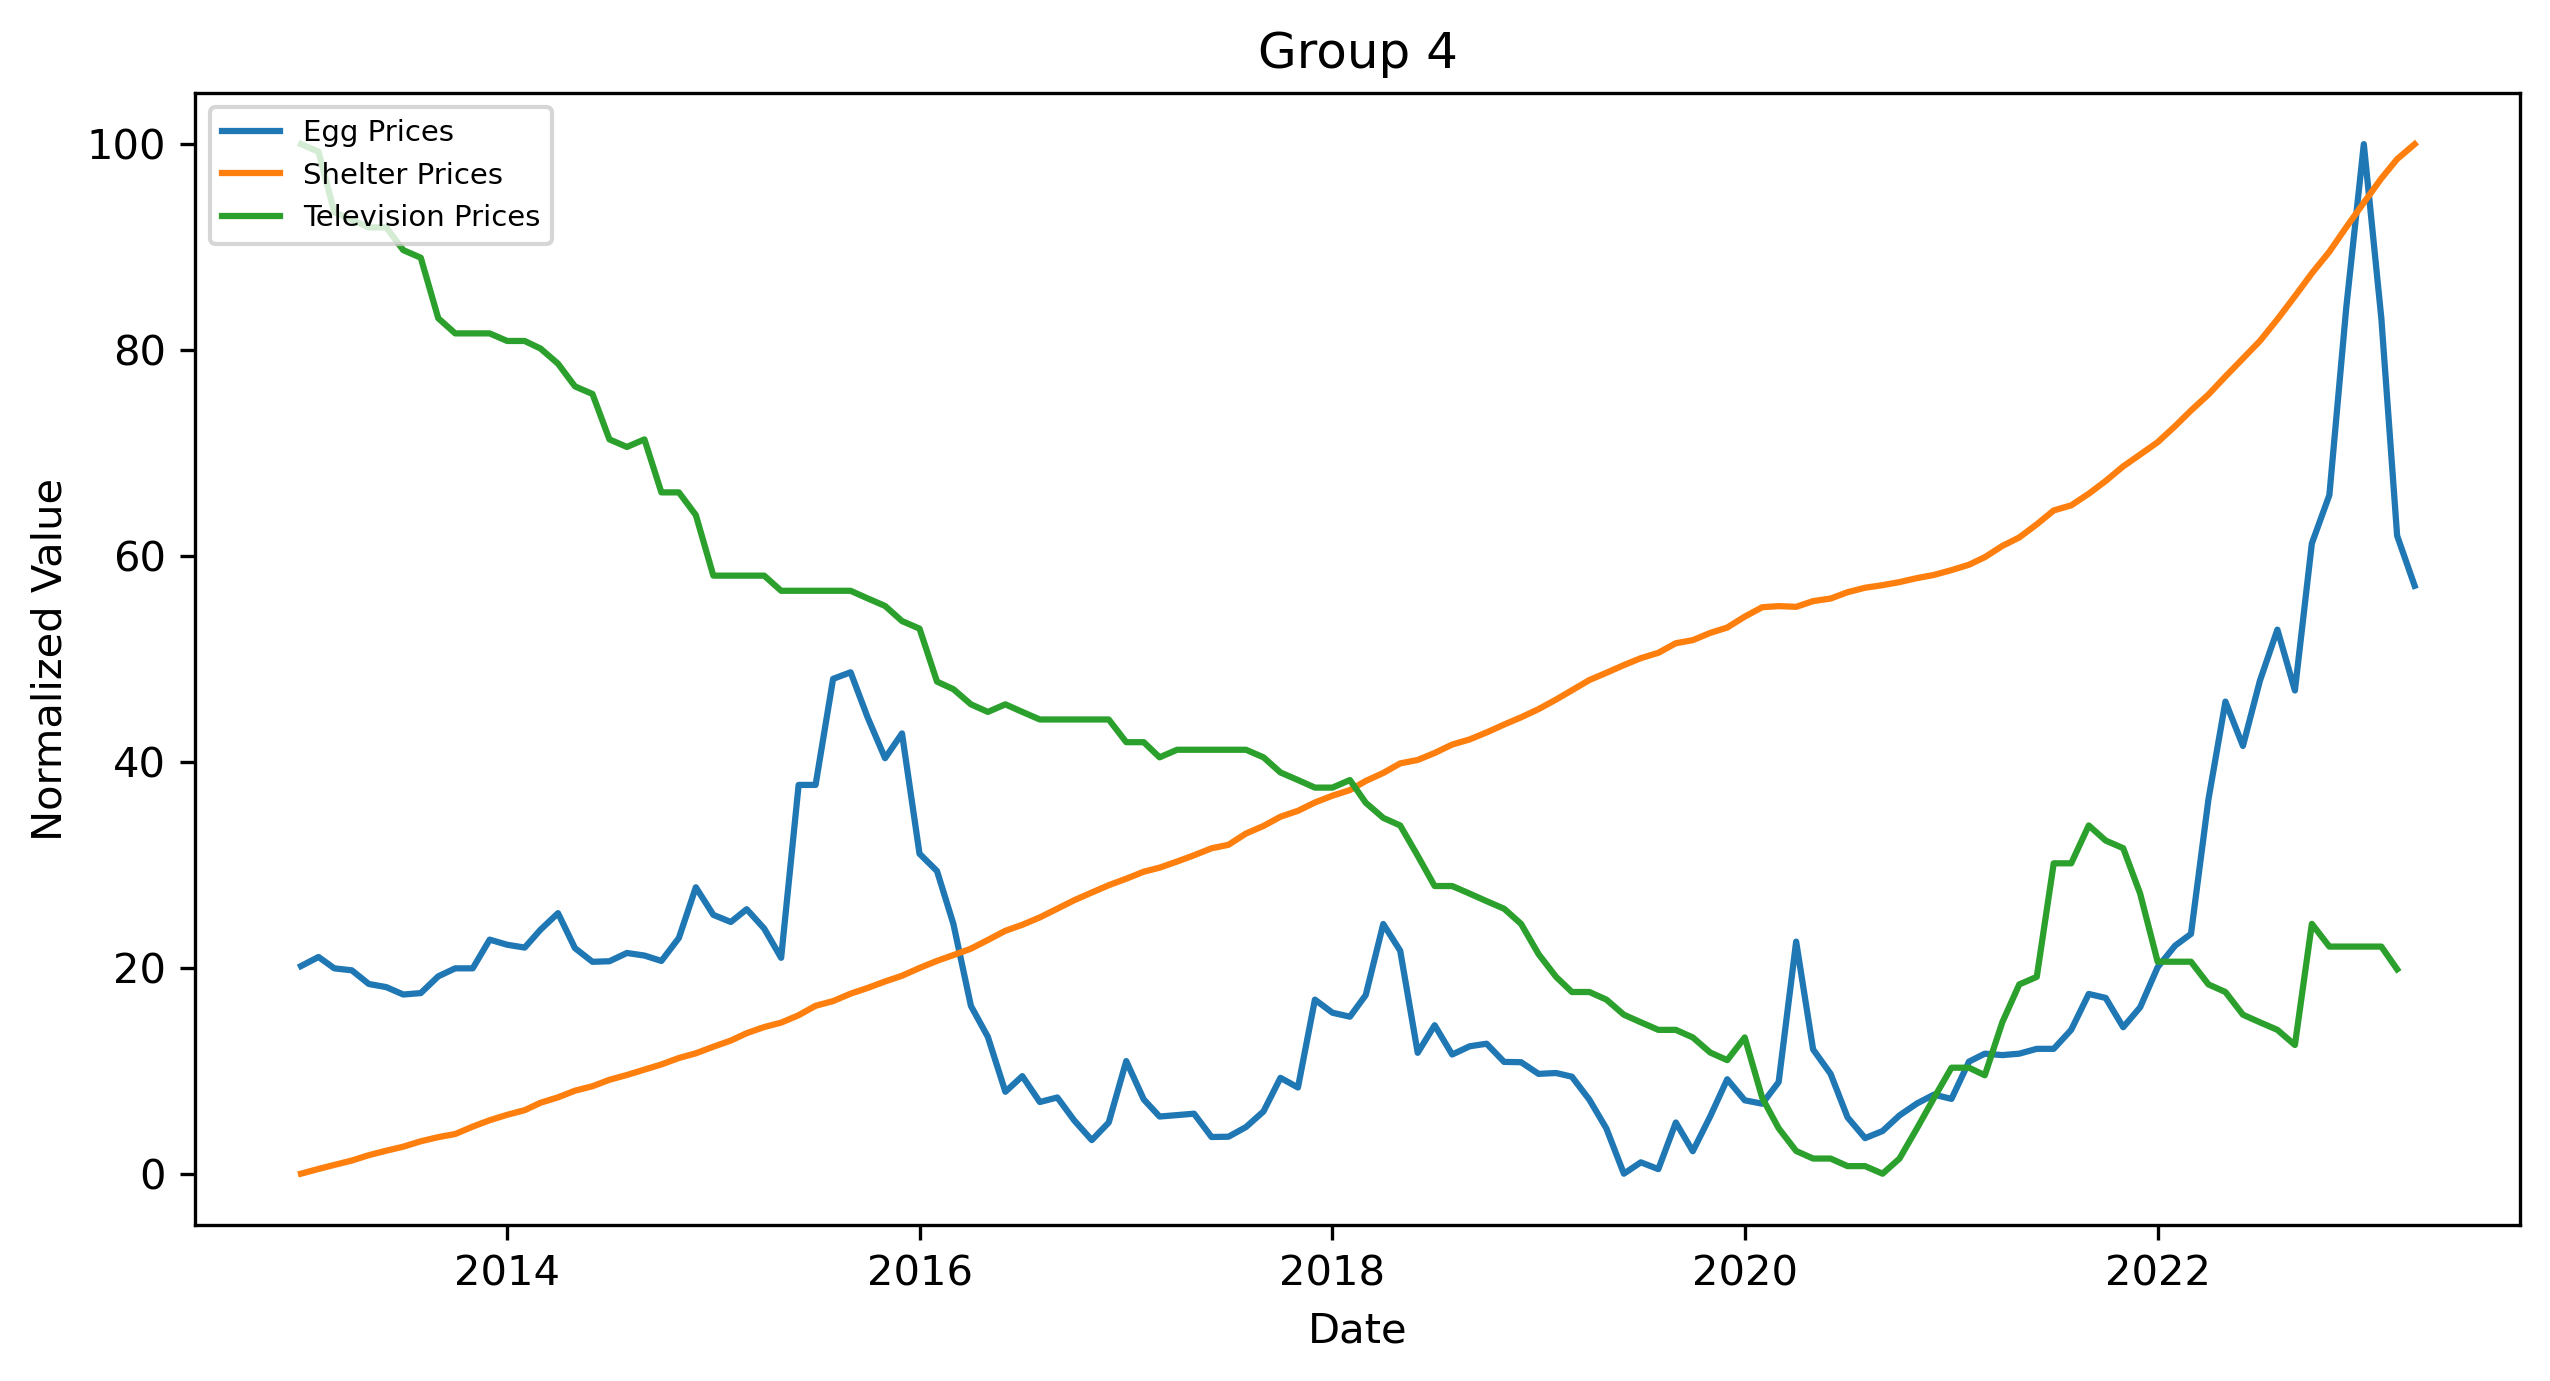

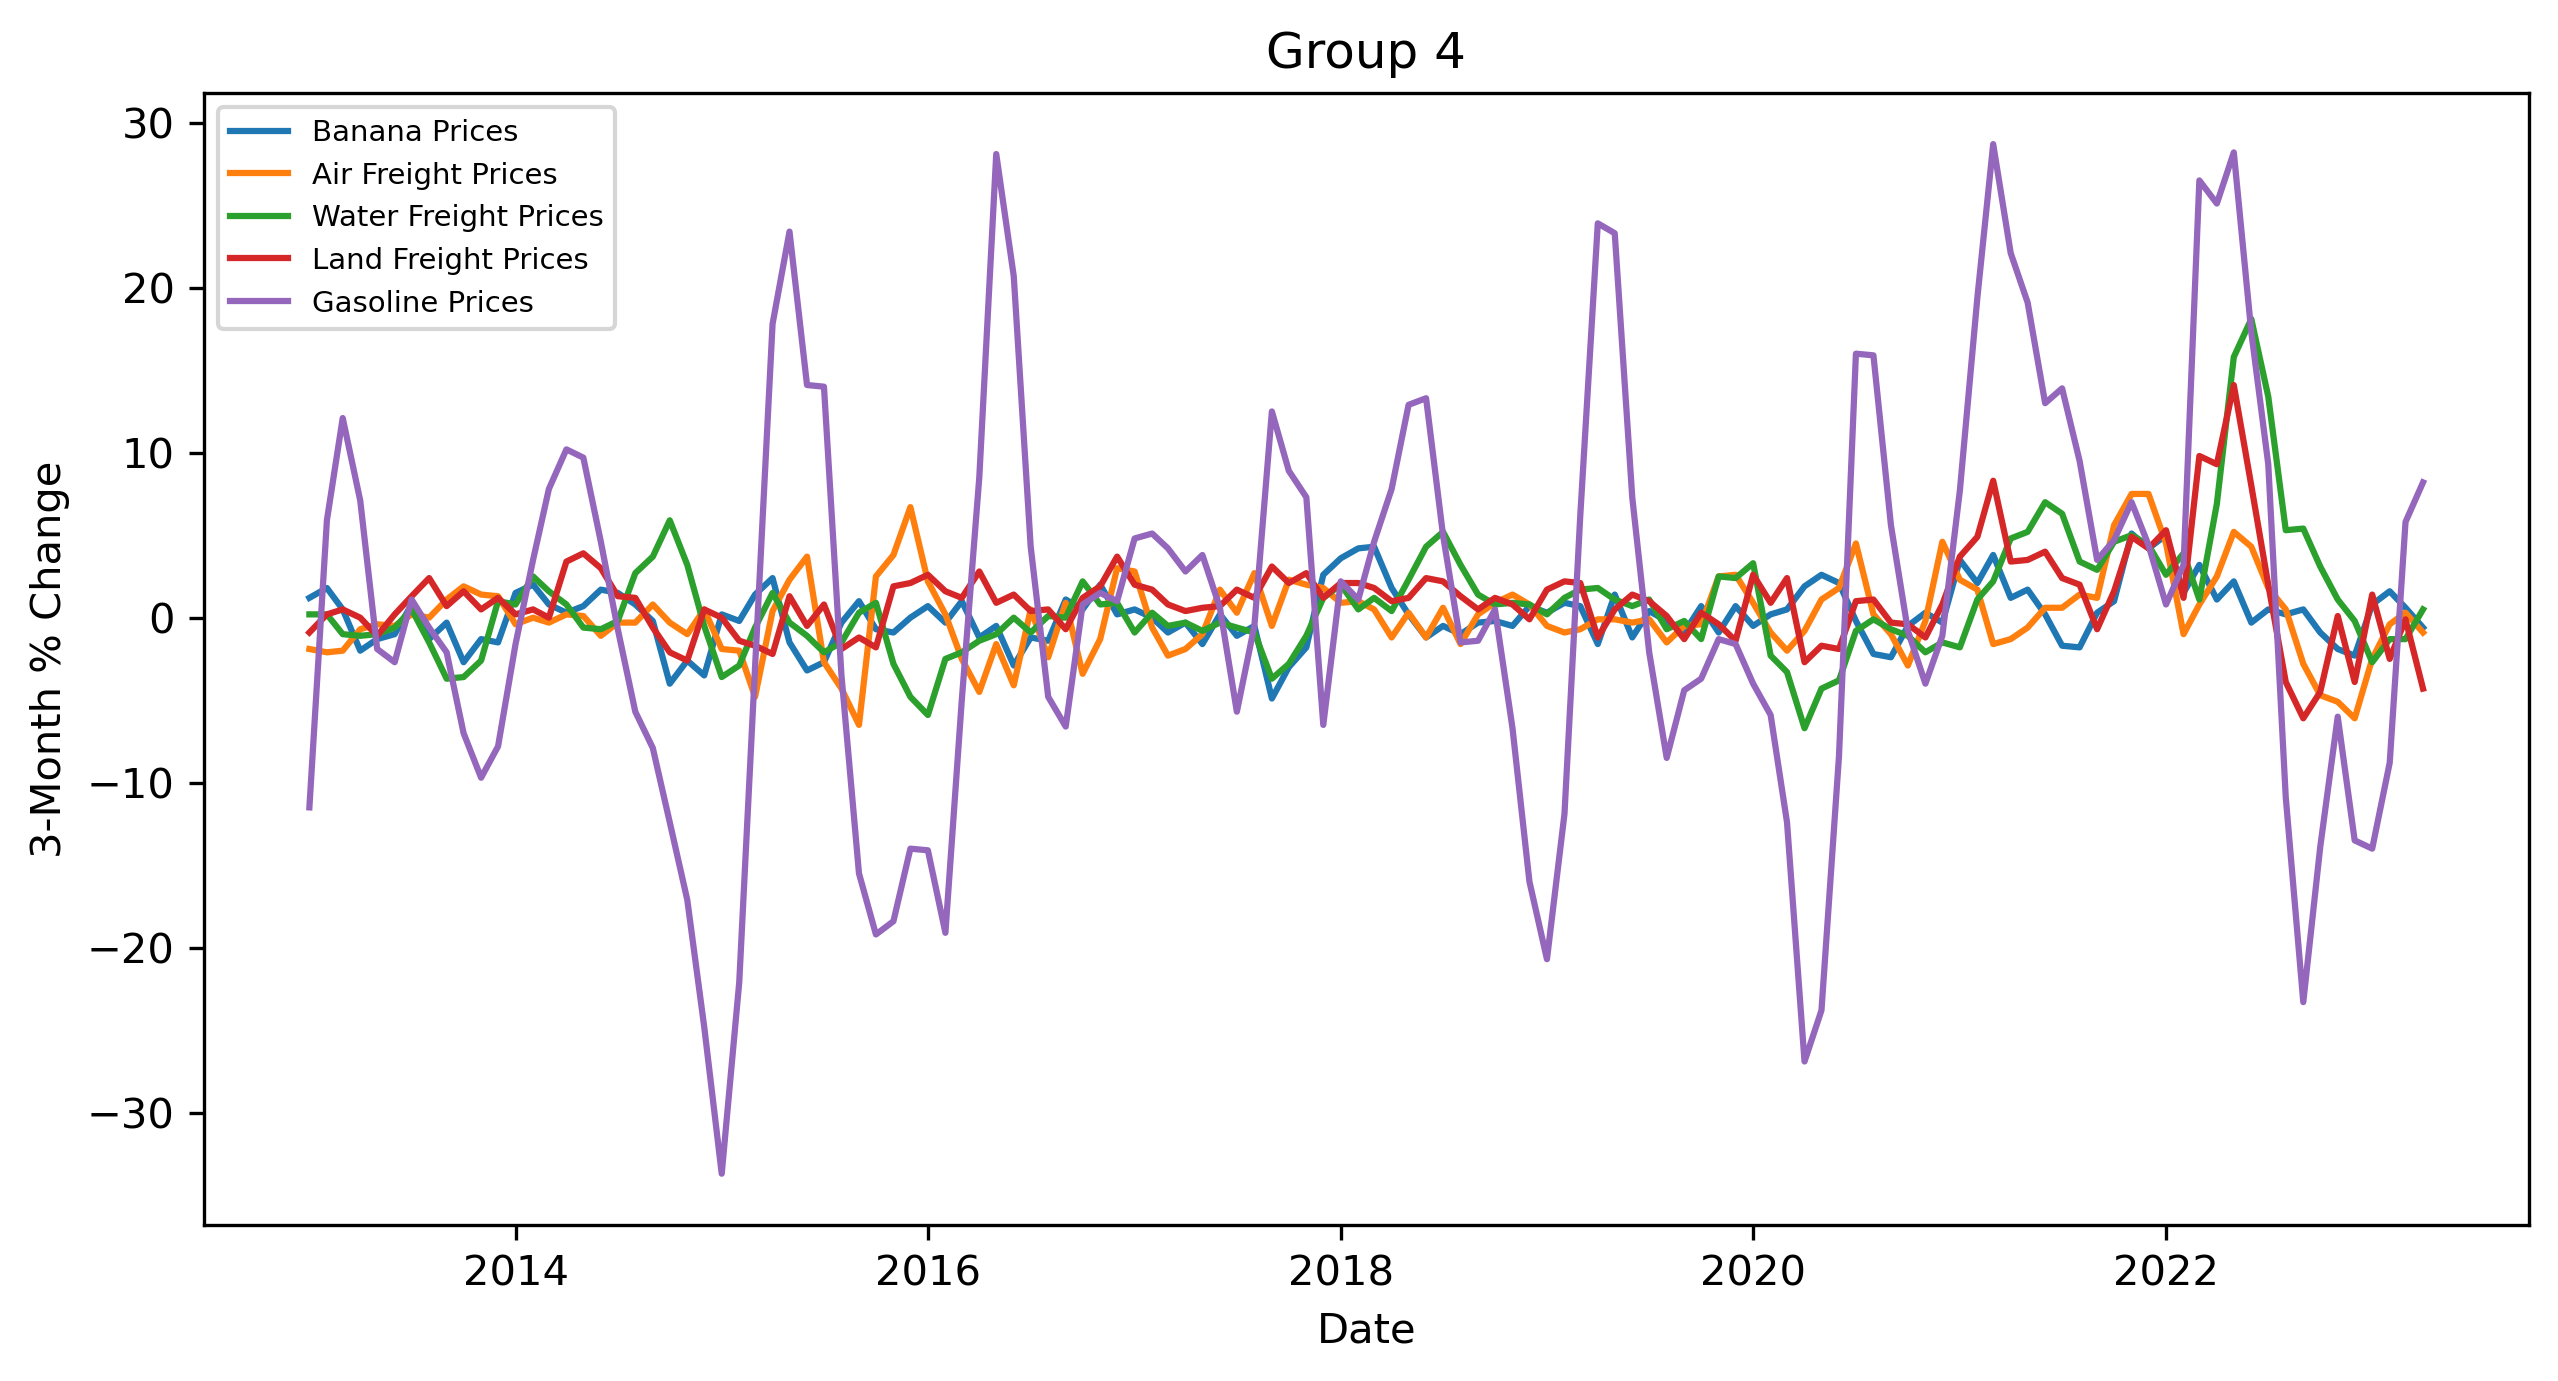

In [83]:
#Plotting the Covid Group Values on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in OtherGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['NormValue'], linewidth=1.5, label=title)

# Add labels and a title
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title(f'Group 4')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_4_NormValues_{transparency}',transparent=transparency)


#Plotting the Covid Group 3 month % change on one axis
fig, ax = plt.subplots(figsize=(10, 5))

for dataset in CruedOilGroup:
    df = Datalist[dataset]['data']
    title = dataset
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Plot the '3-Month % Change' column as a line plot
    plt.plot(df['Date'],df['3-Month % Change'], linewidth=1.5, label=title)



# Add labels and a title
plt.xlabel('Date')
plt.ylabel('3-Month % Change')
plt.title(f'Group 4')
plt.legend(loc='upper left',fontsize = '7')

# Display the graph
plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}Group_4_3MoPctChange_{transparency}',transparent=transparency)

## From the graphs above we can draw the following conclusions. 

# Volatility

Air Freight Prices
Water Freight Prices
Land Freight Prices
Electricity Prices
Gasoline Prices
Automobile Prices
Food Prices
Banana Prices
Egg Prices
Shelter Prices
Toilet Paper Prices
Television Prices
Semiconductor Manufacturing Prices


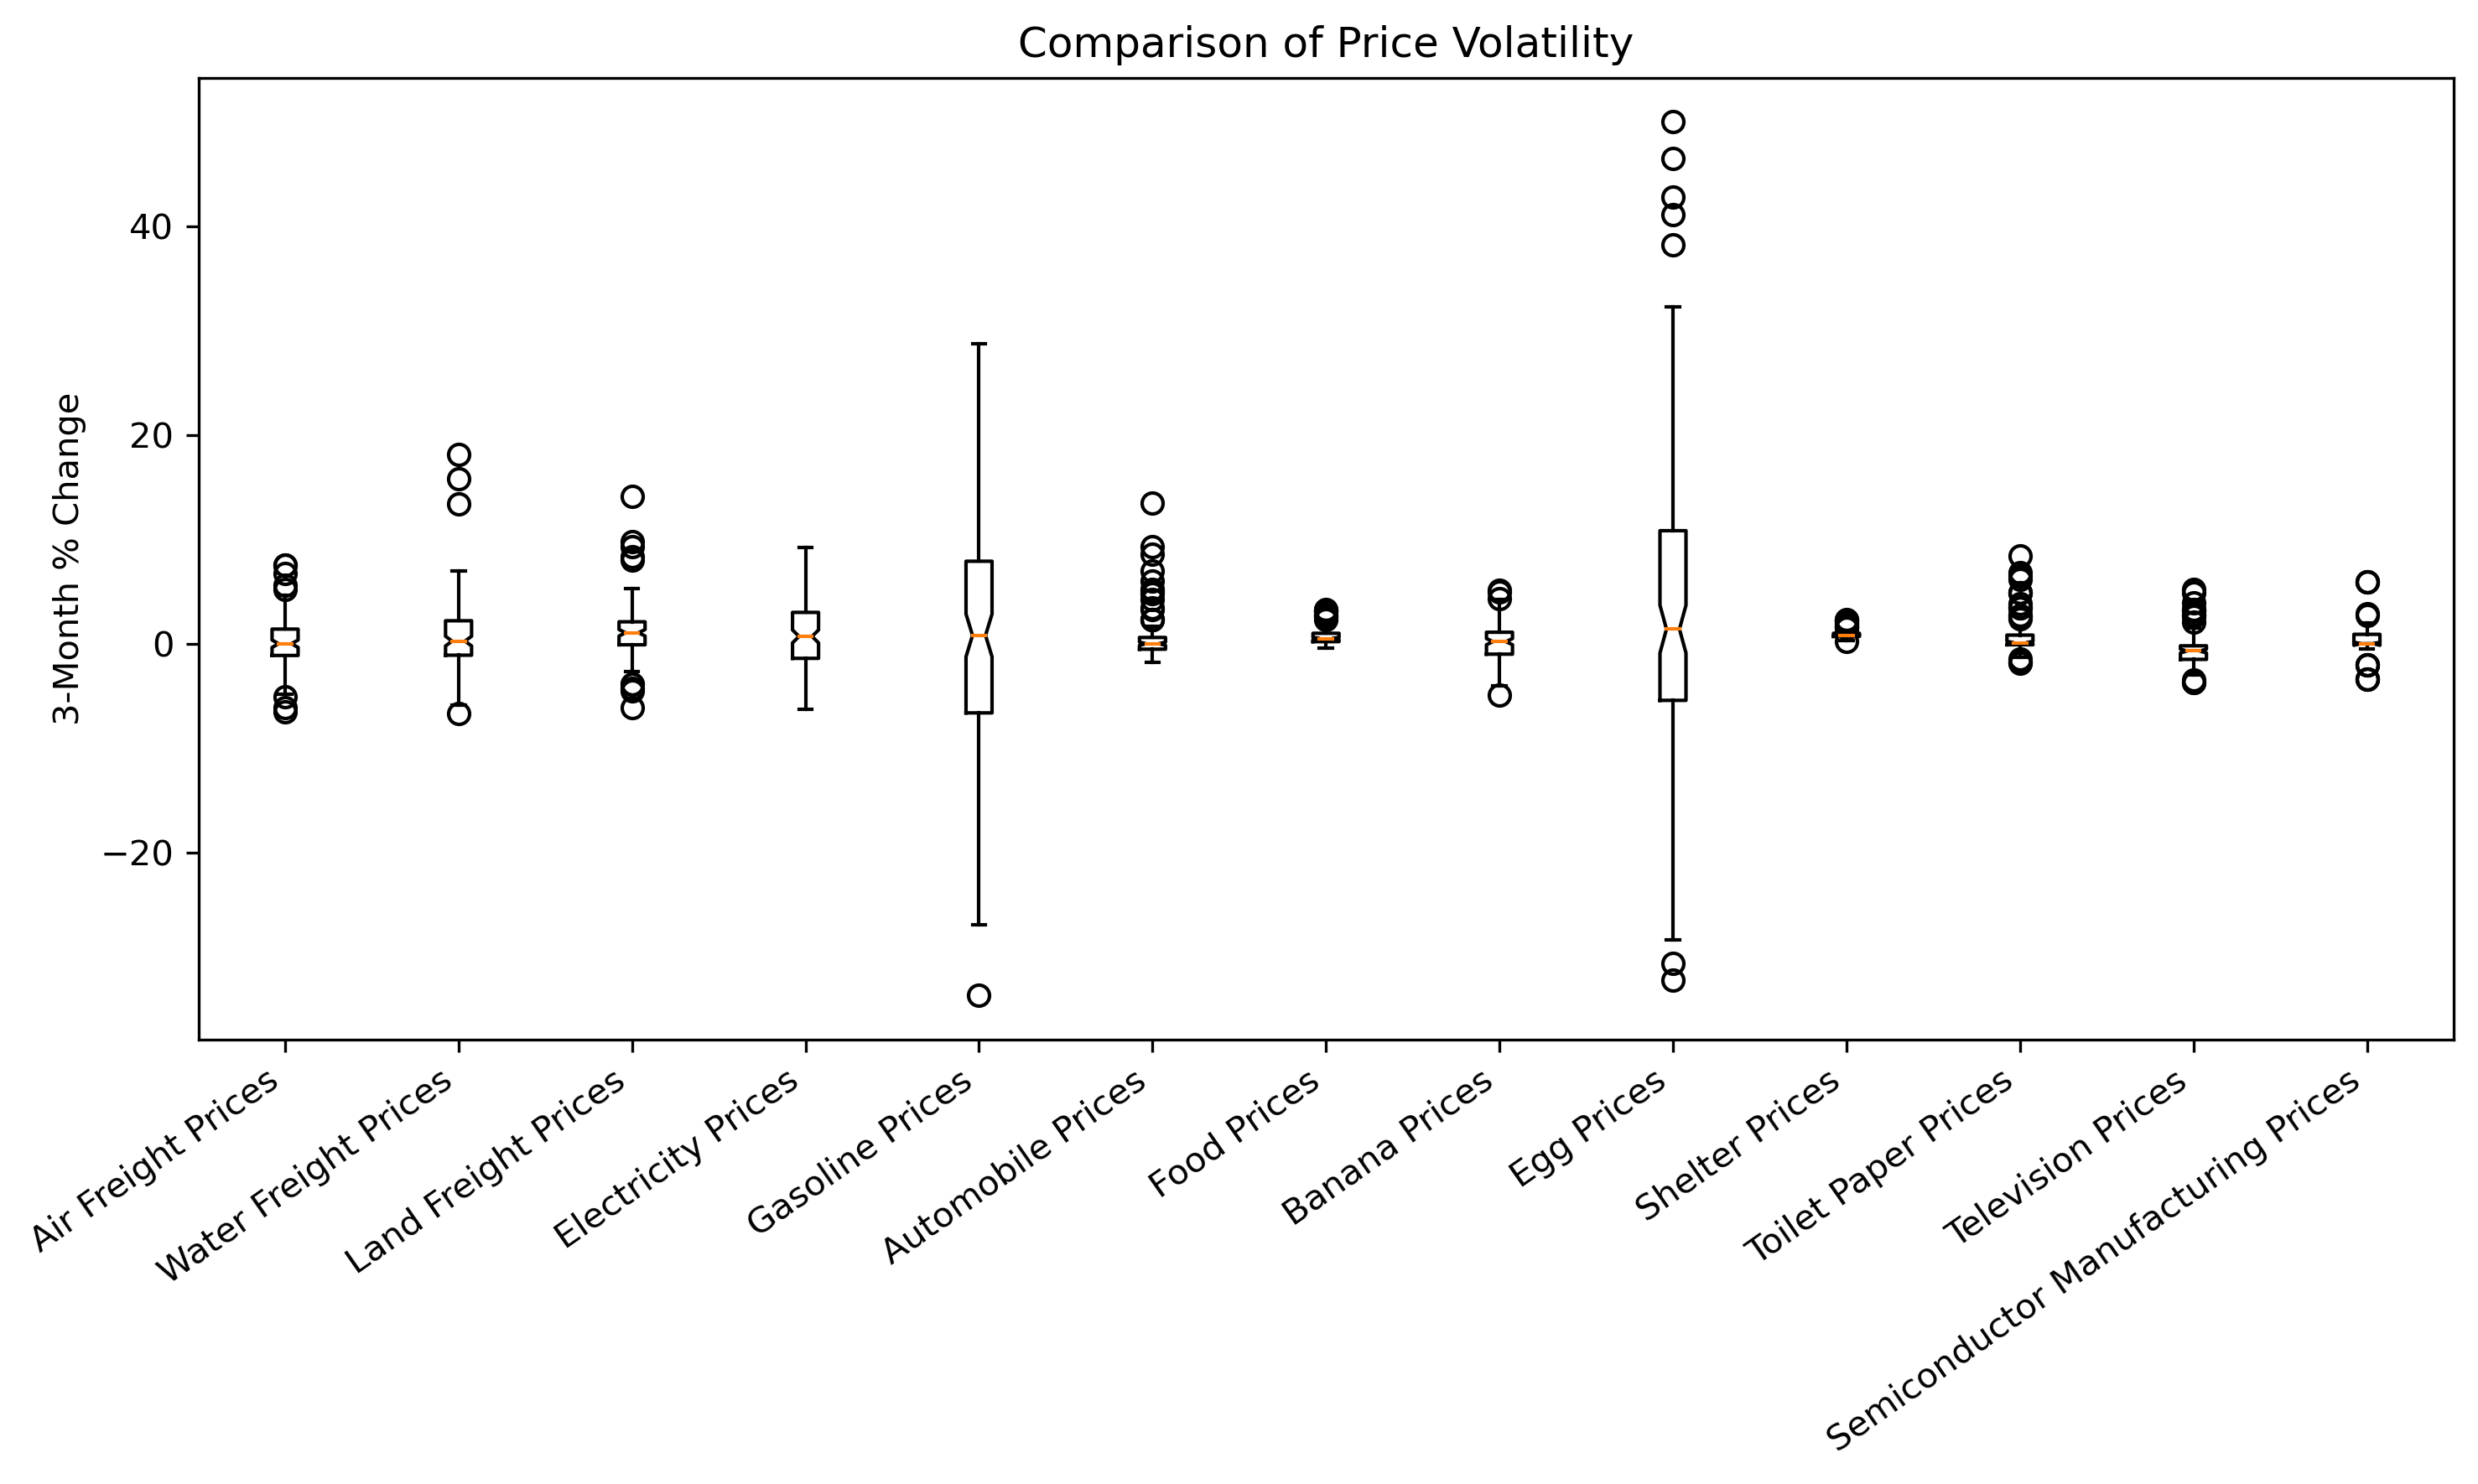

In [84]:
for item in Datalist:
    print(item)

BoxPlotGroup = ['Automobile Prices','Food Prices','Electricity Prices','Gasoline Prices','Gasoline Prices','Food Prices',
                'Banana Prices','Air Freight Prices','Water Freight Prices',
                'Egg Prices','Shelter Prices','Television Prices'
               ]

fig, ax = plt.subplots(figsize=(10, 6))
for dataset in Datalist:
    df = Datalist[dataset]['data']
    
    title = dataset

    ax.boxplot(df['3-Month % Change'],notch=True,sym='o',positions=[i])
    i += 1

ax.set_xticklabels(Datalist) 
plt.xticks(rotation=35,ha='right')
plt.ylabel('3-Month % Change')

plt.title('Comparison of Price Volatility')
fig.tight_layout()

plt.show()

if saving == 'y':
    fig.savefig(f'{FiguresPath}BoxPlot_Volatility Comparison_{transparency}',transparent=transparency)

## Data Correlation


In [85]:
Correlation_DF = pd.DataFrame()

for dataset in Datalist:
        df = Datalist[dataset]['data']
        title = dataset
        Correlation_DF[title] = df['NormValue']

Correlation_DF

Air Freight Prices  ...  Semiconductor Manufacturing Prices
0             57.634747  ...                          100.000000
1             57.976070  ...                           92.984223
2             62.649563  ...                           92.984223
3             61.595589  ...                           79.803066
4             56.794569  ...                           79.277162
..                  ...  ...                                 ...
119           28.881137  ...                                 NaN
120           28.130978  ...                                 NaN
121           30.381456  ...                                 NaN
122           30.756536  ...                                 NaN
123           31.131615  ...                                 NaN

[124 rows x 13 columns]

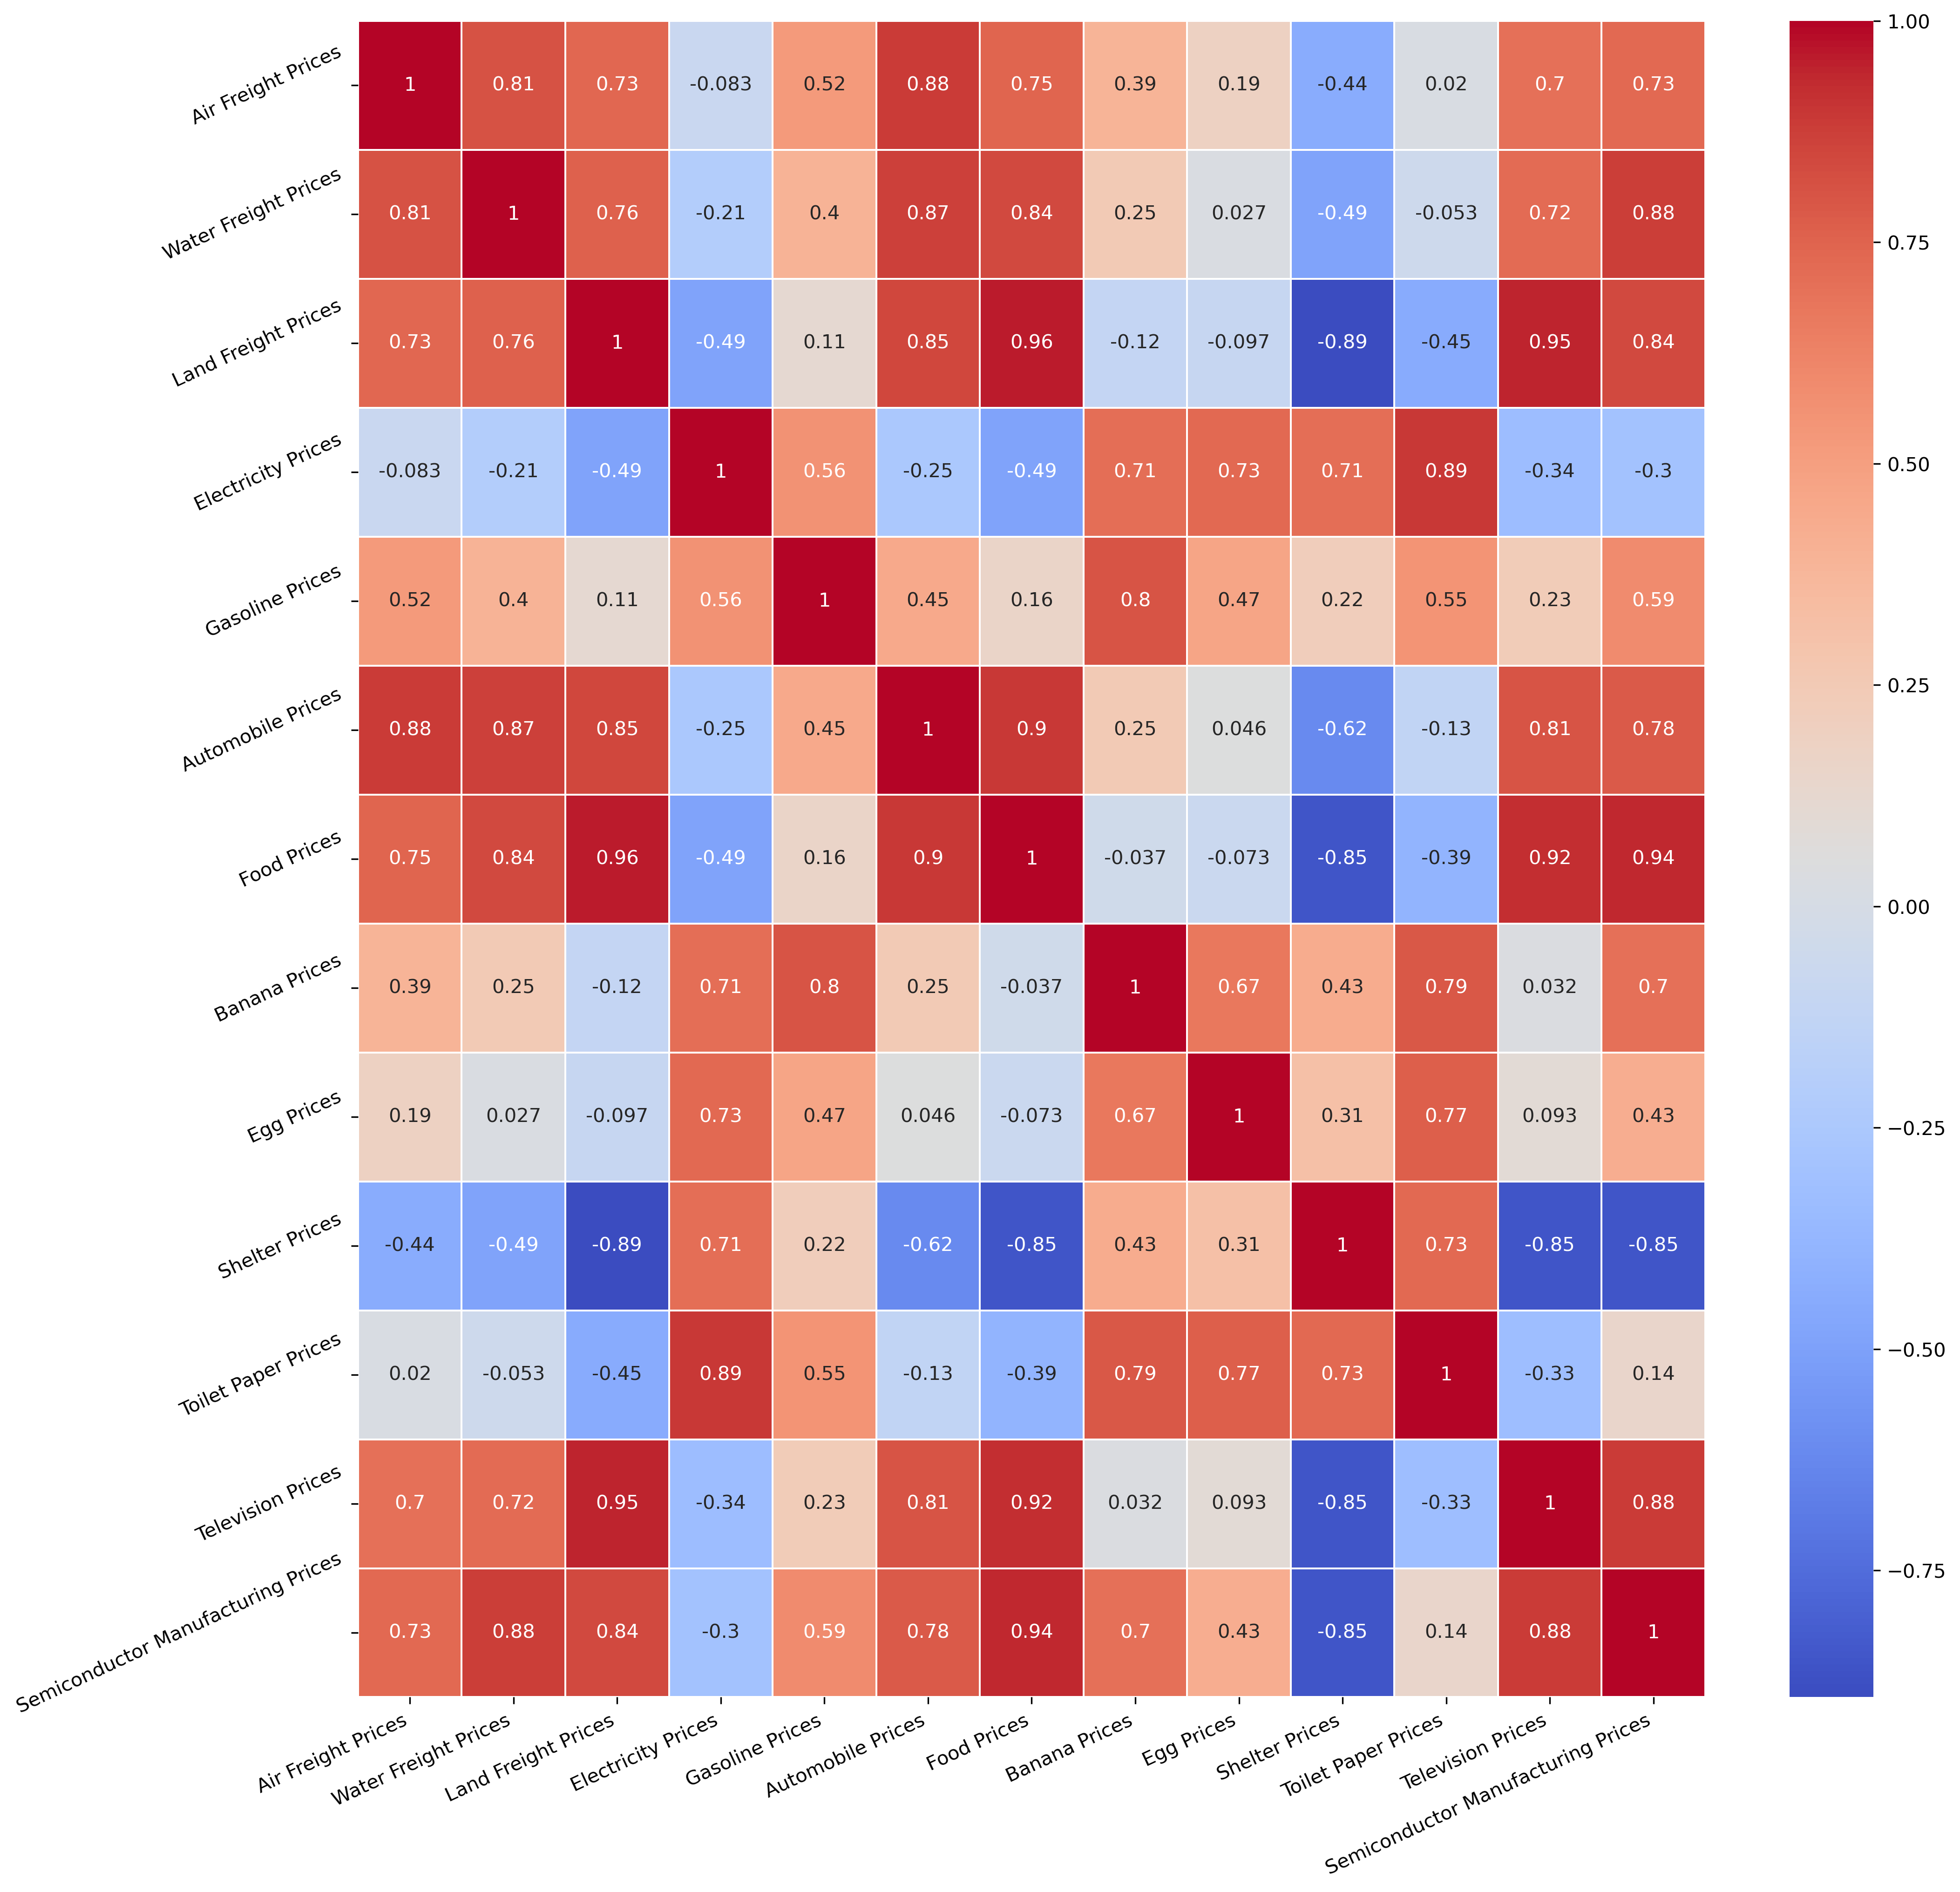

In [89]:
import seaborn as sns

correlation = Correlation_DF.corr() 
correlation.unstack().sort_values() 
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True,linewidth=0.5,cmap='coolwarm')
fig.tight_layout()
plt.xticks(rotation=25,ha='right')
plt.yticks(rotation=25,ha='right')

plt.show()
if saving == 'y':
    fig.savefig(f'{FiguresPath}All Correlation Matrix_{transparency}',transparent=transparency)